# Kaggle Competition - Titanic Survival Prediction 
# Ratndeep Chavan

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
tn = pd.read_csv('train.csv')
ts = pd.read_csv('test.csv')
tn.shape, ts.shape

((891, 12), (418, 11))

In [3]:
tn.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S  
15      0            248706  16.0000   NaN        S  
16      1            382652  29.1250   NaN        Q  
17      0            244373  13.0000   NaN        S  
18      0            345763  18.0000   NaN        S  
19      0              2649   7.2250   NaN        C

In [4]:
ts.head(20)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   

       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0     male  34.5      0      0            330911   7.8292   NaN        Q  
1   female  47.0      1      0            363272   7.0000   NaN        S  
2     male  62.0      0      0            240276   9.6875   NaN        Q  
3     male  27.0      0      0            315154   8.6625   NaN        S  
4   female  22.0      1      1           3101298  12.2875   NaN        S  
5     male  14.0      0      0              7538   9.2250   NaN        S  
6   female  30.0      0      0            330972   7.6292   NaN        Q  
7     male  26.0      1      1            248738  29.0000   NaN        S  
8   female  18.0      0      0              2657   7.2292   NaN        C  
9     male  21.0      2      0         A/4 48871  24.1500   NaN        S  
10    male   NaN      0      0            349220   7.8958   NaN        S  
11    male  46.0      0      0               694  26.0000   NaN        S  
12  female  23.0      1      0             21228  82.2667   B45        S  
13    male  63.0      1      0             24065  26.0000   NaN        S  
14  female  47.0      1      0       W.E.P. 5734  61.1750   E31        S  
15  female  24.0      1      0     SC/PARIS 2167  27.7208   NaN        C  
16    male  35.0      0      0            233734  12.3500   NaN        Q  
17    male  21.0      0      0              2692   7.2250   NaN        C  
18  female  27.0      1      0  STON/O2. 3101270   7.9250   NaN        S  
19  female  45.0      0      0              2696   7.2250   NaN        C

### Both data have same format 

In [5]:
from My_functions import details

In [6]:
details(tn, ts)

Counts Missing  Missing percent Unique    Dtype  \
PassengerId    891       0         0.000000    891    int64   
Survived       891       0         0.000000      2    int64   
Pclass         891       0         0.000000      3    int64   
Name           891       0         0.000000    891   object   
Sex            891       0         0.000000      2   object   
Age            714     177        19.865320     88  float64   
SibSp          891       0         0.000000      7    int64   
Parch          891       0         0.000000      7    int64   
Ticket         891       0         0.000000    681   object   
Fare           891       0         0.000000    248  float64   
Cabin          204     687        77.104377    147   object   
Embarked       889       2         0.224467      3   object   

                            Mode   Min       Max       Mean   Median     25%  \
PassengerId                    1     1       891      446.0    446.0   223.5   
Survived                       0     0         1   0.383838      0.0     0.0   
Pclass                         3     1         3   2.308642      3.0     2.0   
Name         Abbing, Mr. Anthony     -         -          -        -       -   
Sex                         male     -         -          -        -       -   
Age                         24.0  0.42      80.0  29.699118     28.0  20.125   
SibSp                          0     0         8   0.523008      0.0     0.0   
Parch                          0     0         6   0.381594      0.0     0.0   
Ticket                      1601     -         -          -        -       -   
Fare                        8.05   0.0  512.3292  32.204208  14.4542  7.9104   
Cabin                    B96 B98     -         -          -        -       -   
Embarked                       S     -         -          -        -       -   

                 50%    75%         Std  
PassengerId    446.0  668.5  257.353842  
Survived         0.0    1.0    0.486592  
Pclass           3.0    3.0    0.836071  
Name               -      -           -  
Sex                -      -           -  
Age             28.0   38.0   14.526497  
SibSp            0.0    1.0    1.102743  
Parch            0.0    0.0    0.806057  
Ticket             -      -           -  
Fare         14.4542   31.0   49.693429  
Cabin              -      -           -  
Embarked           -      -           -

Counts Missing  Missing percent Unique    Dtype  \
PassengerId    418       0         0.000000    418    int64   
Pclass         418       0         0.000000      3    int64   
Name           418       0         0.000000    418   object   
Sex            418       0         0.000000      2   object   
Age            332      86        20.574163     79  float64   
SibSp          418       0         0.000000      7    int64   
Parch          418       0         0.000000      8    int64   
Ticket         418       0         0.000000    363   object   
Fare           417       1         0.239234    169  float64   
Cabin           91     327        78.229665     76   object   
Embarked       418       0         0.000000      3   object   

                                      Mode   Min       Max       Mean  \
PassengerId                            892   892      1309     1100.5   
Pclass                                   3     1         3    2.26555   
Name         Abbott, Master. Eugene Joseph     -         -          -   
Sex                                   male     -         -          -   
Age                                   21.0  0.17      76.0   30.27259   
SibSp                                    0     0         8   0.447368   
Parch                                    0     0         9   0.392344   
Ticket                            PC 17608     -         -          -   
Fare                                  7.75   0.0  512.3292  35.627188   
Cabin                      B57 B59 B63 B66     -         -          -   
Embarked                                 S     -         -          -   

              Median     25%      50%      75%         Std  
PassengerId   1100.5  996.25   1100.5  1204.75  120.810458  
Pclass           3.0     1.0      3.0      3.0    0.841838  
Name               -       -        -        -           -  
Sex                -       -        -        -           -  
Age             27.0    21.0     27.0     39.0   14.181209  
SibSp            0.0     0.0      0.0      1.0     0.89676  
Parch            0.0     0.0      0.0      0.0    0.981429  
Ticket             -       -        -        -           -  
Fare         14.4542  7.8958  14.4542     31.5   55.907576  
Cabin              -       -        -        -           -  
Embarked           -       -        -        -           -

## Observations:

1. PassenferId is not useful prediction
2. Name can be use to find person is mr. ms. or mrs.
3. Age have missing values.
4. Adding SibSp and Parch gives family size
5. Family size can be use to find passenger traveling alone or with family
6. Ticket won't help for prediction as there's no usefull info in it.
7. Fare has one missing value in test data
8. In cabin column most of data is missing
9. Embarked has two missing values in trainng data

## Checking the duplicate records

In [7]:
tn.loc[tn.duplicated(keep=False)]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

### No duplicate record found

## Checking the data is balance or not

In [8]:
tn['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Data is balanced

## Data extraction

In [9]:
tn['Title'] = tn['Name'].apply(lambda x : x.split(', ')[-1].split('.')[0])
tn['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Ms                1
Jonkheer          1
Mme               1
Capt              1
the Countess      1
Lady              1
Sir               1
Name: Title, dtype: int64

In [10]:
tn['Title'] = tn['Title'].apply(lambda x : x if 'Mr' in x or 'Miss' in x or 'Mrs' in x else 'Unknown')
tn['Title'].value_counts()

Mr         517
Miss       182
Mrs        125
Unknown     67
Name: Title, dtype: int64

In [11]:
ts['Title'] = ts['Name'].apply(lambda x : x.split(', ')[-1].split('.')[0])
ts['Title'] = ts['Title'].apply(lambda x : x if 'Mr' in x or 'Miss' in x or 'Mrs' in x else 'Unknown')
ts['Title'].value_counts()

Mr         240
Miss        78
Mrs         72
Unknown     28
Name: Title, dtype: int64

## Adding new features

In [12]:
tn['Family_size'] = tn['SibSp'] + tn['Parch'] + 1
tn['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [13]:
ts['Family_size'] = ts['SibSp'] + ts['Parch'] + 1
ts['Family_size'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family_size, dtype: int64

In [14]:
tn['Alone'] = tn['Family_size'].apply(lambda x : 1 if x == 1 else 0 )
tn['Alone'].value_counts()

1    537
0    354
Name: Alone, dtype: int64

In [15]:
ts['Alone'] = ts['Family_size'].apply(lambda x : 1 if x == 1 else 0 )
ts['Alone'].value_counts()

1    253
0    165
Name: Alone, dtype: int64

## Handling missing values

In [16]:
tn['Embarked'] = tn['Embarked'].fillna(tn['Embarked'].mode()[0])
tn['Embarked'].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [17]:
ts['Fare'] = ts['Fare'].fillna(ts['Fare'].mean())
ts['Fare'].head(10)

0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
5     9.2250
6     7.6292
7    29.0000
8     7.2292
9    24.1500
Name: Fare, dtype: float64

### Age column has 20% data missing in training as well as testing. Trying approach of building simple model and use predicted values using that model.

In [18]:
age = tn.copy()
age.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked    Title  Family_size  \
0      0         A/5 21171   7.2500   NaN        S       Mr            2   
1      0          PC 17599  71.2833   C85        C      Mrs            2   
2      0  STON/O2. 3101282   7.9250   NaN        S     Miss            1   
3      0            113803  53.1000  C123        S      Mrs            2   
4      0            373450   8.0500   NaN        S       Mr            1   
5      0            330877   8.4583   NaN        Q       Mr            1   
6      0             17463  51.8625   E46        S       Mr            1   
7      1            349909  21.0750   NaN        S  Unknown            5   
8      2            347742  11.1333   NaN        S      Mrs            3   
9      0            237736  30.0708   NaN        C      Mrs            2   

   Alone  
0      0  
1      0  
2      1  
3      0  
4      1  
5      1  
6      1  
7      0  
8      0  
9      0

In [19]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
col = ['Sex','Embarked','Title']
for c in col:
    age[c] = lab.fit_transform(age[c])

In [20]:
age.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   
5                                   Moran, Mr. James    1   NaN      0      0   
6                            McCarthy, Mr. Timothy J    1  54.0      0      0   
7                     Palsson, Master. Gosta Leonard    1   2.0      3      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.0      0      2   
9                Nasser, Mrs. Nicholas (Adele Achem)    0  14.0      1      0   

             Ticket     Fare Cabin  Embarked  Title  Family_size  Alone  
0         A/5 21171   7.2500   NaN         2      1            2      0  
1          PC 17599  71.2833   C85         0      2            2      0  
2  STON/O2. 3101282   7.9250   NaN         2      0            1      1  
3            113803  53.1000  C123         2      2            2      0  
4            373450   8.0500   NaN         2      1            1      1  
5            330877   8.4583   NaN         1      1            1      1  
6             17463  51.8625   E46         2      1            1      1  
7            349909  21.0750   NaN         2      3            5      0  
8            347742  11.1333   NaN         2      2            3      0  
9            237736  30.0708   NaN         0      2            2      0

In [21]:
for c in age.columns:
    if pd.api.types.is_numeric_dtype(age[c]):
        if age[c].isna().sum() > 0 and c != 'Age':
            age = age.drop(c, axis=1)
        else:
            continue
    else:
        age = age.drop(c, axis=1)
age.head(10)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    1  22.0      1      0   7.2500         2   
1            2         1       1    0  38.0      1      0  71.2833         0   
2            3         1       3    0  26.0      0      0   7.9250         2   
3            4         1       1    0  35.0      1      0  53.1000         2   
4            5         0       3    1  35.0      0      0   8.0500         2   
5            6         0       3    1   NaN      0      0   8.4583         1   
6            7         0       1    1  54.0      0      0  51.8625         2   
7            8         0       3    1   2.0      3      1  21.0750         2   
8            9         1       3    0  27.0      0      2  11.1333         2   
9           10         1       2    0  14.0      1      0  30.0708         0   

   Title  Family_size  Alone  
0      1            2      0  
1      2            2      0  
2      0            1      1  
3      2            2      0  
4      1            1      1  
5      1            1      1  
6      1            1      1  
7      3            5      0  
8      2            3      0  
9      2            2      0

In [22]:
age = age.drop('Survived', axis=1)
details(age)

Counts Missing  Missing percent Unique    Dtype  Mode   Min  \
PassengerId    891       0          0.00000    891    int64     1     1   
Pclass         891       0          0.00000      3    int64     3     1   
Sex            891       0          0.00000      2    int32     1     0   
Age            714     177         19.86532     88  float64  24.0  0.42   
SibSp          891       0          0.00000      7    int64     0     0   
Parch          891       0          0.00000      7    int64     0     0   
Fare           891       0          0.00000    248  float64  8.05   0.0   
Embarked       891       0          0.00000      3    int32     2     0   
Title          891       0          0.00000      4    int32     1     0   
Family_size    891       0          0.00000      9    int64     1     1   
Alone          891       0          0.00000      2    int64     1     0   

                  Max        Mean    Median       25%       50%    75%  \
PassengerId       891  446.000000  446.0000  223.5000  446.0000  668.5   
Pclass              3    2.308642    3.0000    2.0000    3.0000    3.0   
Sex                 1    0.647587    1.0000    0.0000    1.0000    1.0   
Age              80.0   29.699118   28.0000   20.1250   28.0000   38.0   
SibSp               8    0.523008    0.0000    0.0000    0.0000    1.0   
Parch               6    0.381594    0.0000    0.0000    0.0000    0.0   
Fare         512.3292   32.204208   14.4542    7.9104   14.4542   31.0   
Embarked            2    1.536476    2.0000    1.0000    2.0000    2.0   
Title               3    1.086420    1.0000    1.0000    1.0000    1.0   
Family_size        11    1.904602    1.0000    1.0000    1.0000    2.0   
Alone               1    0.602694    1.0000    0.0000    1.0000    1.0   

                    Std  
PassengerId  257.353842  
Pclass         0.836071  
Sex            0.477990  
Age           14.526497  
SibSp          1.102743  
Parch          0.806057  
Fare          49.693429  
Embarked       0.791503  
Title          0.799119  
Family_size    1.613459  
Alone          0.489615

In [23]:
y = age[age['Age'].isna()]
y.head(10)

PassengerId  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked  Title  \
5             6       3    1  NaN      0      0    8.4583         1      1   
17           18       2    1  NaN      0      0   13.0000         2      1   
19           20       3    0  NaN      0      0    7.2250         0      2   
26           27       3    1  NaN      0      0    7.2250         0      1   
28           29       3    0  NaN      0      0    7.8792         1      0   
29           30       3    1  NaN      0      0    7.8958         2      1   
31           32       1    0  NaN      1      0  146.5208         0      2   
32           33       3    0  NaN      0      0    7.7500         1      0   
36           37       3    1  NaN      0      0    7.2292         0      1   
42           43       3    1  NaN      0      0    7.8958         0      1   

    Family_size  Alone  
5             1      1  
17            1      1  
19            1      1  
26            1      1  
28            1      1  
29            1      1  
31            2      0  
32            1      1  
36            1      1  
42            1      1

In [24]:
x = age[age['Age'].isna() == False]
x.head(10)

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
0             1       3    1  22.0      1      0   7.2500         2      1   
1             2       1    0  38.0      1      0  71.2833         0      2   
2             3       3    0  26.0      0      0   7.9250         2      0   
3             4       1    0  35.0      1      0  53.1000         2      2   
4             5       3    1  35.0      0      0   8.0500         2      1   
6             7       1    1  54.0      0      0  51.8625         2      1   
7             8       3    1   2.0      3      1  21.0750         2      3   
8             9       3    0  27.0      0      2  11.1333         2      2   
9            10       2    0  14.0      1      0  30.0708         0      2   
10           11       3    0   4.0      1      1  16.7000         2      0   

    Family_size  Alone  
0             2      0  
1             2      0  
2             1      1  
3             2      0  
4             1      1  
6             1      1  
7             5      0  
8             3      0  
9             2      0  
10            3      0

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

age_x = x.drop(['PassengerId', 'Age'], axis=1)
age_y = x['Age']

x_tn, x_tst, y_tn, y_tst = train_test_split(age_x, age_y, test_size=0.15, random_state = 8)

ada = AdaBoostRegressor(random_state=8)
gra = GradientBoostingRegressor(random_state=8)
ext = ExtraTreesRegressor(random_state=8)
ran = RandomForestRegressor(random_state=8)
lin = LinearRegression()
des = DecisionTreeRegressor(random_state=8)
svr = SVR()

ada.fit(x_tn, y_tn)
gra.fit(x_tn, y_tn)
ext.fit(x_tn, y_tn)
ran.fit(x_tn, y_tn)
lin.fit(x_tn, y_tn)
des.fit(x_tn, y_tn)
svr.fit(x_tn, y_tn)

ada_p = ada.predict(x_tst)
gra_p = gra.predict(x_tst)
ext_p = ext.predict(x_tst)
ran_p = ran.predict(x_tst)
lin_p = lin.predict(x_tst)
des_p = des.predict(x_tst)
svr_p = svr.predict(x_tst)


print(f'''
ada : {np.sqrt(mean_squared_error(y_tst, ada_p)*100)}
gra : {np.sqrt(mean_squared_error(y_tst, gra_p)*100)}
ext : {np.sqrt(mean_squared_error(y_tst, ext_p)*100)}
ran : {np.sqrt(mean_squared_error(y_tst, ran_p)*100)}
lin : {np.sqrt(mean_squared_error(y_tst, lin_p)*100)}
des : {np.sqrt(mean_squared_error(y_tst, des_p)*100)}
svr : {np.sqrt(mean_squared_error(y_tst, svr_p)*100)}
''')


ada : 119.31962438714501
gra : 117.4419263605284
ext : 131.28631635875965
ran : 123.96276124579401
lin : 116.93280256196847
des : 145.580267137376
svr : 132.17540972275043



### Here linear model showing best result so saving that model.

In [26]:
import pickle
with open ('Age_model', 'wb') as f:
    pickle.dump(lin,f)

In [27]:
with open('Age_model', 'rb') as f:
    mod = pickle.load(f)

In [28]:
y.head()

PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title  \
5             6       3    1  NaN      0      0   8.4583         1      1   
17           18       2    1  NaN      0      0  13.0000         2      1   
19           20       3    0  NaN      0      0   7.2250         0      2   
26           27       3    1  NaN      0      0   7.2250         0      1   
28           29       3    0  NaN      0      0   7.8792         1      0   

    Family_size  Alone  
5             1      1  
17            1      1  
19            1      1  
26            1      1  
28            1      1

In [29]:
y['Age'] = mod.predict(y.drop(['Age','PassengerId'], axis=1))
y.head(10)

PassengerId  Pclass  Sex        Age  SibSp  Parch      Fare  Embarked  \
5             6       3    1  28.131996      0      0    8.4583         1   
17           18       2    1  35.792233      0      0   13.0000         2   
19           20       3    0  27.626907      0      0    7.2250         0   
26           27       3    1  27.360673      0      0    7.2250         0   
28           29       3    0  24.699107      0      0    7.8792         1   
29           30       3    1  28.920641      0      0    7.8958         2   
31           32       1    0  33.504874      1      0  146.5208         0   
32           33       3    0  24.700353      0      0    7.7500         1   
36           37       3    1  27.360633      0      0    7.2292         0   
42           43       3    1  27.354203      0      0    7.8958         0   

    Title  Family_size  Alone  
5       1            1      1  
17      1            1      1  
19      2            1      1  
26      1            1      1  
28      0            1      1  
29      1            1      1  
31      2            2      0  
32      0            1      1  
36      1            1      1  
42      1            1      1

In [30]:
tn.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   

    Parch            Ticket     Fare Cabin Embarked    Title  Family_size  \
0       0         A/5 21171   7.2500   NaN        S       Mr            2   
1       0          PC 17599  71.2833   C85        C      Mrs            2   
2       0  STON/O2. 3101282   7.9250   NaN        S     Miss            1   
3       0            113803  53.1000  C123        S      Mrs            2   
4       0            373450   8.0500   NaN        S       Mr            1   
5       0            330877   8.4583   NaN        Q       Mr            1   
6       0             17463  51.8625   E46        S       Mr            1   
7       1            349909  21.0750   NaN        S  Unknown            5   
8       2            347742  11.1333   NaN        S      Mrs            3   
9       0            237736  30.0708   NaN        C      Mrs            2   
10      1           PP 9549  16.7000    G6        S     Miss            3   
11      0            113783  26.5500  C103        S     Miss            1   
12      0         A/5. 2151   8.0500   NaN        S       Mr            1   
13      5            347082  31.2750   NaN        S       Mr            7   
14      0            350406   7.8542   NaN        S     Miss            1   
15      0            248706  16.0000   NaN        S      Mrs            1   
16      1            382652  29.1250   NaN        Q  Unknown            6   
17      0            244373  13.0000   NaN        S       Mr            1   
18      0            345763  18.0000   NaN        S      Mrs            2   
19      0              2649   7.2250   NaN     

In [31]:
tn = pd.merge(tn, y[['PassengerId','Age']], on='PassengerId', how='outer')
tn.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex  Age_x  SibSp  \
0                             Braund, Mr. Owen Harris    male   22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38.0      1   
2                              Heikkinen, Miss. Laina  female   26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35.0      1   
4                            Allen, Mr. William Henry    male   35.0      0   
5                                    Moran, Mr. James    male    NaN      0   
6                             McCarthy, Mr. Timothy J    male   54.0      0   
7                      Palsson, Master. Gosta Leonard    male    2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female   27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female   14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female    4.0      1   
11                           Bonnell, Miss. Elizabeth  female   58.0      0   
12                     Saundercock, Mr. William Henry    male   20.0      0   
13                        Andersson, Mr. Anders Johan    male   39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female   14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female   55.0      0   
16                               Rice, Master. Eugene    male    2.0      4   
17                       Williams, Mr. Charles Eugene    male    NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female   31.0      1   
19                            Masselmani, Mrs. Fatima  female    NaN      0   

    Parch            Ticket     Fare Cabin Embarked    Title  Family_size  \
0       0         A/5 21171   7.2500   NaN        S       Mr            2   
1       0          PC 17599  71.2833   C85        C      Mrs            2   
2       0  STON/O2. 3101282   7.9250   NaN        S     Miss            1   
3       0            113803  53.1000  C123        S      Mrs            2   
4       0            373450   8.0500   NaN        S       Mr            1   
5       0            330877   8.4583   NaN        Q       Mr            1   
6       0             17463  51.8625   E46        S       Mr            1   
7       1            349909  21.0750   NaN        S  Unknown            5   
8       2            347742  11.1333   NaN        S      Mrs            3   
9       0            237736  30.0708   NaN        C      Mrs            2   
10      1           PP 9549  16.7000    G6        S     Miss            3   
11      0            113783  26.5500  C103        S     Miss            1   
12      0         A/5. 2151   8.0500   NaN        S       Mr            1   
13      5            347082  31.2750   NaN        S       Mr            7   
14      0            350406   7.8542   NaN        S     Miss            1   
15      0            248706  16.0000   NaN        S      Mrs            1   
16      1            382652  29.1250   NaN        Q  Unknown            6   
17      0            244373  13.0000   NaN        S       Mr            1   
18      0            345763  18.0000   NaN        S      Mrs            2   
19      0              264

In [32]:
tn['Age'] = round(tn['Age_x'].fillna(0) + tn['Age_y'].fillna(0), 2)
tn = tn.drop(['Age_x','Age_y'], axis=1)
tn.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex  SibSp  Parch  \
0                             Braund, Mr. Owen Harris    male      1      0   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                              Heikkinen, Miss. Laina  female      0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                            Allen, Mr. William Henry    male      0      0   
5                                    Moran, Mr. James    male      0      0   
6                             McCarthy, Mr. Timothy J    male      0      0   
7                      Palsson, Master. Gosta Leonard    male      3      1   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female      0      2   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female      1      0   
10                    Sandstrom, Miss. Marguerite Rut  female      1      1   
11                           Bonnell, Miss. Elizabeth  female      0      0   
12                     Saundercock, Mr. William Henry    male      0      0   
13                        Andersson, Mr. Anders Johan    male      1      5   
14               Vestrom, Miss. Hulda Amanda Adolfina  female      0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female      0      0   
16                               Rice, Master. Eugene    male      4      1   
17                       Williams, Mr. Charles Eugene    male      0      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female      1      0   
19                            Masselmani, Mrs. Fatima  female      0      0   

              Ticket     Fare Cabin Embarked    Title  Family_size  Alone  \
0          A/5 21171   7.2500   NaN        S       Mr            2      0   
1           PC 17599  71.2833   C85        C      Mrs            2      0   
2   STON/O2. 3101282   7.9250   NaN        S     Miss            1      1   
3             113803  53.1000  C123        S      Mrs            2      0   
4             373450   8.0500   NaN        S       Mr            1      1   
5             330877   8.4583   NaN        Q       Mr            1      1   
6              17463  51.8625   E46        S       Mr            1      1   
7             349909  21.0750   NaN        S  Unknown            5      0   
8             347742  11.1333   NaN        S      Mrs            3      0   
9             237736  30.0708   NaN        C      Mrs            2      0   
10           PP 9549  16.7000    G6        S     Miss            3      0   
11            113783  26.5500  C103        S     Miss            1      1   
12         A/5. 2151   8.0500   NaN        S       Mr            1      1   
13            347082  31.2750   NaN        S       Mr            7      0   
14            350406   7.8542   NaN        S     Miss            1      1   
15            248706  16.0000   NaN        S      Mrs            1      1   
16            382652  29.1250   NaN        Q  Unknown            6      0   
17            244373  13.0000   NaN        S       Mr            1      1   
18            345763  18.0000   NaN        S      Mrs            2      0   
19              2649   7.2

In [33]:
tn['Age'] = tn['Age'].astype(int)
details(tn)

Counts Missing  Missing percent Unique    Dtype  \
PassengerId    891       0         0.000000    891    int64   
Survived       891       0         0.000000      2    int64   
Pclass         891       0         0.000000      3    int64   
Name           891       0         0.000000    891   object   
Sex            891       0         0.000000      2   object   
SibSp          891       0         0.000000      7    int64   
Parch          891       0         0.000000      7    int64   
Ticket         891       0         0.000000    681   object   
Fare           891       0         0.000000    248  float64   
Cabin          204     687        77.104377    147   object   
Embarked       891       0         0.000000      3   object   
Title          891       0         0.000000      4   object   
Family_size    891       0         0.000000      9    int64   
Alone          891       0         0.000000      2    int64   
Age            891       0         0.000000     73    int32   

                            Mode  Min       Max       Mean   Median     25%  \
PassengerId                    1    1       891      446.0    446.0   223.5   
Survived                       0    0         1   0.383838      0.0     0.0   
Pclass                         3    1         3   2.308642      3.0     2.0   
Name         Abbing, Mr. Anthony    -         -          -        -       -   
Sex                         male    -         -          -        -       -   
SibSp                          0    0         8   0.523008      0.0     0.0   
Parch                          0    0         6   0.381594      0.0     0.0   
Ticket                      1601    -         -          -        -       -   
Fare                        8.05  0.0  512.3292  32.204208  14.4542  7.9104   
Cabin                    B96 B98    -         -          -        -       -   
Embarked                       S    -         -          -        -       -   
Title                         Mr    -         -          -        -       -   
Family_size                    1    1        11   1.904602      1.0     1.0   
Alone                          1    0         1   0.602694      1.0     0.0   
Age                           28   -8        80  29.148148     28.0    21.0   

                 50%    75%         Std  
PassengerId    446.0  668.5  257.353842  
Survived         0.0    1.0    0.486592  
Pclass           3.0    3.0    0.836071  
Name               -      -           -  
Sex                -      -           -  
SibSp            0.0    1.0    1.102743  
Parch            0.0    0.0    0.806057  
Ticket             -      -           -  
Fare         14.4542   31.0   49.693429  
Cabin              -      -           -  
Embarked           -      -           -  
Title              -      -           -  
Family_size      1.0    2.0    1.613459  
Alone            1.0    1.0    0.489615  
Age             28.0   36.0   13.713458

In [34]:
ts.head(20)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   

       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0     male  34.5      0      0            330911   7.8292   NaN        Q   
1   female  47.0      1      0            363272   7.0000   NaN        S   
2     male  62.0      0      0            240276   9.6875   NaN        Q   
3     male  27.0      0      0            315154   8.6625   NaN        S   
4   female  22.0      1      1           3101298  12.2875   NaN        S   
5     male  14.0      0      0              7538   9.2250   NaN        S   
6   female  30.0      0      0            330972   7.6292   NaN        Q   
7     male  26.0      1      1            248738  29.0000   NaN        S   
8   female  18.0      0      0              2657   7.2292   NaN        C   
9     male  21.0      2      0         A/4 48871  24.1500   NaN        S   
10    male   NaN      0      0            349220   7.8958   NaN        S   
11    male  46.0      0      0               694  26.0000   NaN        S   
12  female  23.0      1      0             21228  82.2667   B45        S   
13    male  63.0      1      0             24065  26.0000   NaN        S   
14  female  47.0      1      0       W.E.P. 5734  61.1750   E31        S   
15  female  24.0      1      0     SC/PARIS 2167  27.7208   NaN        C   
16    male  35.0      0      0            233734  12.3500   NaN        Q   
17    male  21.0      0      0              2692   7.2250   NaN        C   
18  female  27.0      1      0  STON/O2. 3101270   7.9250   NaN        S   
19  female  45.0      0      0              2696   7.2250   NaN        C   

   Title  Family_size  Alone  
0     Mr            1      1  
1    Mrs            2      0  
2     Mr            1      1  
3     Mr            1      1  
4    Mrs            3      0  
5     Mr            1      1  
6   Miss            1      1  
7     Mr            3      0  
8    Mrs            1      1  
9     Mr            3      0  
10    Mr            1      1  
11    Mr            1      1  
12   Mrs            2      0  
13    Mr            2      0  
14   Mrs            2      0  
15   Mrs            2      0  
16    Mr            1      1  
17    Mr            1      1  
18  Miss            2      0  
19   Mrs            1      1

In [35]:
y = ts[ts['Age'].isna()]
y.head(20)

PassengerId  Pclass                                               Name  \
10           902       3                                   Ilieff, Mr. Ylio   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
29           921       3                                  Samaan, Mr. Elias   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
36           928       3                                Roth, Miss. Sarah A   
39           931       3                                      Hee, Mr. Ling   
41           933       1                        Franklin, Mr. Thomas Parham   
47           939       3                           Shaughnessy, Mr. Patrick   
54           946       2                  Mangiavacchi, Mr. Serafino Emilio   
58           950       3                          Davison, Mr. Thomas Henry   
65           957       2  Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...   
76           968       3                                   Miles, Mr. Frank   
83           975       3                               Demetri, Mr. Marinko   
84           976       2                              Lamb, Mr. John Joseph   
85           977       3                                 Khalil, Mr. Betros   
88           980       3                            O'Donoghue, Ms. Bridget   
91           983       3                                 Pedersen, Mr. Olaf   
93           985       3                                  Guest, Mr. Robert   
102          994       3                                 Foley, Mr. William   
107          999       3                                   Ryan, Mr. Edward   

        Sex  Age  SibSp  Parch        Ticket     Fare Cabin Embarked    Title  \
10     male  NaN      0      0        349220   7.8958   NaN        S       Mr   
22   female  NaN      0      0      PC 17598  31.6833   NaN        S      Mrs   
29     male  NaN      2      0          2662  21.6792   NaN        C       Mr   
33   female  NaN      1      2    W./C. 6607  23.4500   NaN        S      Mrs   
36   female  NaN      0      0        342712   8.0500   NaN        S     Miss   
39     male  NaN      0      0          1601  56.4958   NaN        S       Mr   
41     male  NaN      0      0        113778  26.5500   D34        S       Mr   
47     male  NaN      0      0        370374   7.7500   NaN        Q       Mr   
54     male  NaN      0      0   SC/A.3 2861  15.5792   NaN        C       Mr   
58     male  NaN      1      0        386525  16.1000   NaN        S       Mr   
65   female  NaN      0      0  F.C.C. 13534  21.0000   NaN        S      Mrs   
76     male  NaN      0      0        359306   8.0500   NaN        S       Mr   
83     male  NaN      0      0        349238   7.8958   NaN        S       Mr   
84     male  NaN      0      0        240261  10.7083   NaN        Q       Mr   
85     male  NaN      1      0          2660  14.4542   NaN        C       Mr   
88   female  NaN      0      0        364856   7.7500   NaN        Q  Unknown   
91     male  NaN      0      0        345498   7.7750   NaN        S       Mr   
93     male  NaN      0      0        376563   8.0500   NaN        S       Mr   
102    male  NaN      0      0        365235   7.7500   NaN        Q       Mr   
107    male  NaN      0      0        383162   7.7500   NaN        Q       Mr   

     Family_size  Alone  
10             1      1  
22             1      1  
29             3      0  
33             4      0  
36             1      1  
39             1      1  
41             1      1  
47             1      1  
54             1      1  
58             2      0  
65             1      1  
76             1      1  
83             1      1  
84             1      1  
85             2      0  
88             1      1  
91             1      1  
93             1      1  
102            1      1  
107            1      1

In [36]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
col = ['Sex','Embarked','Title']
for c in col:
    y[c] = lab.fit_transform(y[c])

for c in y.columns:
    if pd.api.types.is_numeric_dtype(y[c]):
        if y[c].isna().sum() > 0 and c != 'Age':
            y = y.drop(c, axis=1)
        else:
            continue
    else:
        y = y.drop(c, axis=1)
y.head(20)

PassengerId  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  Title  \
10           902       3    1  NaN      0      0   7.8958         2      1   
22           914       1    0  NaN      0      0  31.6833         2      2   
29           921       3    1  NaN      2      0  21.6792         0      1   
33           925       3    0  NaN      1      2  23.4500         2      2   
36           928       3    0  NaN      0      0   8.0500         2      0   
39           931       3    1  NaN      0      0  56.4958         2      1   
41           933       1    1  NaN      0      0  26.5500         2      1   
47           939       3    1  NaN      0      0   7.7500         1      1   
54           946       2    1  NaN      0      0  15.5792         0      1   
58           950       3    1  NaN      1      0  16.1000         2      1   
65           957       2    0  NaN      0      0  21.0000         2      2   
76           968       3    1  NaN      0      0   8.0500         2      1   
83           975       3    1  NaN      0      0   7.8958         2      1   
84           976       2    1  NaN      0      0  10.7083         1      1   
85           977       3    1  NaN      1      0  14.4542         0      1   
88           980       3    0  NaN      0      0   7.7500         1      3   
91           983       3    1  NaN      0      0   7.7750         2      1   
93           985       3    1  NaN      0      0   8.0500         2      1   
102          994       3    1  NaN      0      0   7.7500         1      1   
107          999       3    1  NaN      0      0   7.7500         1      1   

     Family_size  Alone  
10             1      1  
22             1      1  
29             3      0  
33             4      0  
36             1      1  
39             1      1  
41             1      1  
47             1      1  
54             1      1  
58             2      0  
65             1      1  
76             1      1  
83             1      1  
84             1      1  
85             2      0  
88             1      1  
91             1      1  
93             1      1  
102            1      1  
107            1      1

In [37]:
y['Age'] = mod.predict(y.drop(['Age','PassengerId'], axis=1))
y

PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  \
10           902       3    1  28.920641      0      0   7.8958         2   
22           914       1    0  42.799077      0      0  31.6833         2   
29           921       3    1  17.033804      2      0  21.6792         0   
33           925       3    0  21.037458      1      2  23.4500         2   
36           928       3    0  25.480679      0      0   8.0500         2   
..           ...     ...  ...        ...    ...    ...      ...       ...   
408         1300       3    0  24.700635      0      0   7.7208         1   
410         1302       3    0  24.700353      0      0   7.7500         1   
413         1305       3    1  28.919154      0      0   8.0500         2   
416         1308       3    1  28.919154      0      0   8.0500         2   
417         1309       3    1  23.609686      1      1  22.3583         0   

     Title  Family_size  Alone  
10       1            1      1  
22       2            1      1  
29       1            3      0  
33       2            4      0  
36       0            1      1  
..     ...          ...    ...  
408      0            1      1  
410      0            1      1  
413      1            1      1  
416      1            1      1  
417      3            3      0  

[86 rows x 11 columns]

In [38]:
ts = pd.merge(ts, y[['PassengerId','Age']], on='PassengerId', how='outer')
ts.head(20)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   

       Sex  Age_x  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0     male   34.5      0      0            330911   7.8292   NaN        Q   
1   female   47.0      1      0            363272   7.0000   NaN        S   
2     male   62.0      0      0            240276   9.6875   NaN        Q   
3     male   27.0      0      0            315154   8.6625   NaN        S   
4   female   22.0      1      1           3101298  12.2875   NaN        S   
5     male   14.0      0      0              7538   9.2250   NaN        S   
6   female   30.0      0      0            330972   7.6292   NaN        Q   
7     male   26.0      1      1            248738  29.0000   NaN        S   
8   female   18.0      0      0              2657   7.2292   NaN        C   
9     male   21.0      2      0         A/4 48871  24.1500   NaN        S   
10    male    NaN      0      0            349220   7.8958   NaN        S   
11    male   46.0      0      0               694  26.0000   NaN        S   
12  female   23.0      1      0             21228  82.2667   B45        S   
13    male   63.0      1      0             24065  26.0000   NaN        S   
14  female   47.0      1      0       W.E.P. 5734  61.1750   E31        S   
15  female   24.0      1      0     SC/PARIS 2167  27.7208   NaN        C   
16    male   35.0      0      0            233734  12.3500   NaN        Q   
17    male   21.0      0      0              2692   7.2250   NaN        C   
18  female   27.0      1      0  STON/O2. 3101270   7.9250   NaN        S   
19  female   45.0      0      0              2696   7.2250   NaN        C   

   Title  Family_size  Alone      Age_y  
0     Mr            1      1        NaN  
1    Mrs            2      0        NaN  
2     Mr            1      1        NaN  
3     Mr            1      1        NaN  
4    Mrs            3      0        NaN  
5     Mr            1      1        NaN  
6   Miss            1      1        NaN  
7     Mr            3      0        NaN  
8    Mrs            1      1        NaN  
9     Mr            3      0        NaN  
10    Mr            1      1  28.920641  
11    Mr            1      1        NaN  
12   Mrs            2      0        NaN  
13    Mr            2      0        NaN  
14   Mrs            2      0        NaN  
15   Mrs            2      0        NaN  
16    Mr            1      1     

In [39]:
ts['Age'] = round(ts['Age_x'].fillna(0) + ts['Age_y'].fillna(0), 2)
ts = ts.drop(['Age_x','Age_y'], axis=1)
ts.head(20)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   

       Sex  SibSp  Parch            Ticket     Fare Cabin Embarked Title  \
0     male      0      0            330911   7.8292   NaN        Q    Mr   
1   female      1      0            363272   7.0000   NaN        S   Mrs   
2     male      0      0            240276   9.6875   NaN        Q    Mr   
3     male      0      0            315154   8.6625   NaN        S    Mr   
4   female      1      1           3101298  12.2875   NaN        S   Mrs   
5     male      0      0              7538   9.2250   NaN        S    Mr   
6   female      0      0            330972   7.6292   NaN        Q  Miss   
7     male      1      1            248738  29.0000   NaN        S    Mr   
8   female      0      0              2657   7.2292   NaN        C   Mrs   
9     male      2      0         A/4 48871  24.1500   NaN        S    Mr   
10    male      0      0            349220   7.8958   NaN        S    Mr   
11    male      0      0               694  26.0000   NaN        S    Mr   
12  female      1      0             21228  82.2667   B45        S   Mrs   
13    male      1      0             24065  26.0000   NaN        S    Mr   
14  female      1      0       W.E.P. 5734  61.1750   E31        S   Mrs   
15  female      1      0     SC/PARIS 2167  27.7208   NaN        C   Mrs   
16    male      0      0            233734  12.3500   NaN        Q    Mr   
17    male      0      0              2692   7.2250   NaN        C    Mr   
18  female      1      0  STON/O2. 3101270   7.9250   NaN        S  Miss   
19  female      0      0              2696   7.2250   NaN        C   Mrs   

    Family_size  Alone    Age  
0             1      1  34.50  
1             2      0  47.00  
2             1      1  62.00  
3             1      1  27.00  
4             3      0  22.00  
5             1      1  14.00  
6             1      1  30.00  
7             3      0  26.00  
8             1      1  18.00  
9             3      0  21.00  
10            1      1  28.92  
11            1      1  46.00  
12            2      0  23.00  
13            2      0  63.00  
14            2      0  47.00  
15            2      0  24.00  
16            1      1  35.00  
17            1      1  21.00  
18            2      0  27.00  
19            1      1  45.00

#### All missing values are filled in training as well as testing data

In [40]:
ts['Age'] = ts['Age'].astype(int)
details(tn, ts)

Counts Missing  Missing percent Unique    Dtype  \
PassengerId    891       0         0.000000    891    int64   
Survived       891       0         0.000000      2    int64   
Pclass         891       0         0.000000      3    int64   
Name           891       0         0.000000    891   object   
Sex            891       0         0.000000      2   object   
SibSp          891       0         0.000000      7    int64   
Parch          891       0         0.000000      7    int64   
Ticket         891       0         0.000000    681   object   
Fare           891       0         0.000000    248  float64   
Cabin          204     687        77.104377    147   object   
Embarked       891       0         0.000000      3   object   
Title          891       0         0.000000      4   object   
Family_size    891       0         0.000000      9    int64   
Alone          891       0         0.000000      2    int64   
Age            891       0         0.000000     73    int32   

                            Mode  Min       Max       Mean   Median     25%  \
PassengerId                    1    1       891      446.0    446.0   223.5   
Survived                       0    0         1   0.383838      0.0     0.0   
Pclass                         3    1         3   2.308642      3.0     2.0   
Name         Abbing, Mr. Anthony    -         -          -        -       -   
Sex                         male    -         -          -        -       -   
SibSp                          0    0         8   0.523008      0.0     0.0   
Parch                          0    0         6   0.381594      0.0     0.0   
Ticket                      1601    -         -          -        -       -   
Fare                        8.05  0.0  512.3292  32.204208  14.4542  7.9104   
Cabin                    B96 B98    -         -          -        -       -   
Embarked                       S    -         -          -        -       -   
Title                         Mr    -         -          -        -       -   
Family_size                    1    1        11   1.904602      1.0     1.0   
Alone                          1    0         1   0.602694      1.0     0.0   
Age                           28   -8        80  29.148148     28.0    21.0   

                 50%    75%         Std  
PassengerId    446.0  668.5  257.353842  
Survived         0.0    1.0    0.486592  
Pclass           3.0    3.0    0.836071  
Name               -      -           -  
Sex                -      -           -  
SibSp            0.0    1.0    1.102743  
Parch            0.0    0.0    0.806057  
Ticket             -      -           -  
Fare         14.4542   31.0   49.693429  
Cabin              -      -           -  
Embarked           -      -           -  
Title              -      -           -  
Family_size      1.0    2.0    1.613459  
Alone            1.0    1.0    0.489615  
Age             28.0   36.0   13.713458

Counts Missing  Missing percent Unique    Dtype  \
PassengerId    418       0         0.000000    418    int64   
Pclass         418       0         0.000000      3    int64   
Name           418       0         0.000000    418   object   
Sex            418       0         0.000000      2   object   
SibSp          418       0         0.000000      7    int64   
Parch          418       0         0.000000      8    int64   
Ticket         418       0         0.000000    363   object   
Fare           418       0         0.000000    170  float64   
Cabin           91     327        78.229665     76   object   
Embarked       418       0         0.000000      3   object   
Title          418       0         0.000000      4   object   
Family_size    418       0         0.000000      9    int64   
Alone          418       0         0.000000      2    int64   
Age            418       0         0.000000     65    int32   

                                      Mode  Min       Max       Mean   Median  \
PassengerId                            892  892      1309     1100.5   1100.5   
Pclass                                   3    1         3    2.26555      3.0   
Name         Abbott, Master. Eugene Joseph    -         -          -        -   
Sex                                   male    -         -          -        -   
SibSp                                    0    0         8   0.447368      0.0   
Parch                                    0    0         9   0.392344      0.0   
Ticket                            PC 17608    -         -          -        -   
Fare                                  7.75  0.0  512.3292  35.627188  14.4542   
Cabin                      B57 B59 B63 B66    -         -          -        -   
Embarked                                 S    -         -          -        -   
Title                                   Mr    -         -          -        -   
Family_size                              1    1        11   1.839713      1.0   
Alone                                    1    0         1   0.605263      1.0   
Age                                     28   -8        76  29.619617     28.0   

                25%      50%      75%         Std  
PassengerId  996.25   1100.5  1204.75  120.810458  
Pclass          1.0      3.0      3.0    0.841838  
Name              -        -        -           -  
Sex               -        -        -           -  
SibSp           0.0      0.0      1.0     0.89676  
Parch           0.0      0.0      0.0    0.981429  
Ticket            -        -        -           -  
Fare         7.8958  14.4542     31.5     55.8405  
Cabin             -        -        -           -  
Embarked          -        -        -           -  
Title             -        -        -           -  
Family_size     1.0      1.0      2.0    1.519072  
Alone           0.0      1.0      1.0     0.48938  
Age            22.0     28.0     36.0   13.150532

## Handling categorical features

In [41]:
dum = pd.get_dummies(tn[['Sex', 'Embarked', 'Title']])
dum['PassengerId'] = tn['PassengerId']

tn = pd.merge(tn, dum, on='PassengerId', how='outer', suffixes=(None,'_del'))
tn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_size', 'Alone',
       'Age', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unknown'],
      dtype='object')

In [42]:
dum = pd.get_dummies(ts[['Sex', 'Embarked', 'Title']])
dum['PassengerId'] = ts['PassengerId']

ts = pd.merge(ts, dum, on='PassengerId', how='outer', suffixes=(None,'_del'))
pd.set_option('display.max_columns', 50)
ts.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Family_size', 'Alone', 'Age',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unknown'],
      dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

col = ['Sex', 'Embarked', 'Title']
for c in col:
    tn[c+'_label'] = lab.fit_transform(tn[c])
    ts[c+'_label'] = lab.fit_transform(ts[c])

In [44]:
tn.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex  SibSp  Parch  \
0                             Braund, Mr. Owen Harris    male      1      0   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                              Heikkinen, Miss. Laina  female      0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                            Allen, Mr. William Henry    male      0      0   
5                                    Moran, Mr. James    male      0      0   
6                             McCarthy, Mr. Timothy J    male      0      0   
7                      Palsson, Master. Gosta Leonard    male      3      1   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female      0      2   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female      1      0   
10                    Sandstrom, Miss. Marguerite Rut  female      1      1   
11                           Bonnell, Miss. Elizabeth  female      0      0   
12                     Saundercock, Mr. William Henry    male      0      0   
13                        Andersson, Mr. Anders Johan    male      1      5   
14               Vestrom, Miss. Hulda Amanda Adolfina  female      0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female      0      0   
16                               Rice, Master. Eugene    male      4      1   
17                       Williams, Mr. Charles Eugene    male      0      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female      1      0   
19                            Masselmani, Mrs. Fatima  female      0      0   

              Ticket     Fare Cabin Embarked    Title  Family_size  Alone  \
0          A/5 21171   7.2500   NaN        S       Mr            2      0   
1           PC 17599  71.2833   C85        C      Mrs            2      0   
2   STON/O2. 3101282   7.9250   NaN        S     Miss            1      1   
3             113803  53.1000  C123        S      Mrs            2      0   
4             373450   8.0500   NaN        S       Mr            1      1   
5             330877   8.4583   NaN        Q       Mr            1      1   
6              17463  51.8625   E46        S       Mr            1      1   
7             349909  21.0750   NaN        S  Unknown            5      0   
8             347742  11.1333   NaN        S      Mrs            3      0   
9             237736  30.0708   NaN        C      Mrs            2      0   
10           PP 9549  16.7000    G6        S     Miss            3      0   
11            113783  26.5500  C103        S     Miss            1      1   
12         A/5. 2151   8.0500   NaN        S       Mr            1      1   
13            347082  31.2750   NaN        S       Mr            7      0   
14            350406   7.8542   NaN        S     Miss            1      1   
15            248706  16.0000   NaN        S      Mrs            1      1   
16            382652  29.1250   NaN        Q  Unknown            6      0   
17            244373  13.0000   NaN        S       Mr            1      1   
18            345763  18.0000   NaN        S      Mrs            2      0   
19              2649   7.2

In [45]:
ts.head(20)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   

       Sex  SibSp  Parch            Ticket     Fare Cabin Embarked Title  \
0     male      0      0            330911   7.8292   NaN        Q    Mr   
1   female      1      0            363272   7.0000   NaN        S   Mrs   
2     male      0      0            240276   9.6875   NaN        Q    Mr   
3     male      0      0            315154   8.6625   NaN        S    Mr   
4   female      1      1           3101298  12.2875   NaN        S   Mrs   
5     male      0      0              7538   9.2250   NaN        S    Mr   
6   female      0      0            330972   7.6292   NaN        Q  Miss   
7     male      1      1            248738  29.0000   NaN        S    Mr   
8   female      0      0              2657   7.2292   NaN        C   Mrs   
9     male      2      0         A/4 48871  24.1500   NaN        S    Mr   
10    male      0      0            349220   7.8958   NaN        S    Mr   
11    male      0      0               694  26.0000   NaN        S    Mr   
12  female      1      0             21228  82.2667   B45        S   Mrs   
13    male      1      0             24065  26.0000   NaN        S    Mr   
14  female      1      0       W.E.P. 5734  61.1750   E31        S   Mrs   
15  female      1      0     SC/PARIS 2167  27.7208   NaN        C   Mrs   
16    male      0      0            233734  12.3500   NaN        Q    Mr   
17    male      0      0              2692   7.2250   NaN        C    Mr   
18  female      1      0  STON/O2. 3101270   7.9250   NaN        S  Miss   
19  female      0      0              2696   7.2250   NaN        C   Mrs   

    Family_size  Alone  Age  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0             1      1   34           0         1           0           1   
1             2      0   47           1         0           0           0   
2             1      1   62           0         1           0           1   
3             1      1   27           0         1           0           0   
4             3      0   22           1         0           0           0   
5             1      1   14           0         1           0           0   
6             1      1   30           1         0           0           1   
7             3      0   26           0         1           0           0   
8             1      1   18           1         0           1           0  

#### Here minimum age is negative value

In [46]:
tn['Age'] = tn['Age'].apply(lambda x : 0 if x < 0 else x)
ts['Age'] = ts['Age'].apply(lambda x : 0 if x < 0 else x)

In [47]:
details(tn, ts)

Counts Missing  Missing percent Unique    Dtype  \
PassengerId       891       0         0.000000    891    int64   
Survived          891       0         0.000000      2    int64   
Pclass            891       0         0.000000      3    int64   
Name              891       0         0.000000    891   object   
Sex               891       0         0.000000      2   object   
SibSp             891       0         0.000000      7    int64   
Parch             891       0         0.000000      7    int64   
Ticket            891       0         0.000000    681   object   
Fare              891       0         0.000000    248  float64   
Cabin             204     687        77.104377    147   object   
Embarked          891       0         0.000000      3   object   
Title             891       0         0.000000      4   object   
Family_size       891       0         0.000000      9    int64   
Alone             891       0         0.000000      2    int64   
Age               891       0         0.000000     71    int64   
Sex_female        891       0         0.000000      2    uint8   
Sex_male          891       0         0.000000      2    uint8   
Embarked_C        891       0         0.000000      2    uint8   
Embarked_Q        891       0         0.000000      2    uint8   
Embarked_S        891       0         0.000000      2    uint8   
Title_Miss        891       0         0.000000      2    uint8   
Title_Mr          891       0         0.000000      2    uint8   
Title_Mrs         891       0         0.000000      2    uint8   
Title_Unknown     891       0         0.000000      2    uint8   
Sex_label         891       0         0.000000      2    int32   
Embarked_label    891       0         0.000000      3    int32   
Title_label       891       0         0.000000      4    int32   

                               Mode  Min       Max       Mean   Median  \
PassengerId                       1    1       891      446.0    446.0   
Survived                          0    0         1   0.383838      0.0   
Pclass                            3    1         3   2.308642      3.0   
Name            Abbing, Mr. Anthony    -         -          -        -   
Sex                            male    -         -          -        -   
SibSp                             0    0         8   0.523008      0.0   
Parch                             0    0         6   0.381594      0.0   
Ticket                         1601    -         -          -        -   
Fare                           8.05  0.0  512.3292  32.204208  14.4542   
Cabin                       B96 B98    -         -          -        -   
Embarked                          S    -         -          -        -   
Title                            Mr    -         -          -        -   
Family_size                       1    1        11   1.904602      1.0   
Alone                             1    0         1   0.602694      1.0   
Age                              28    0        80  29.188552     28.0   
Sex_female                        0    0         1   0.352413      0.0   
Sex_male                          1    0         1   0.647587      1.0   
Embarked_C                        0    0         1   0.188552      0.0   
Embarked_Q                        0    0         1    0.08642      0.0   
Embarked_S                        1    0         1   0.725028      1.0   
Title_Miss                        0    0         1   0.204265      0.0   
Title_Mr                          1    0         1   0.580247      1.0   
Title_Mrs                         0    0         1   0.140292      0.0   
Title_Unknown                     0    0         1   0.075196      0.0   
Sex_label                         1    0         1   0.647587      1.0   
Embarked_label                    2    0         2   1.536476      2.0   
Title_label                       1    0         3    1.08642      1.0   

                   25%      50%    75%         Std  
PassengerId      223.5    446.0  668.5  

Counts Missing  Missing percent Unique    Dtype  \
PassengerId       418       0         0.000000    418    int64   
Pclass            418       0         0.000000      3    int64   
Name              418       0         0.000000    418   object   
Sex               418       0         0.000000      2   object   
SibSp             418       0         0.000000      7    int64   
Parch             418       0         0.000000      8    int64   
Ticket            418       0         0.000000    363   object   
Fare              418       0         0.000000    170  float64   
Cabin              91     327        78.229665     76   object   
Embarked          418       0         0.000000      3   object   
Title             418       0         0.000000      4   object   
Family_size       418       0         0.000000      9    int64   
Alone             418       0         0.000000      2    int64   
Age               418       0         0.000000     64    int64   
Sex_female        418       0         0.000000      2    uint8   
Sex_male          418       0         0.000000      2    uint8   
Embarked_C        418       0         0.000000      2    uint8   
Embarked_Q        418       0         0.000000      2    uint8   
Embarked_S        418       0         0.000000      2    uint8   
Title_Miss        418       0         0.000000      2    uint8   
Title_Mr          418       0         0.000000      2    uint8   
Title_Mrs         418       0         0.000000      2    uint8   
Title_Unknown     418       0         0.000000      2    uint8   
Sex_label         418       0         0.000000      2    int32   
Embarked_label    418       0         0.000000      3    int32   
Title_label       418       0         0.000000      4    int32   

                                         Mode  Min       Max       Mean  \
PassengerId                               892  892      1309     1100.5   
Pclass                                      3    1         3    2.26555   
Name            Abbott, Master. Eugene Joseph    -         -          -   
Sex                                      male    -         -          -   
SibSp                                       0    0         8   0.447368   
Parch                                       0    0         9   0.392344   
Ticket                               PC 17608    -         -          -   
Fare                                     7.75  0.0  512.3292  35.627188   
Cabin                         B57 B59 B63 B66    -         -          -   
Embarked                                    S    -         -          -   
Title                                      Mr    -         -          -   
Family_size                                 1    1        11   1.839713   
Alone                                       1    0         1   0.605263   
Age                                        28    0        76  29.638756   
Sex_female                                  0    0         1   0.363636   
Sex_male                                    1    0         1   0.636364   
Embarked_C                                  0    0         1   0.244019   
Embarked_Q                                  0    0         1   0.110048   
Embarked_S                                  1    0         1   0.645933   
Title_Miss                                  0    0         1   0.186603   
Title_Mr                                    1    0         1   0.574163   
Title_Mrs                                   0    0         1   0.172249   
Title_Unknown                               0    0         1   0.066986   
Sex_label                                   1    0         1   0.636364   
Embarked_label                              2    0         2   1.401914   
Title_label                                 1    0         3   1.119617   

                 Median     25%      50%      75%         Std  
PassengerId      1100.5  996.25   1100.5  1204.75  120.810458  
Pclass              3.0     1.0      3.0      3.0    0.841838  
Name          

### Dataset is now completed and can be use for further analysis and model building

## Univariate analysis

### Categorical variable

In [48]:
from My_functions import cat

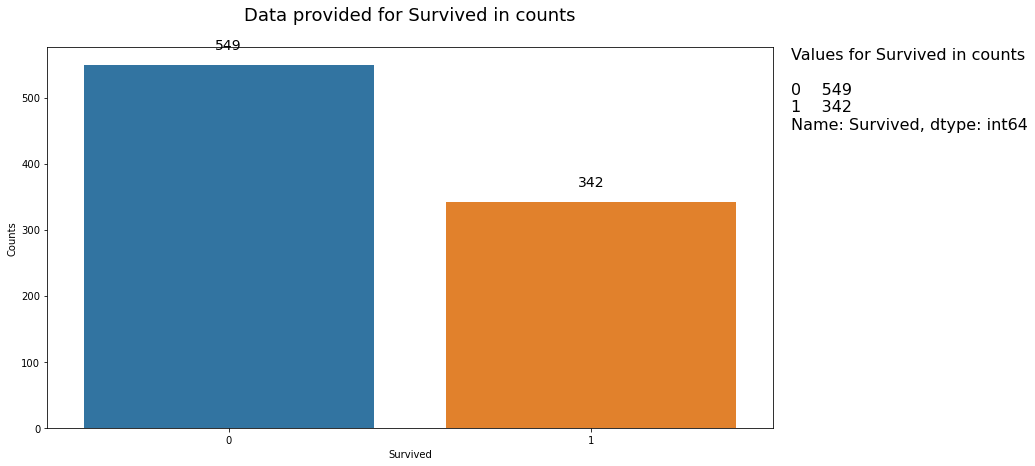

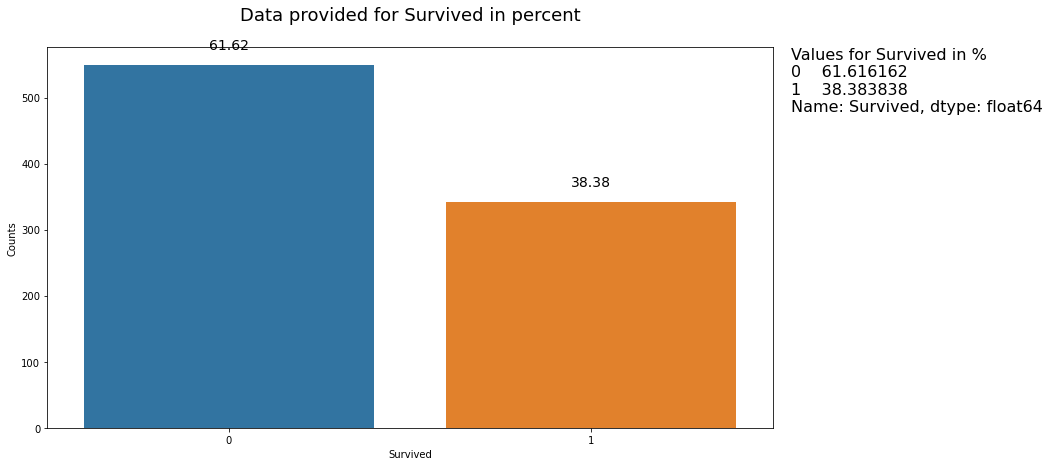

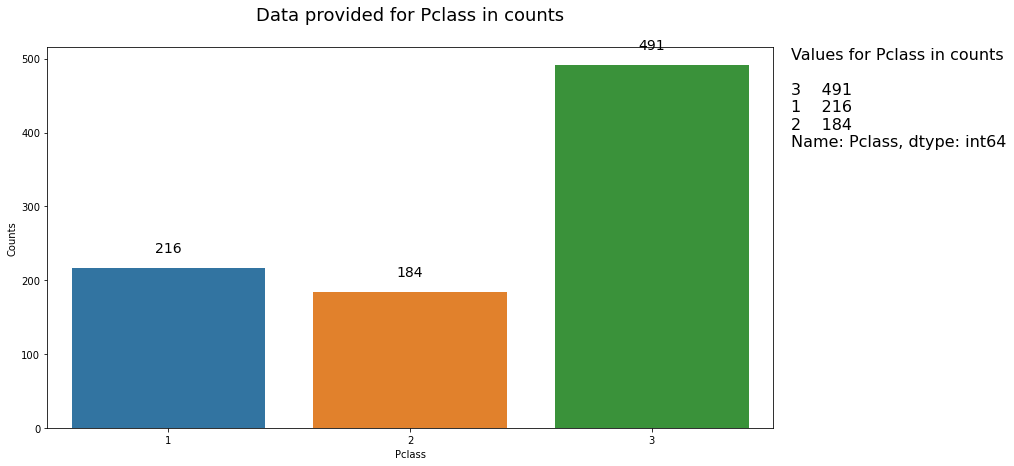

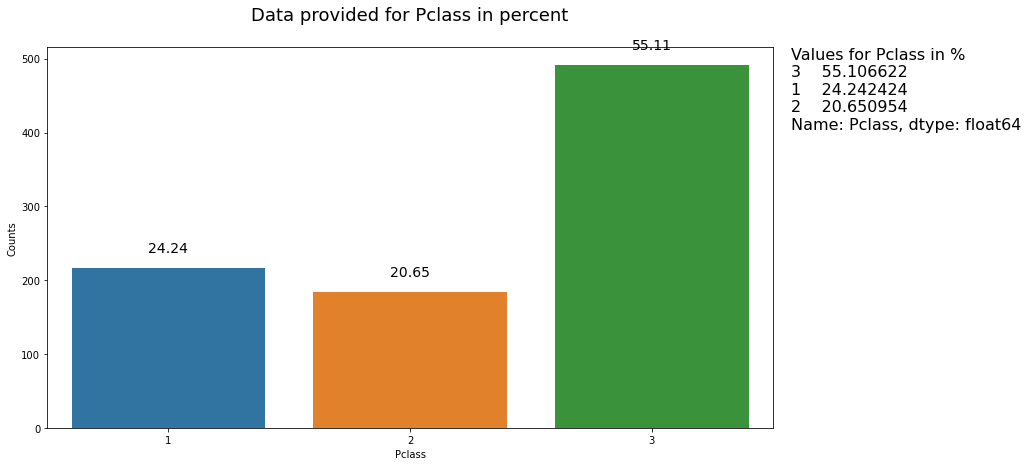

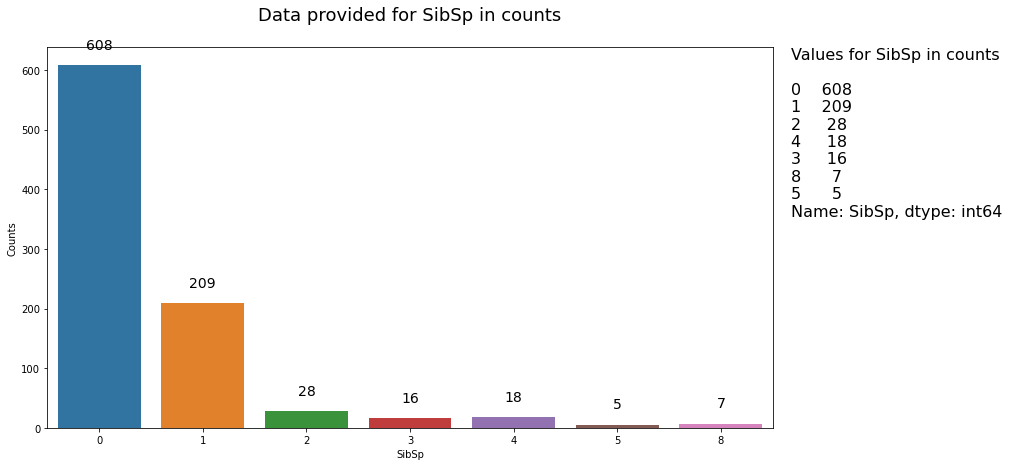

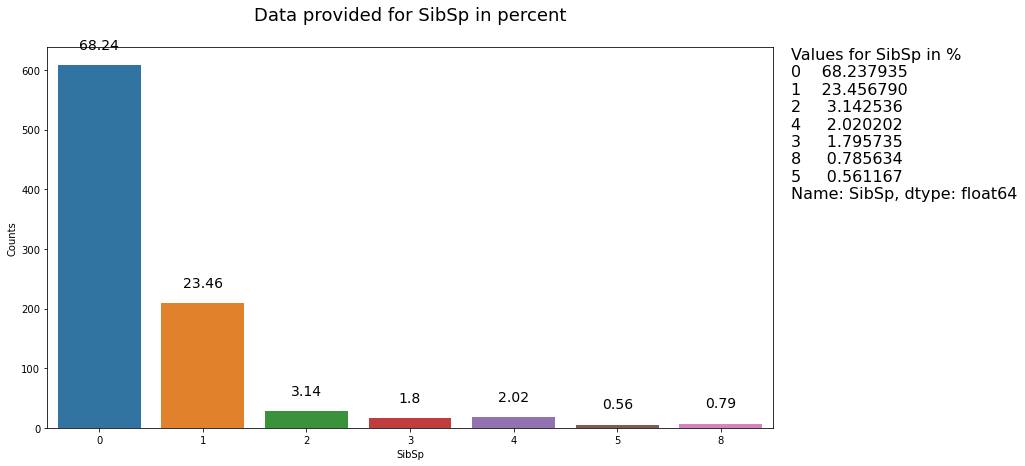

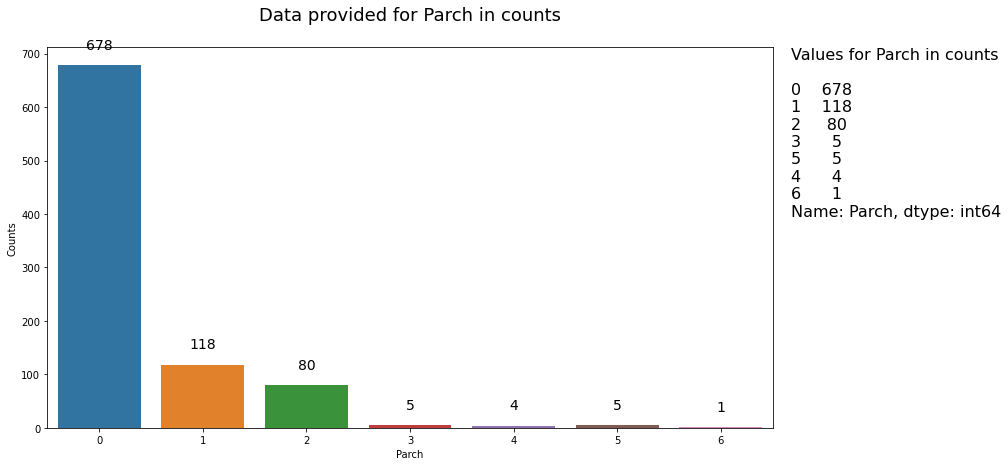

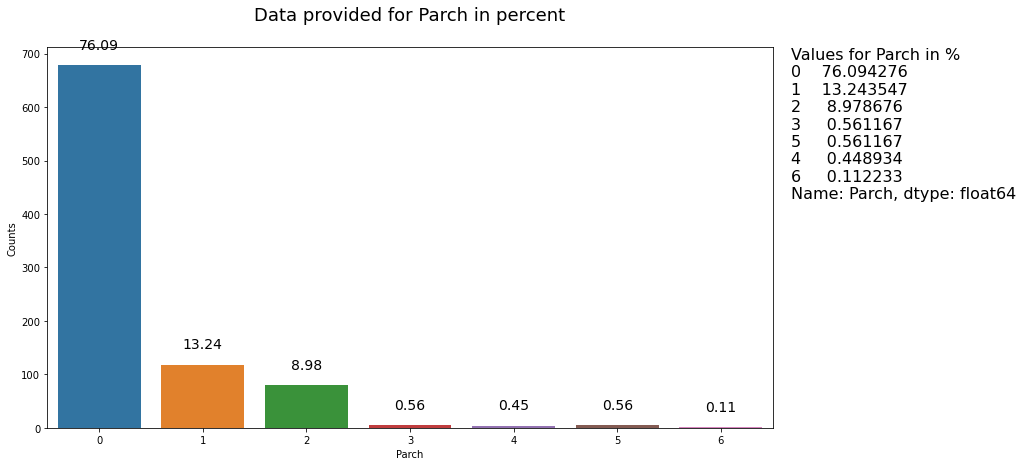

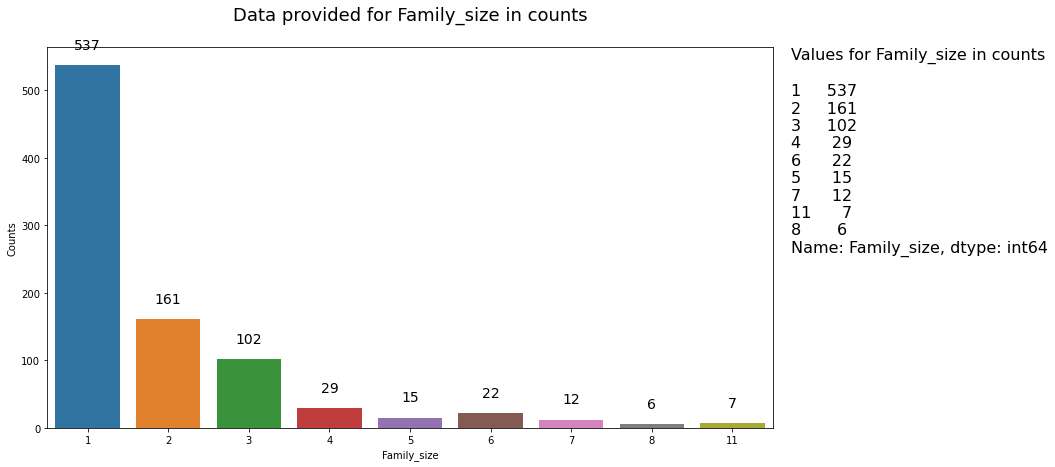

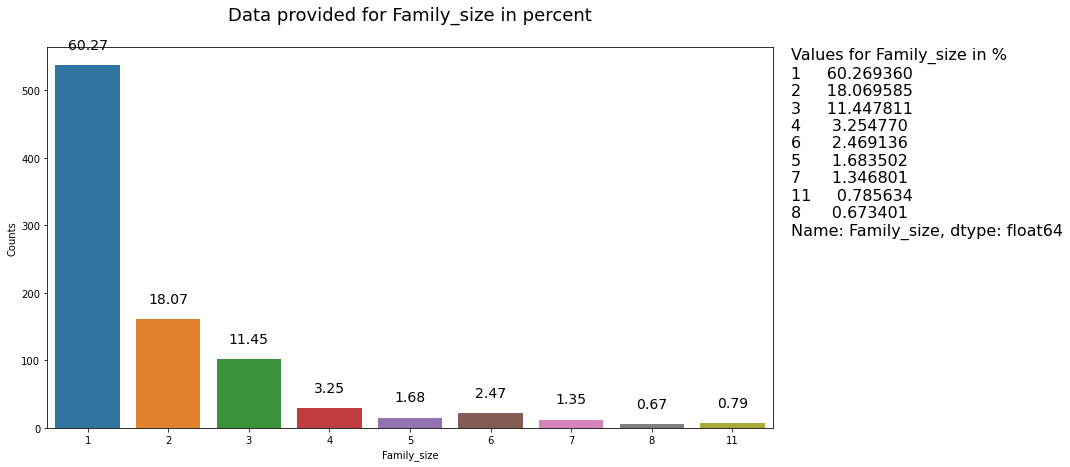

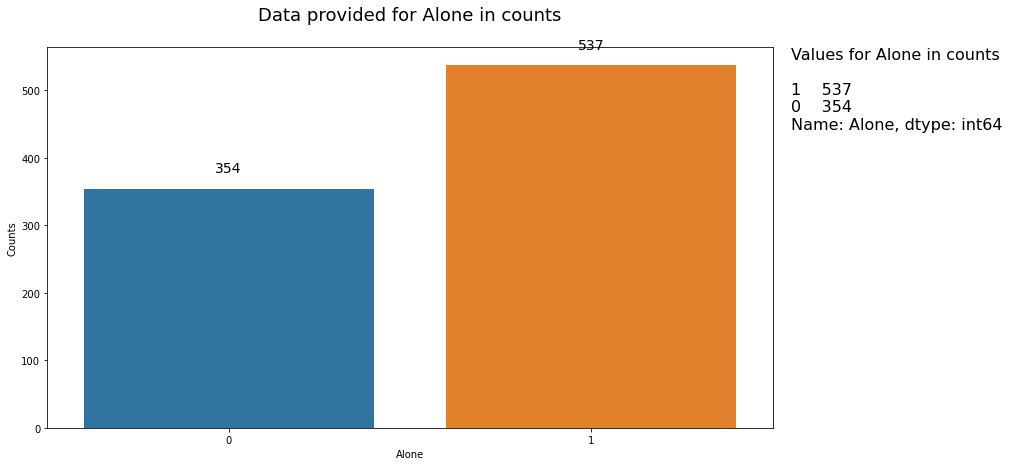

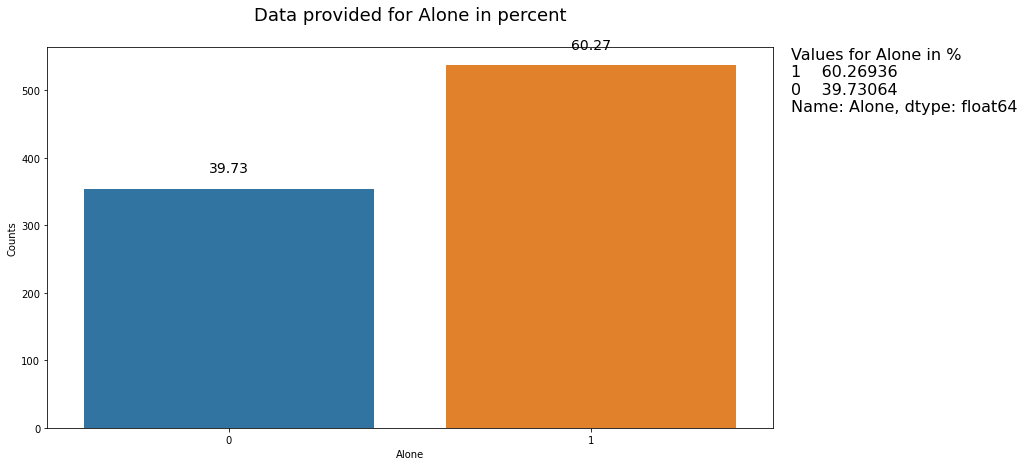

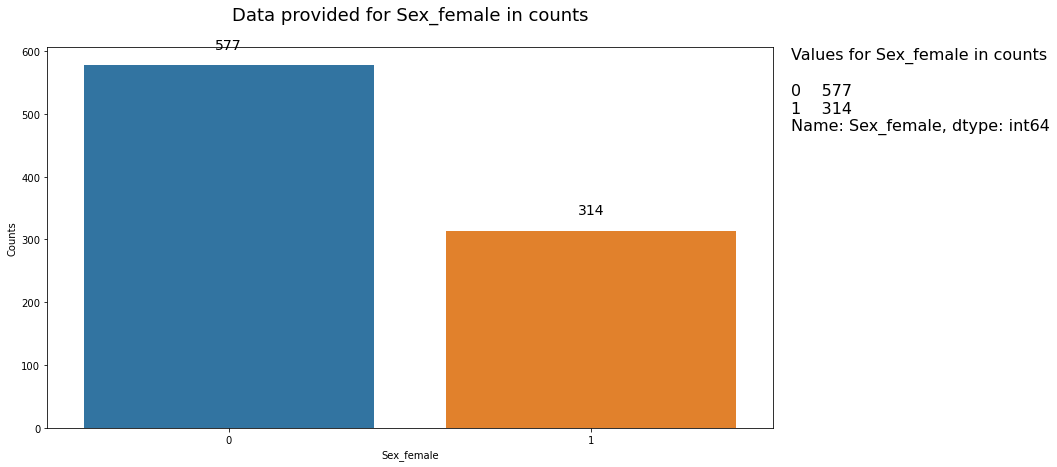

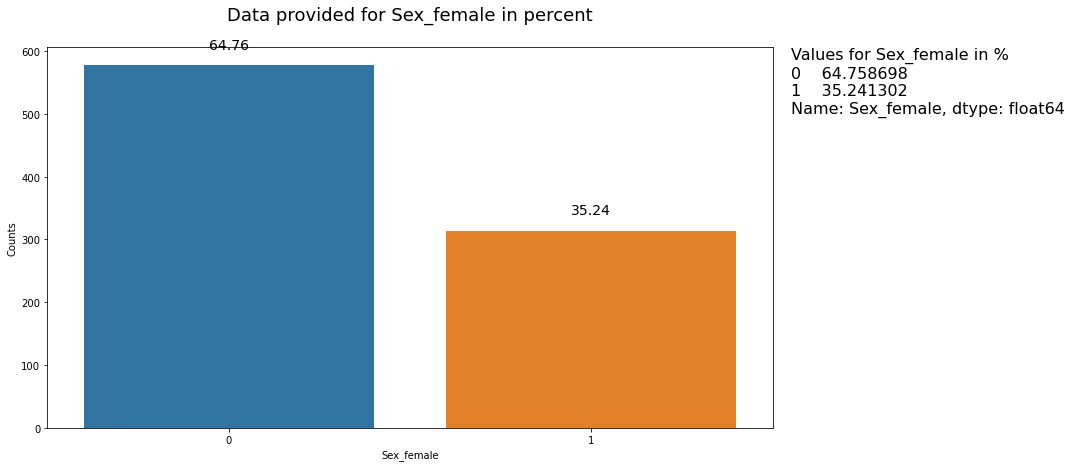

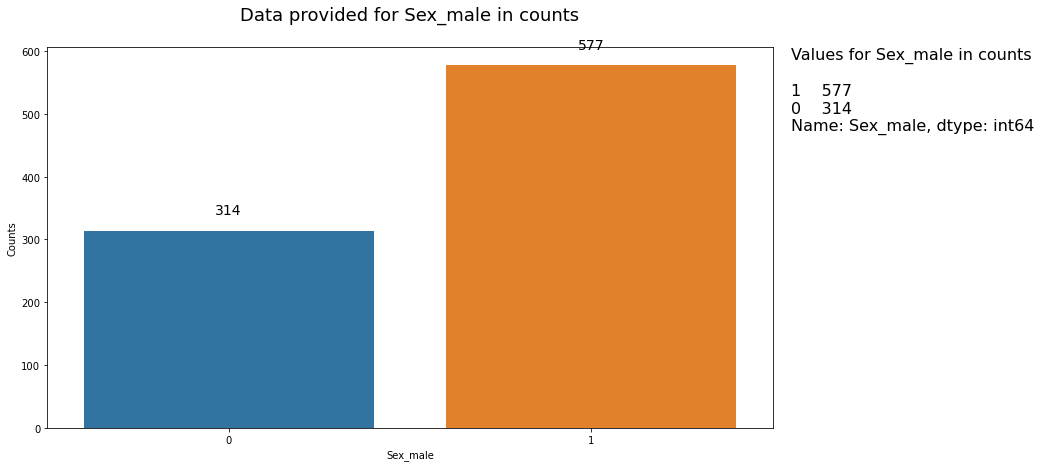

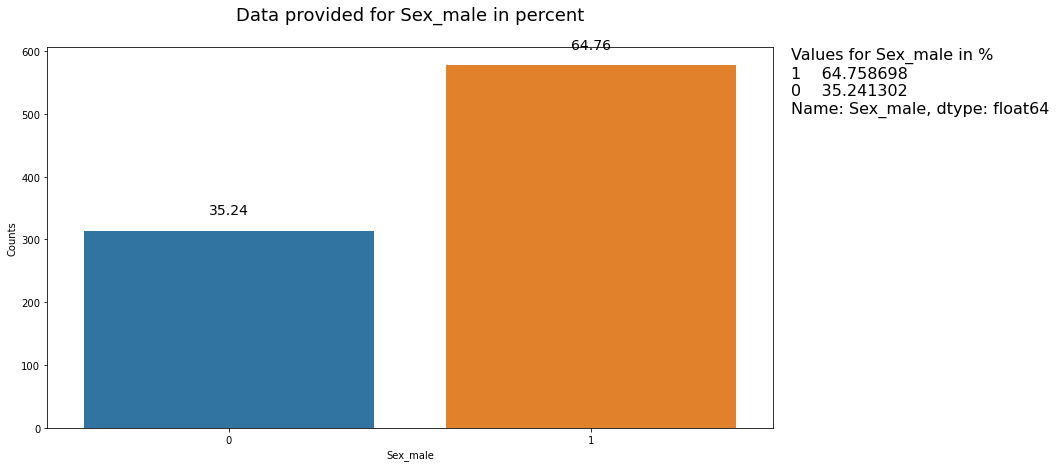

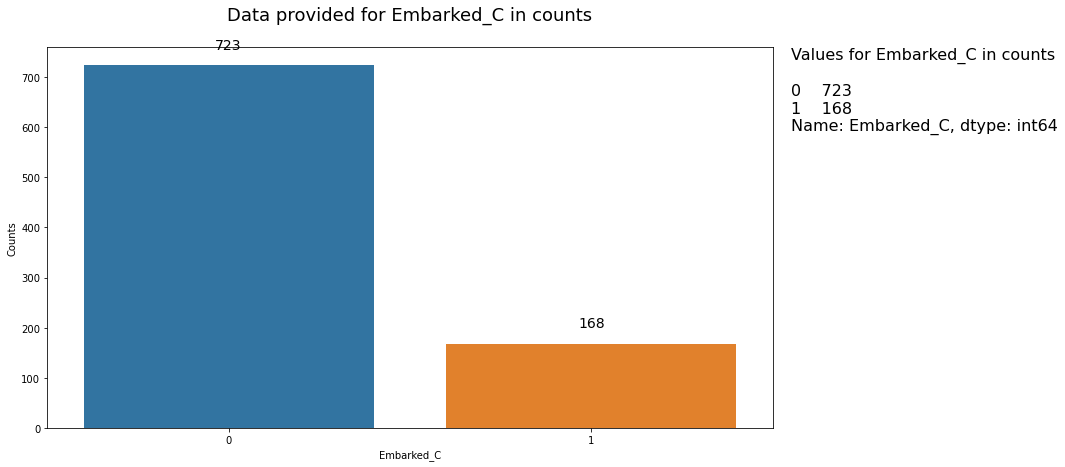

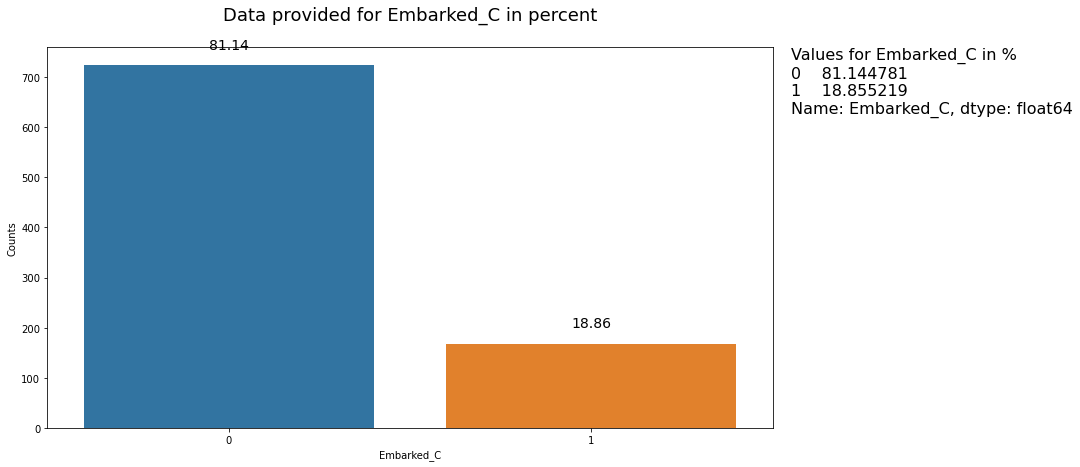

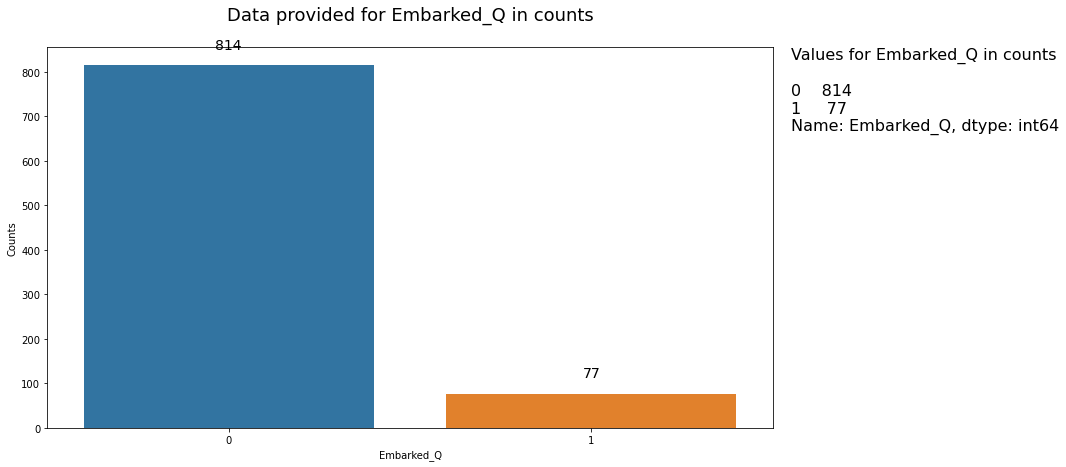

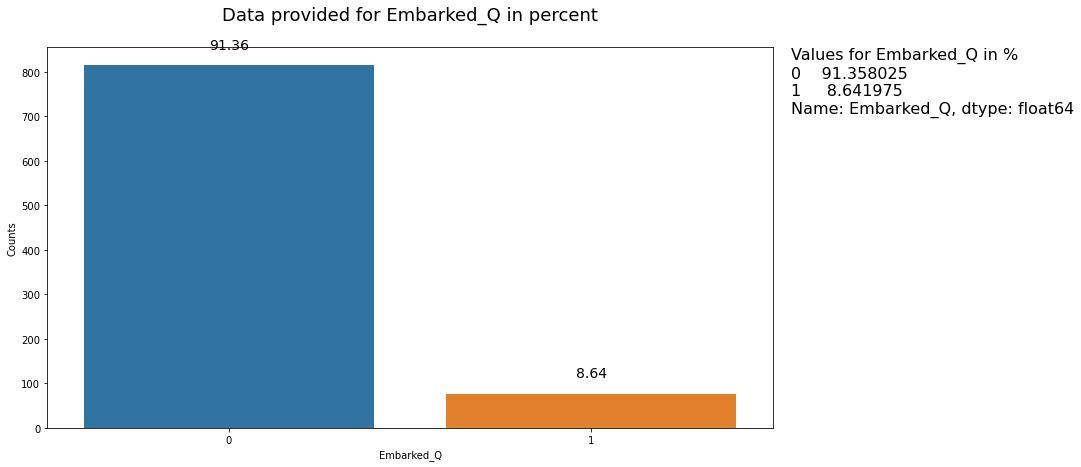

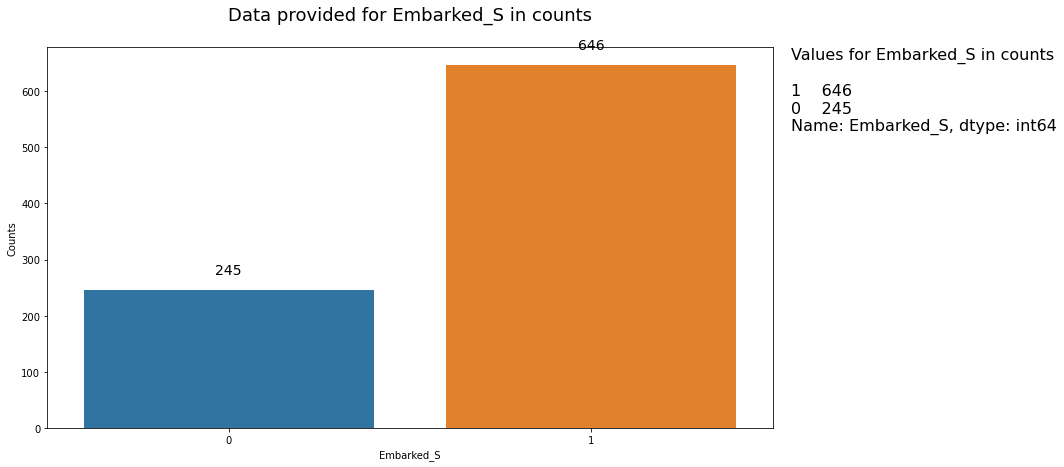

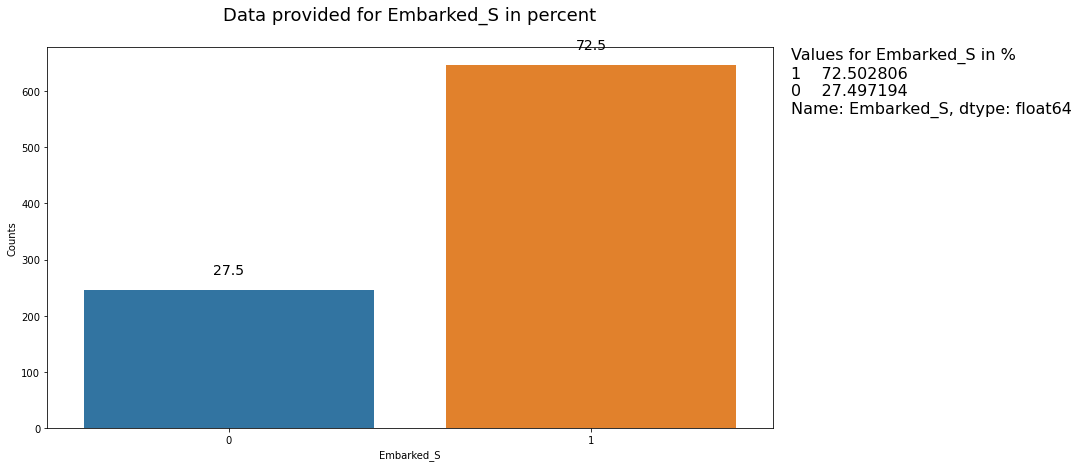

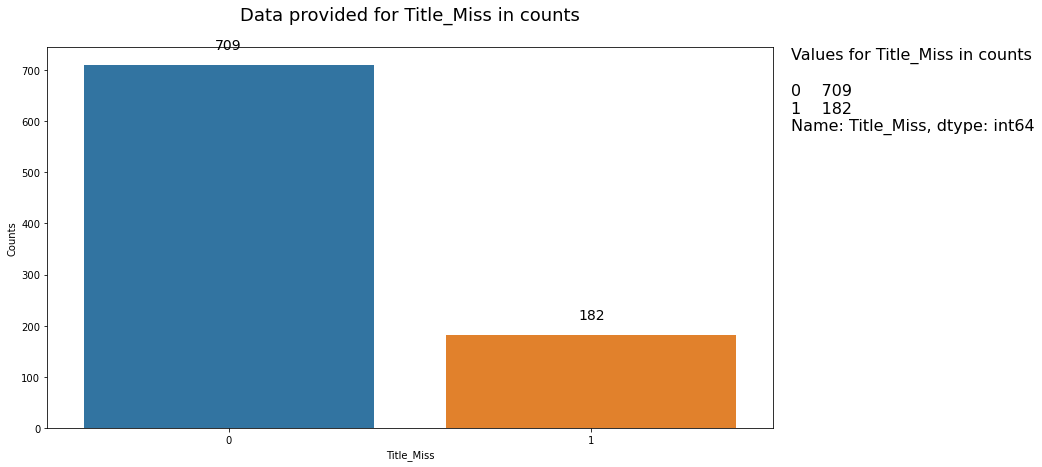

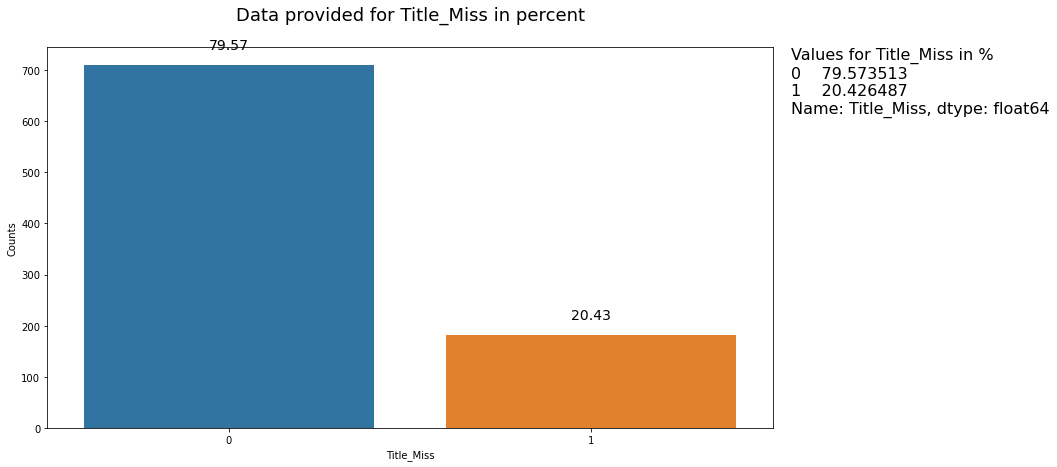

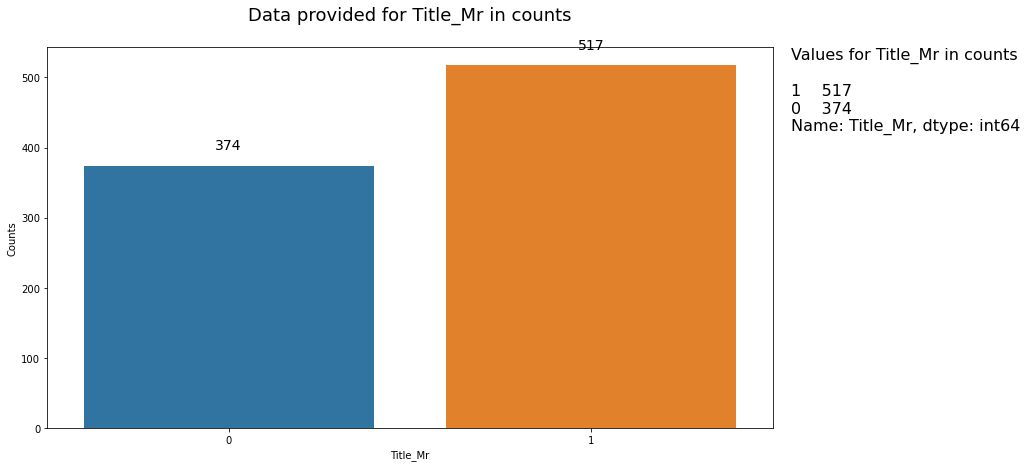

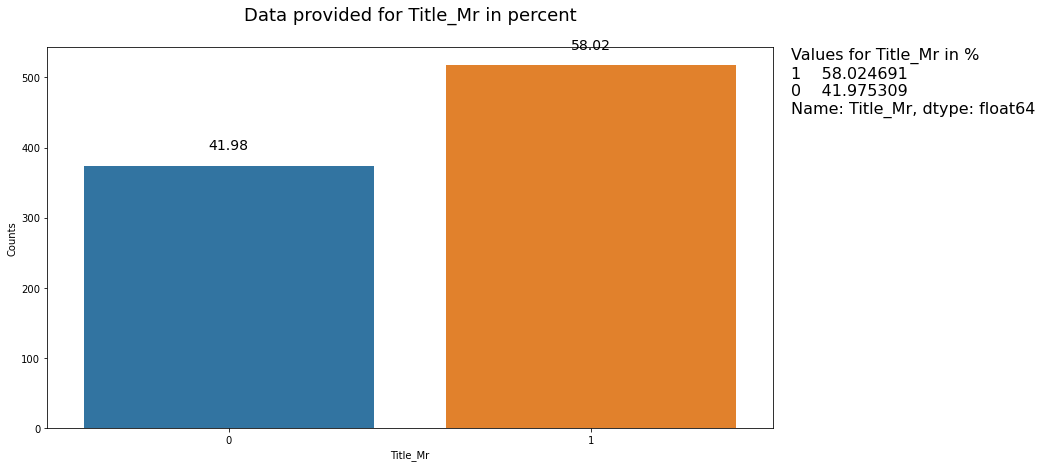

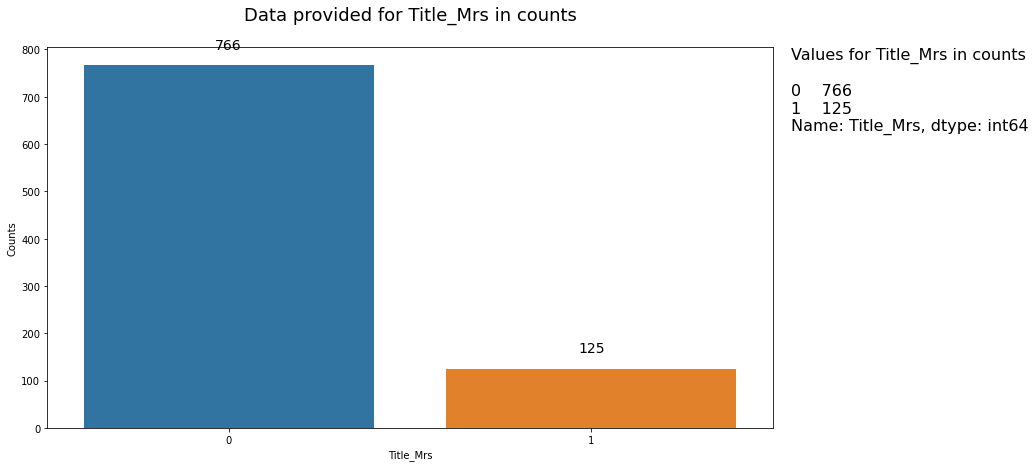

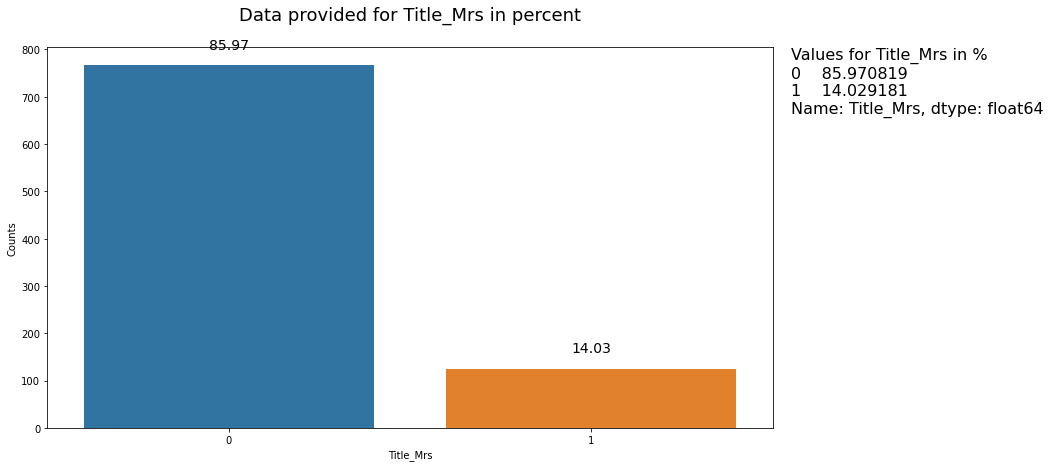

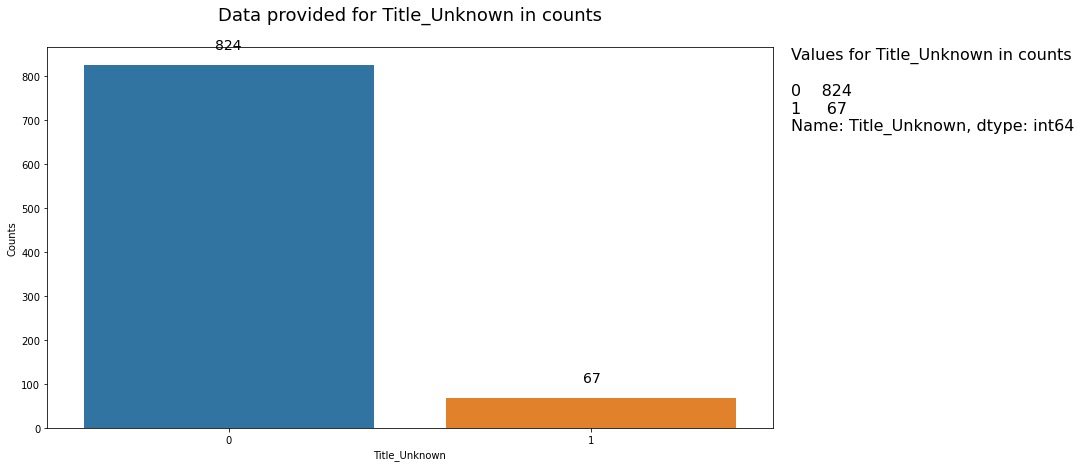

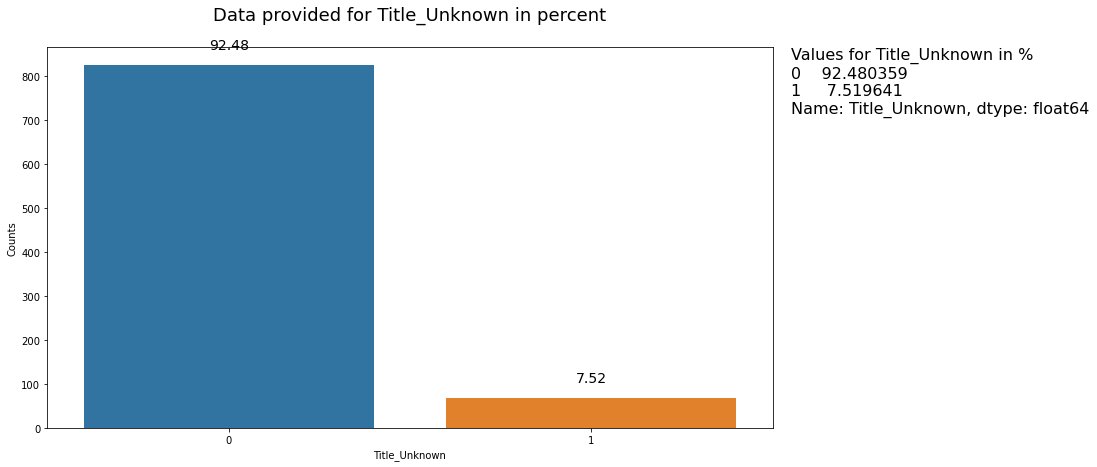

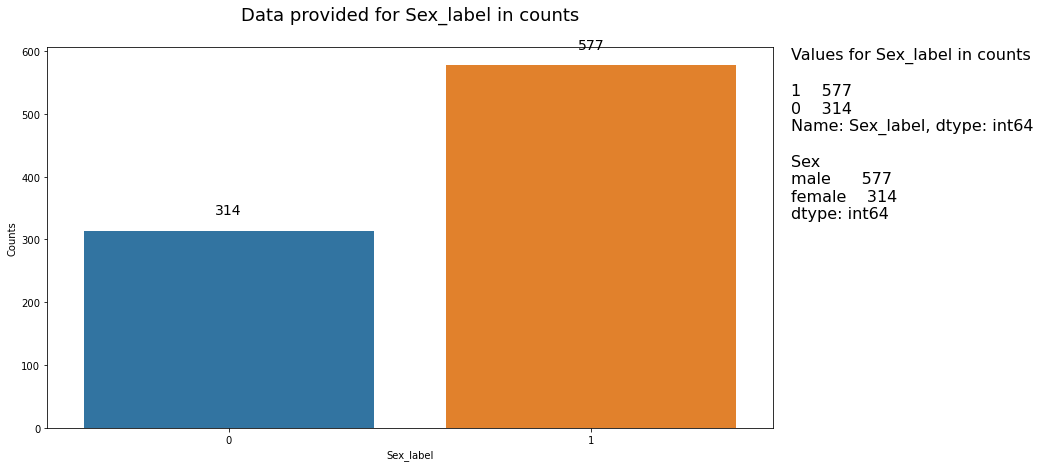

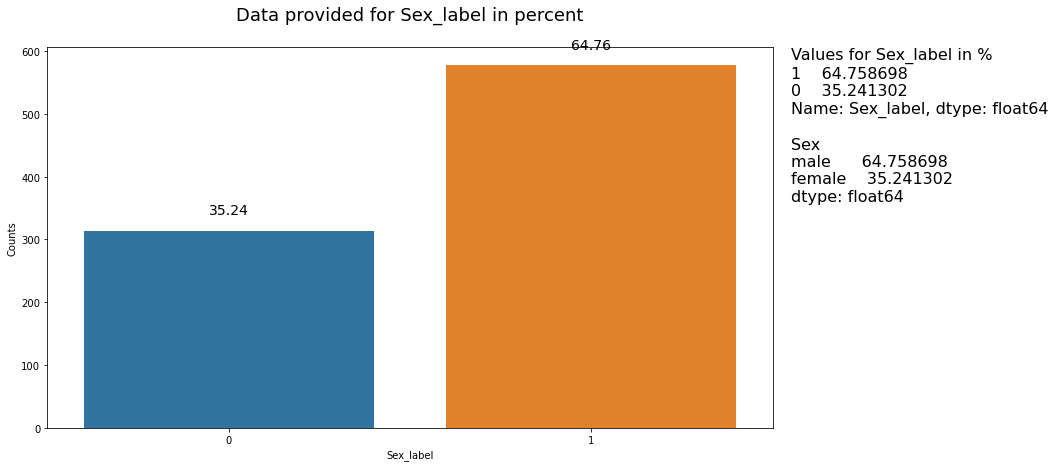

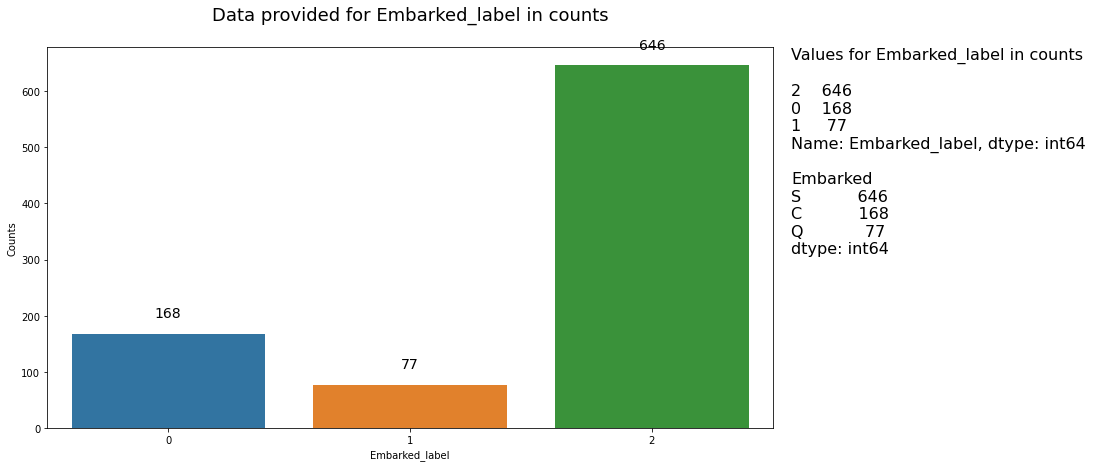

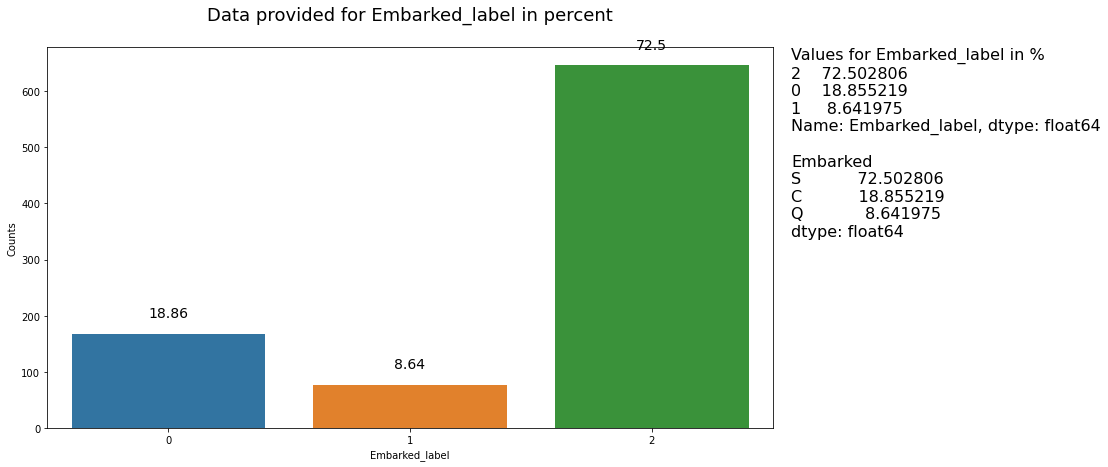

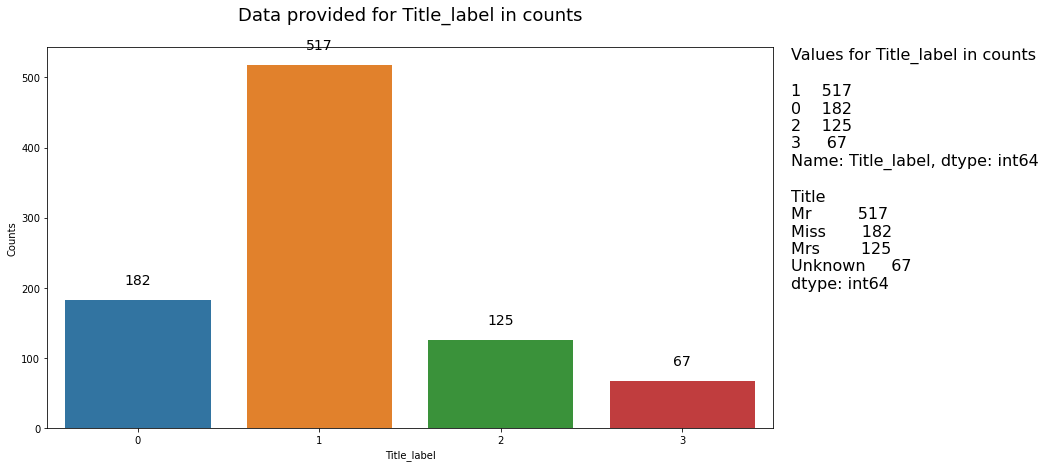

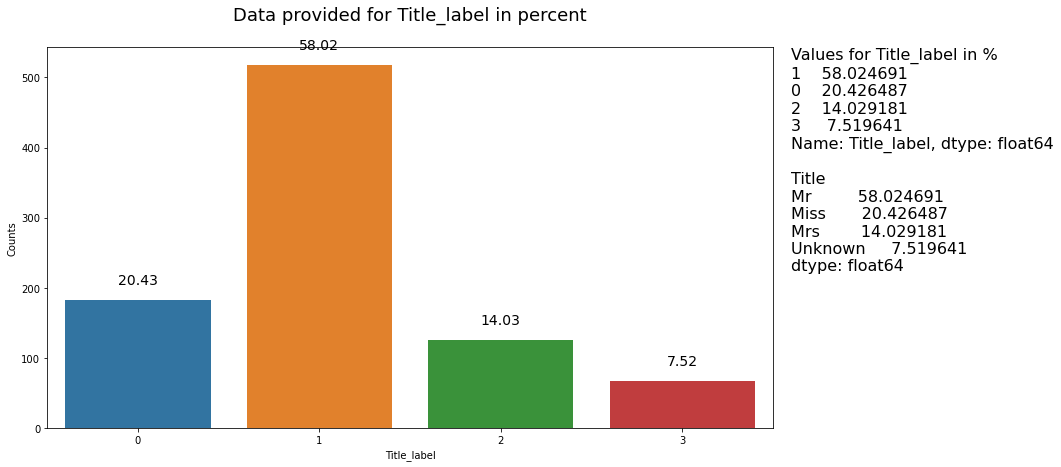

In [49]:
cat(tn, 10)

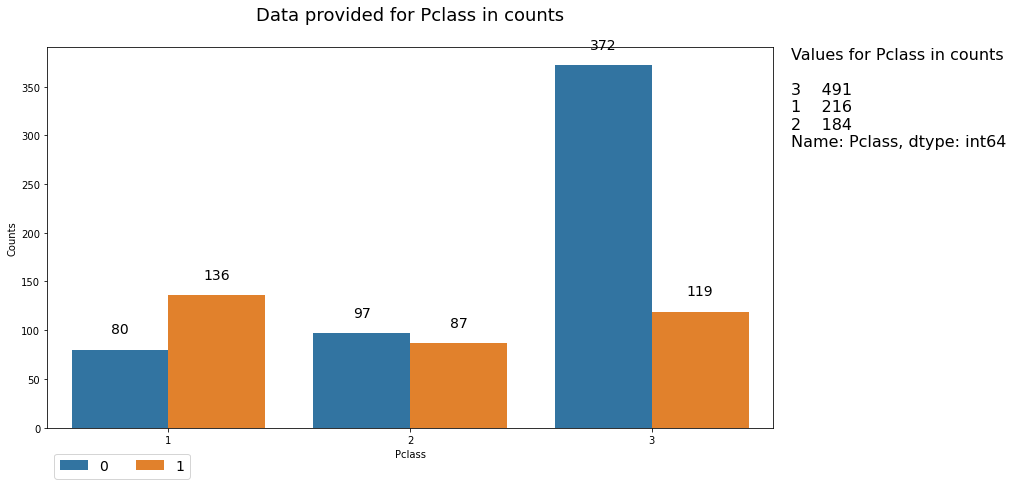

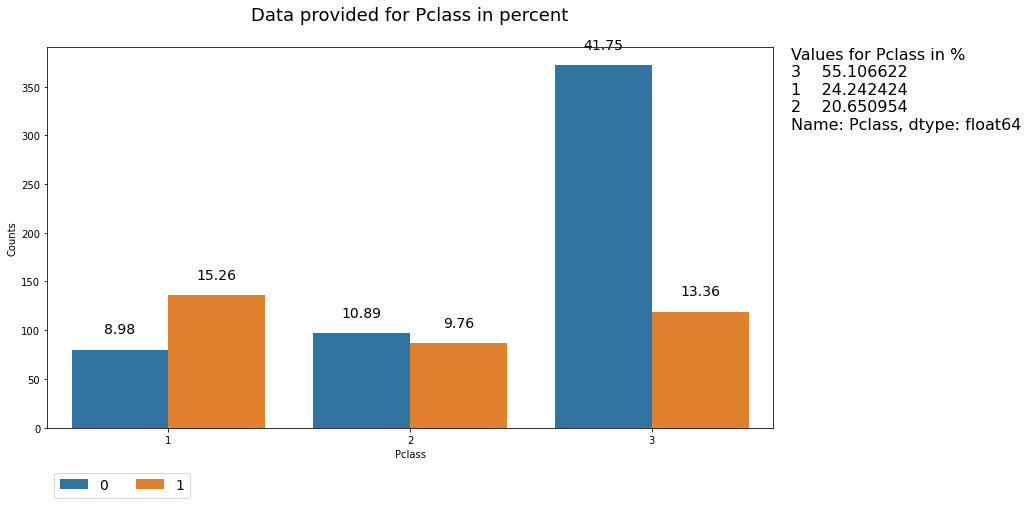

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


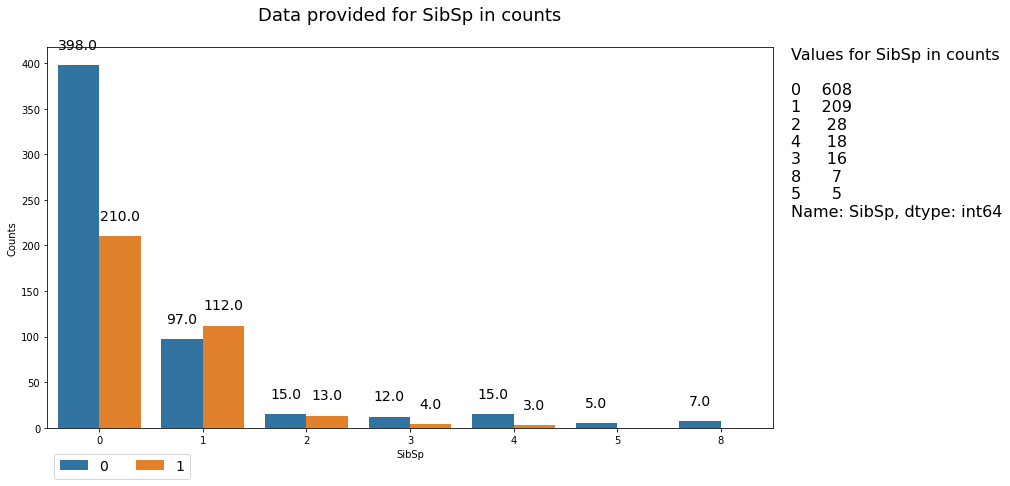

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


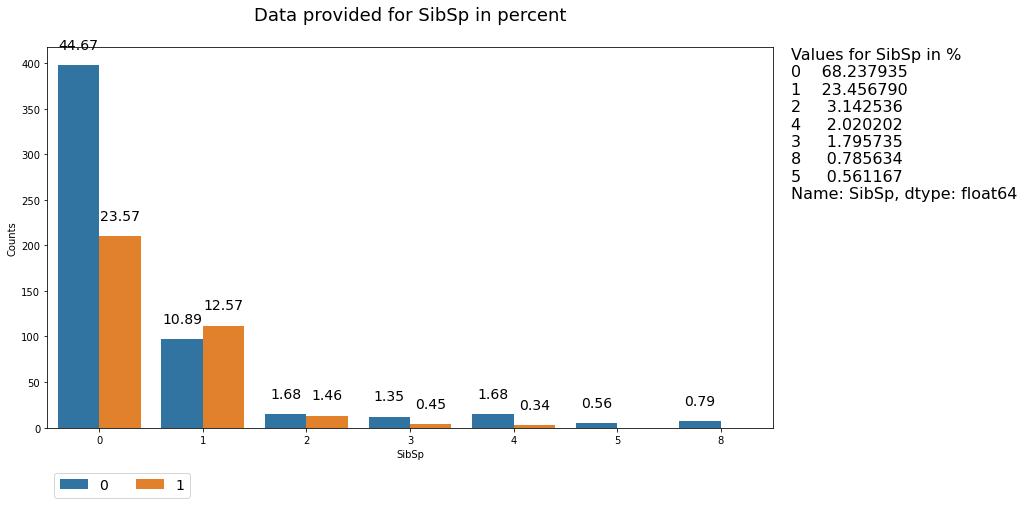

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


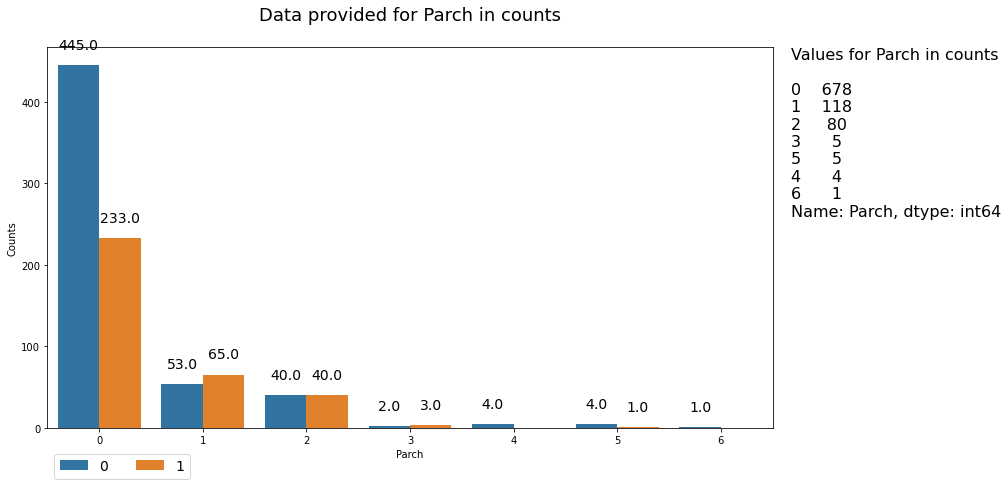

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


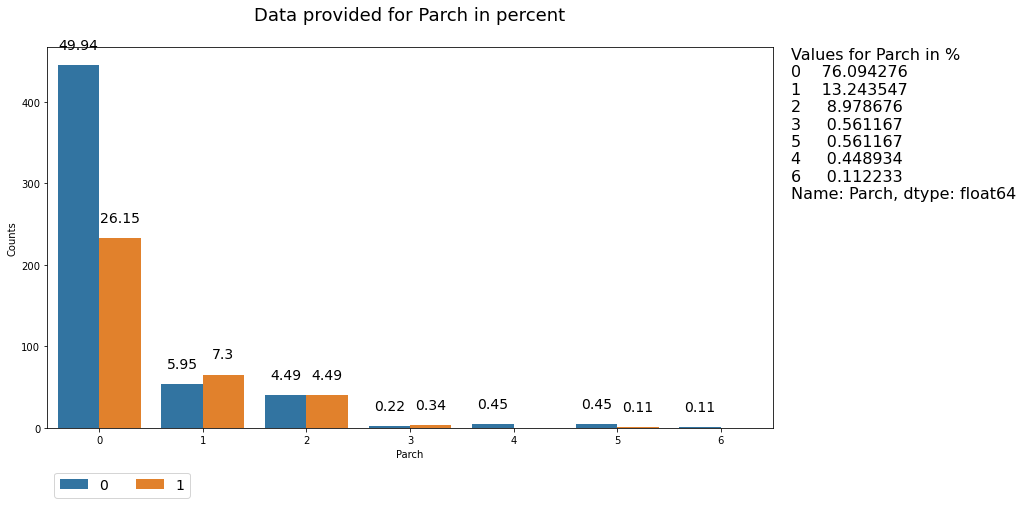

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


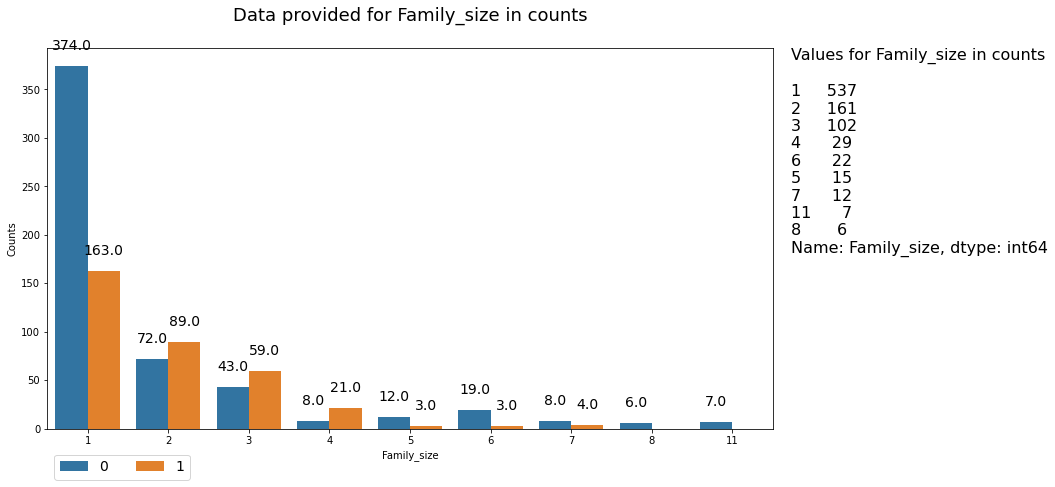

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


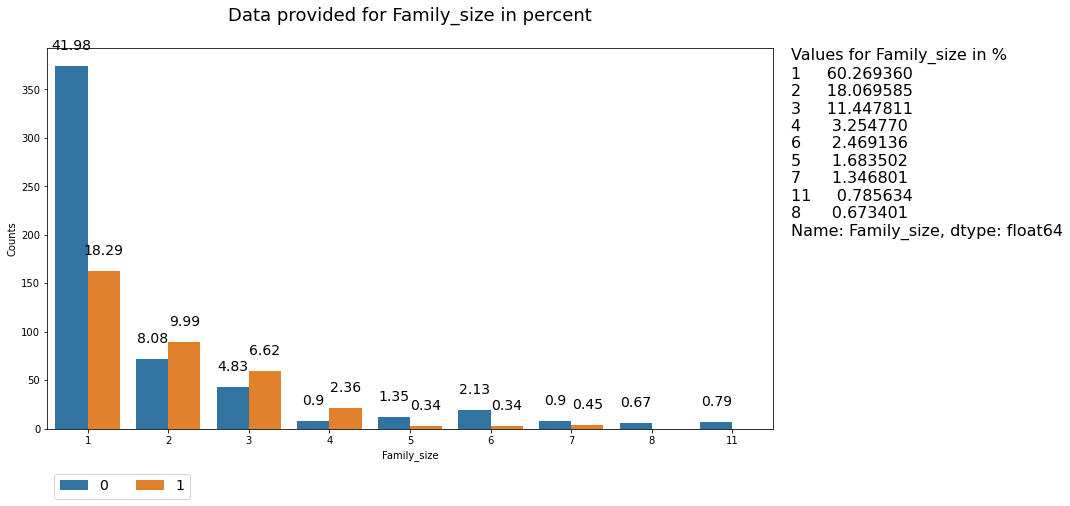

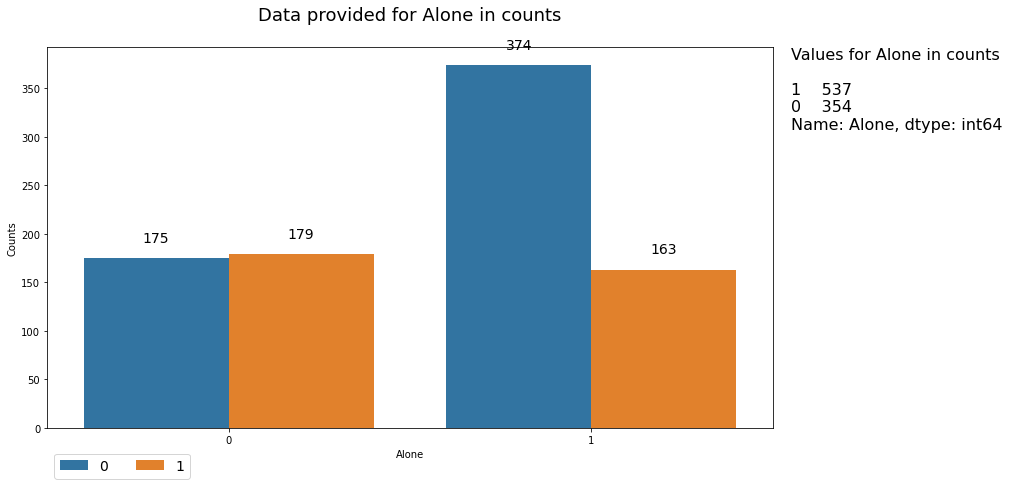

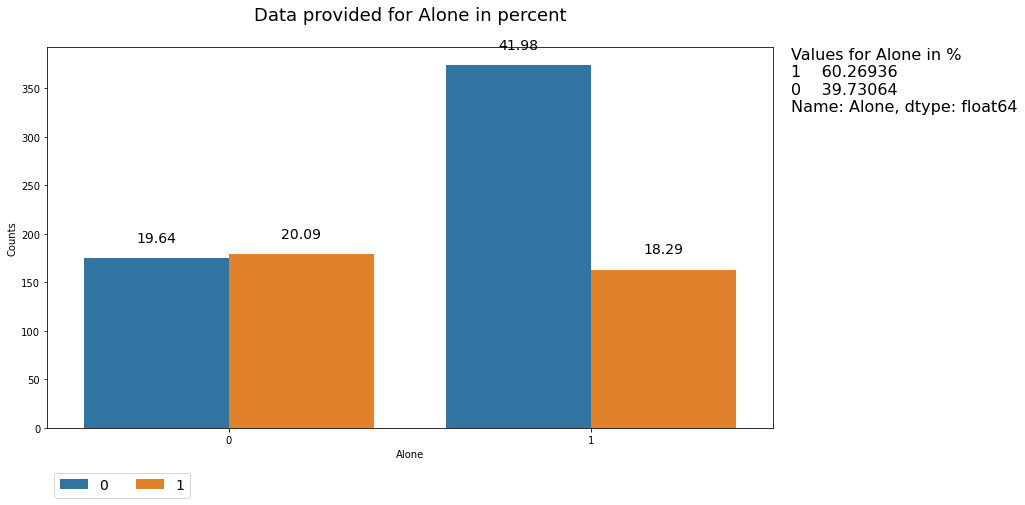

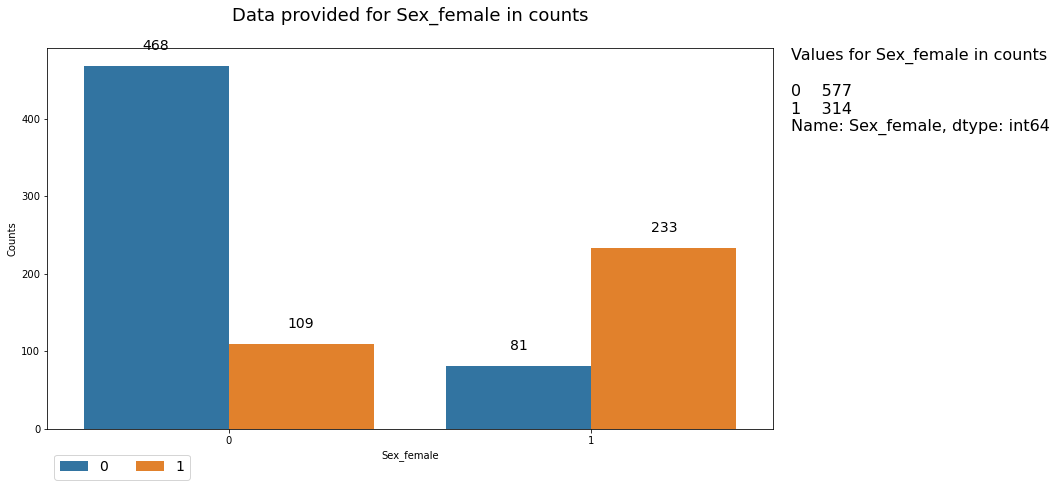

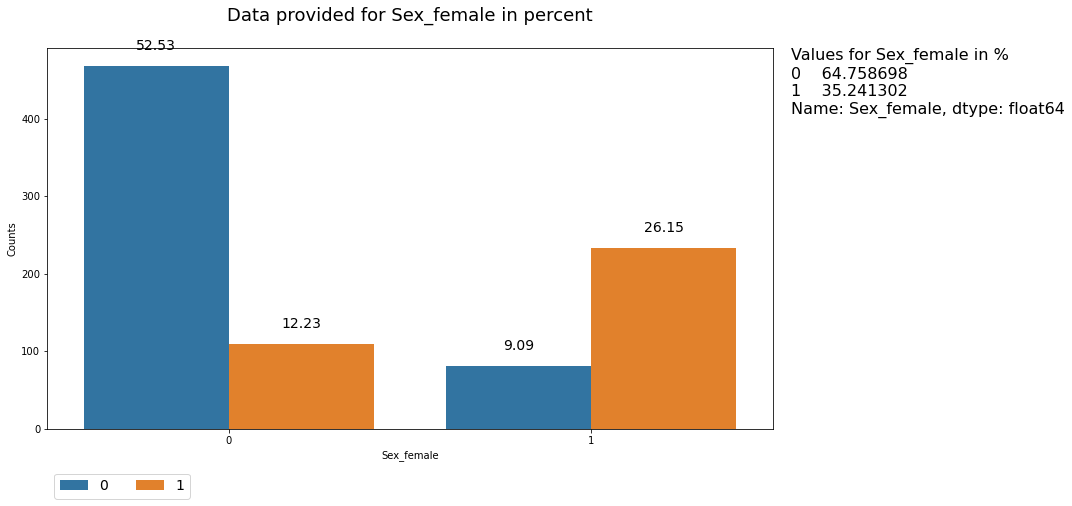

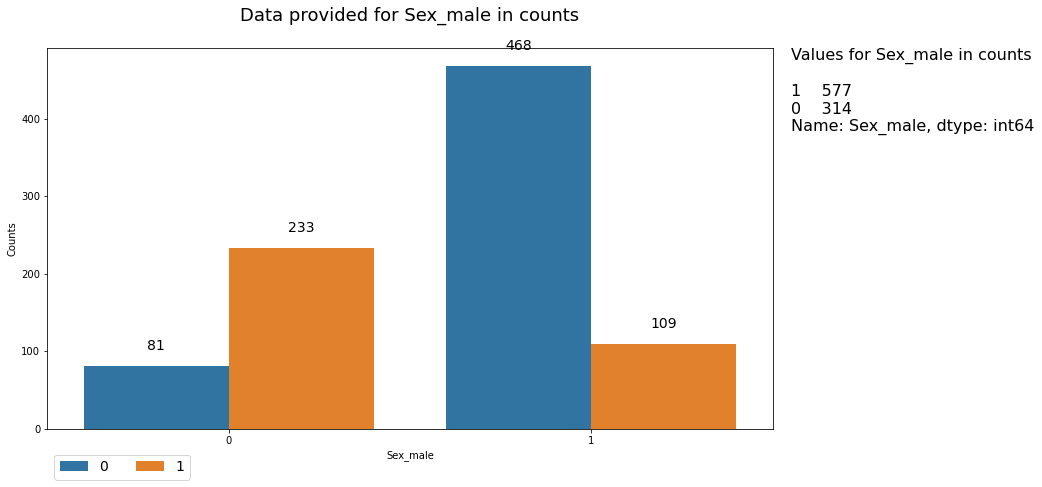

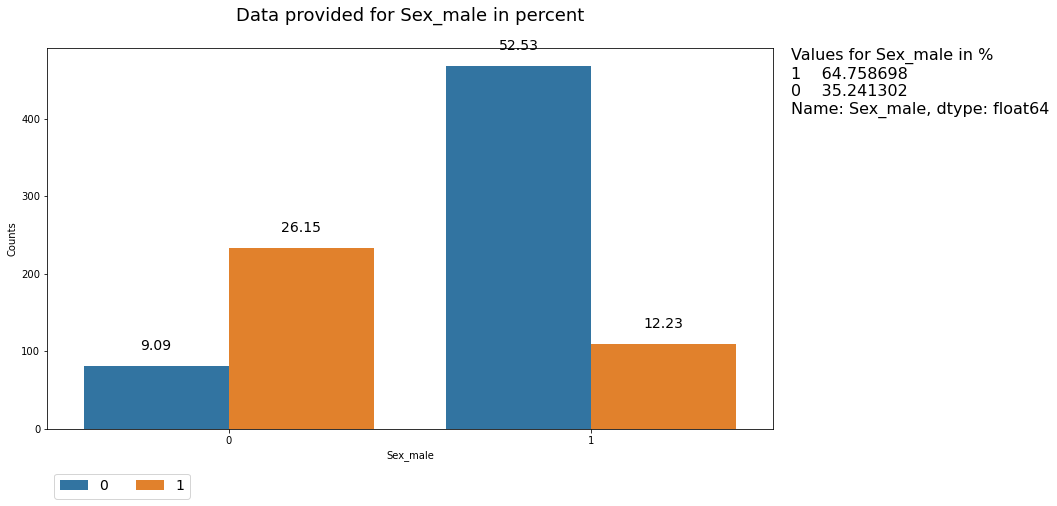

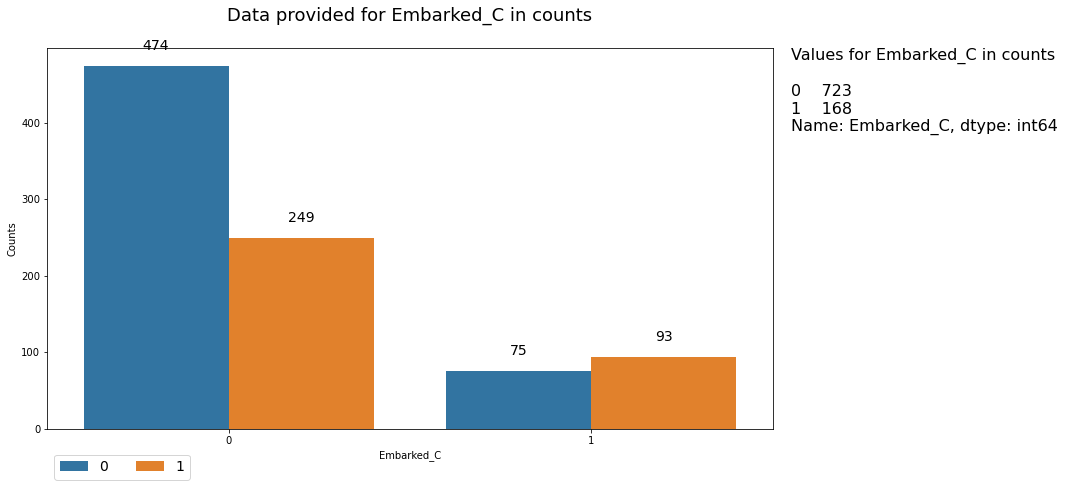

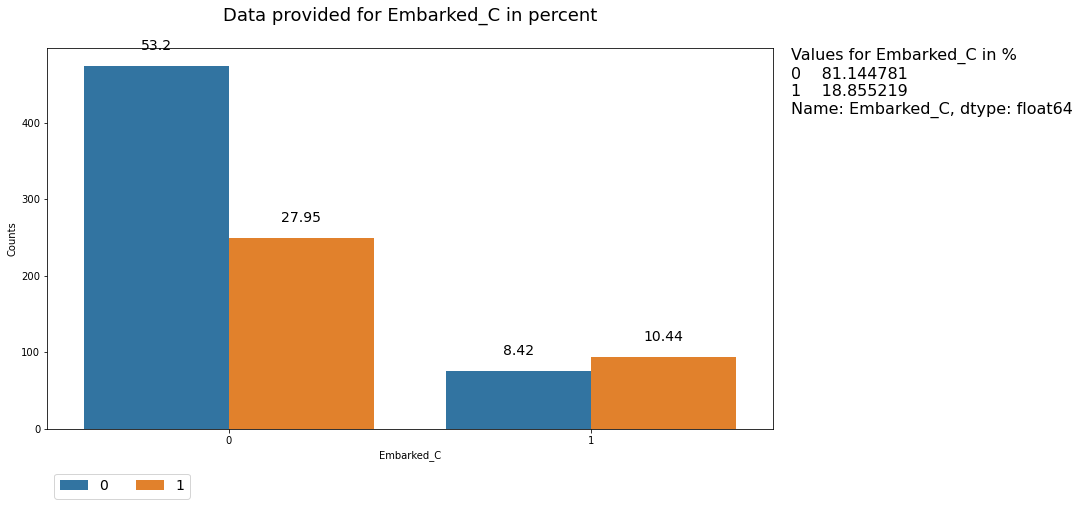

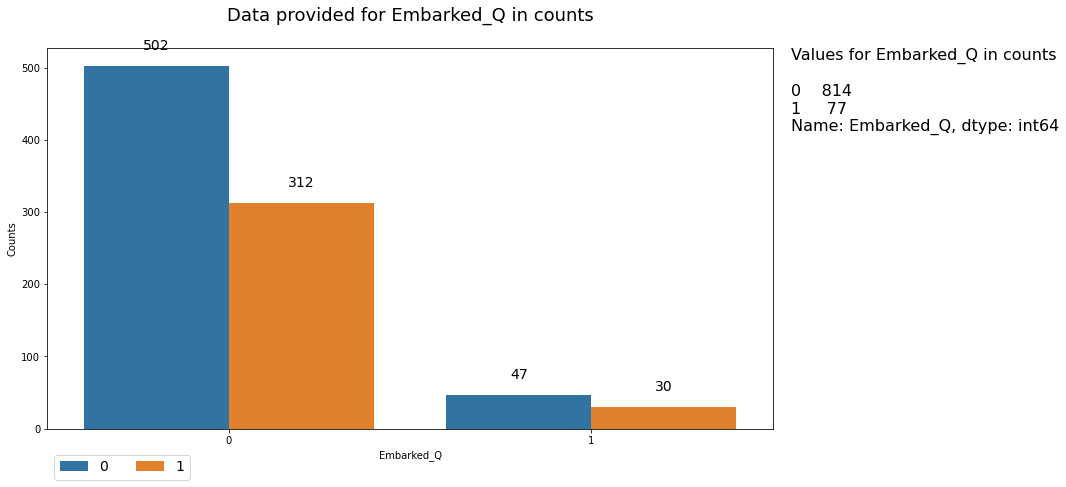

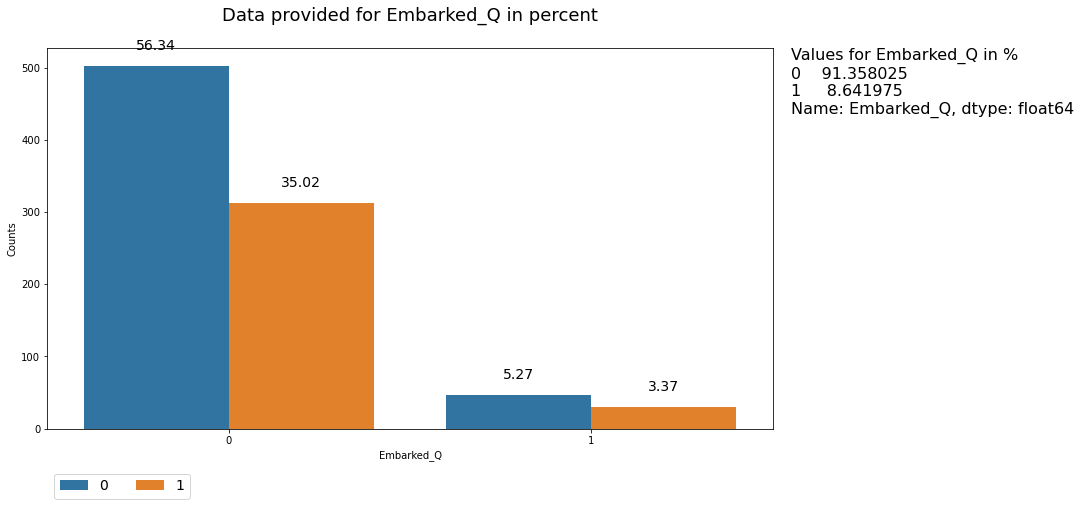

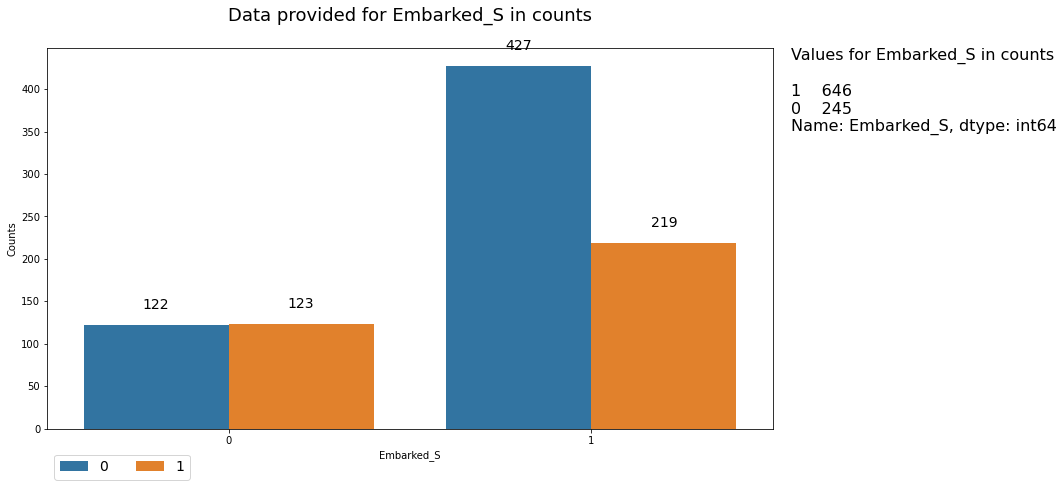

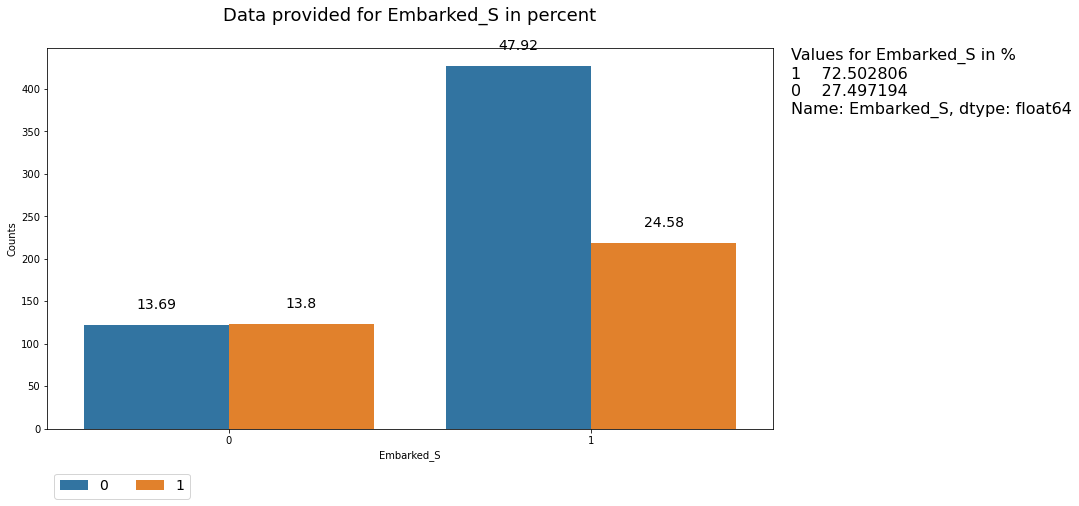

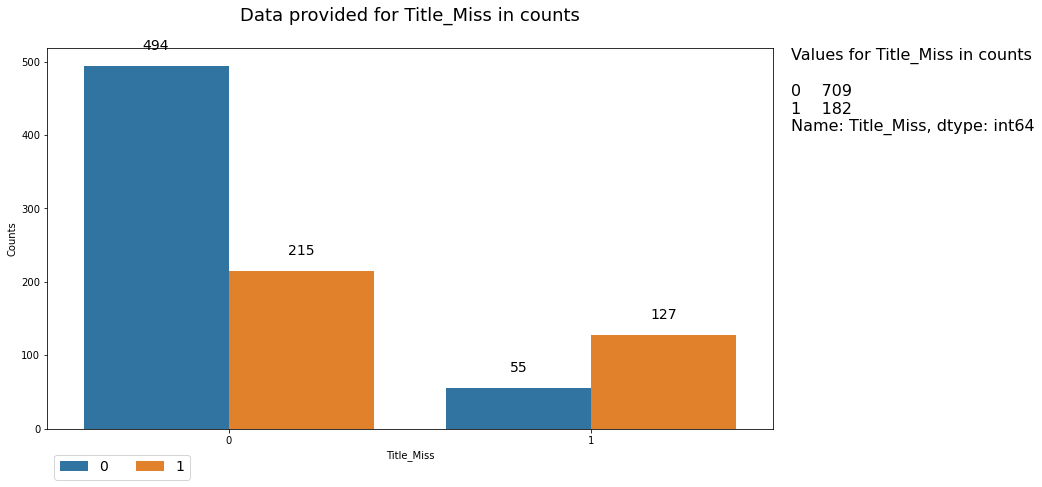

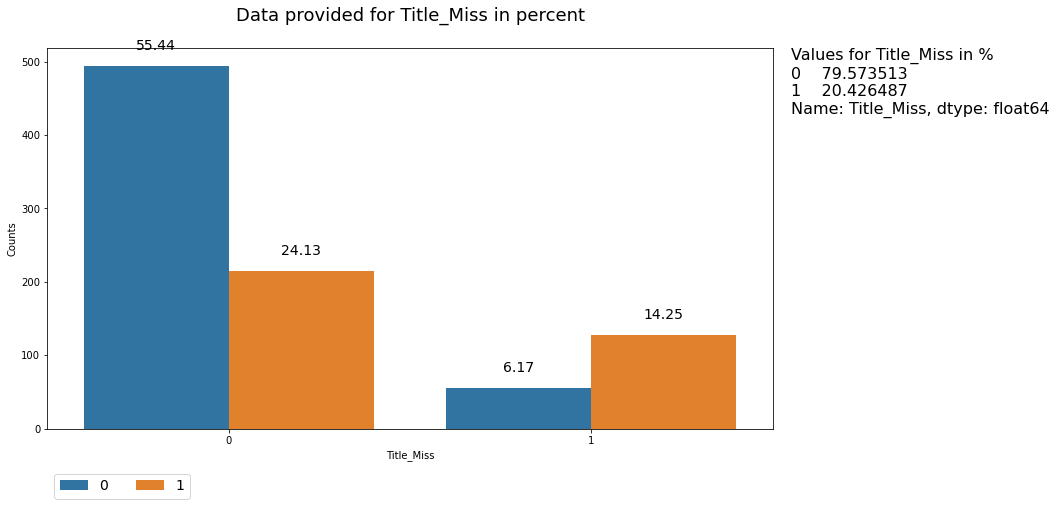

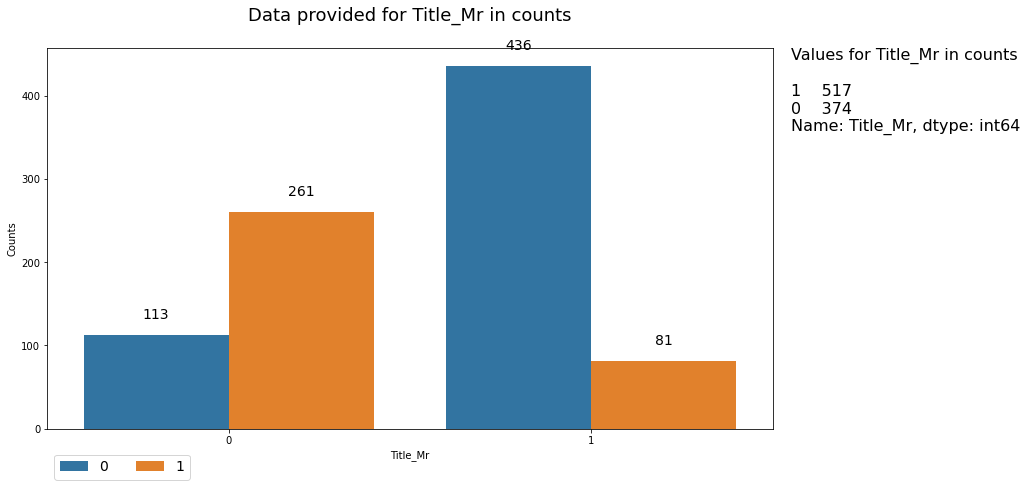

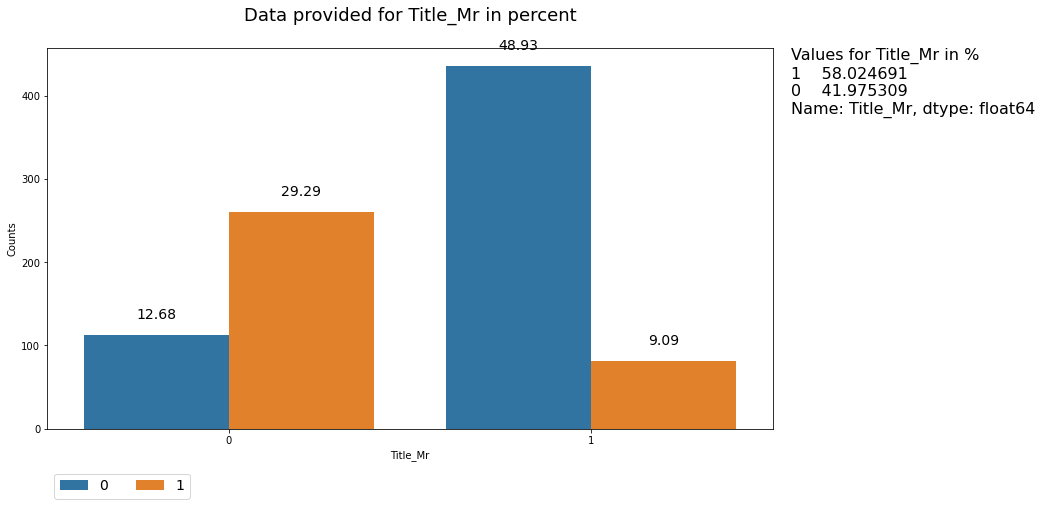

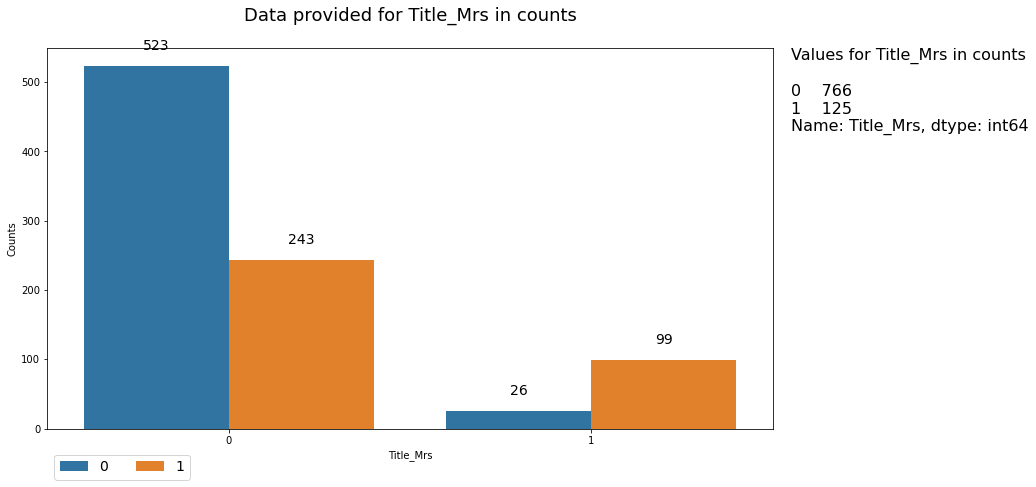

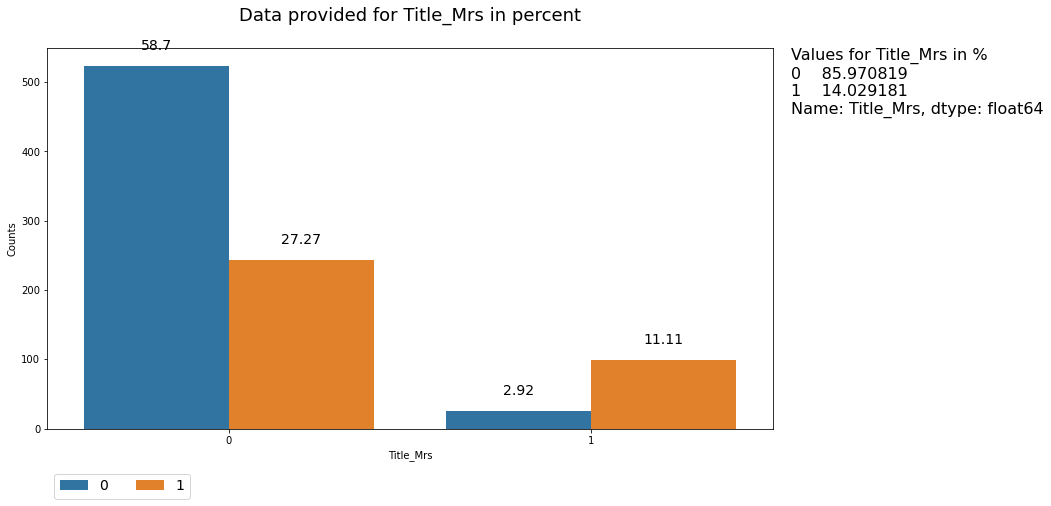

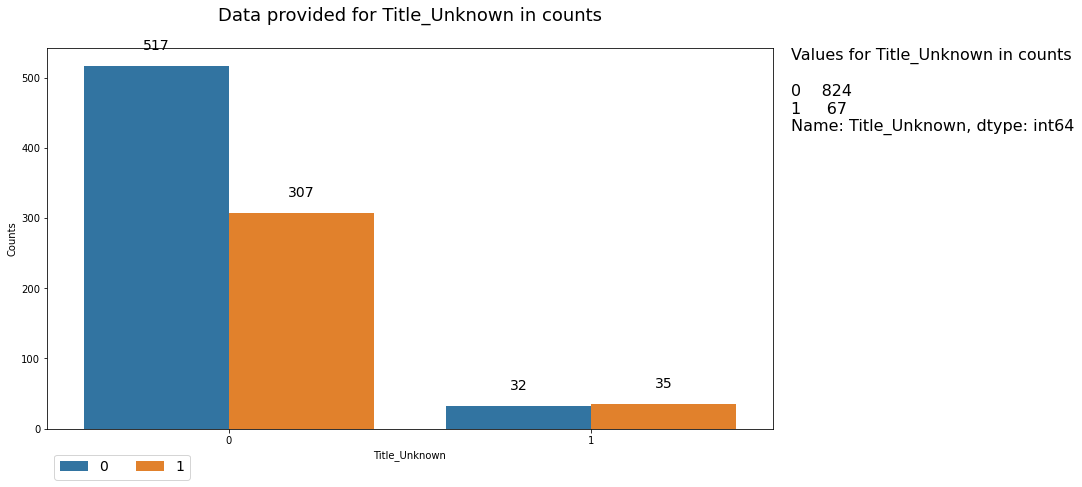

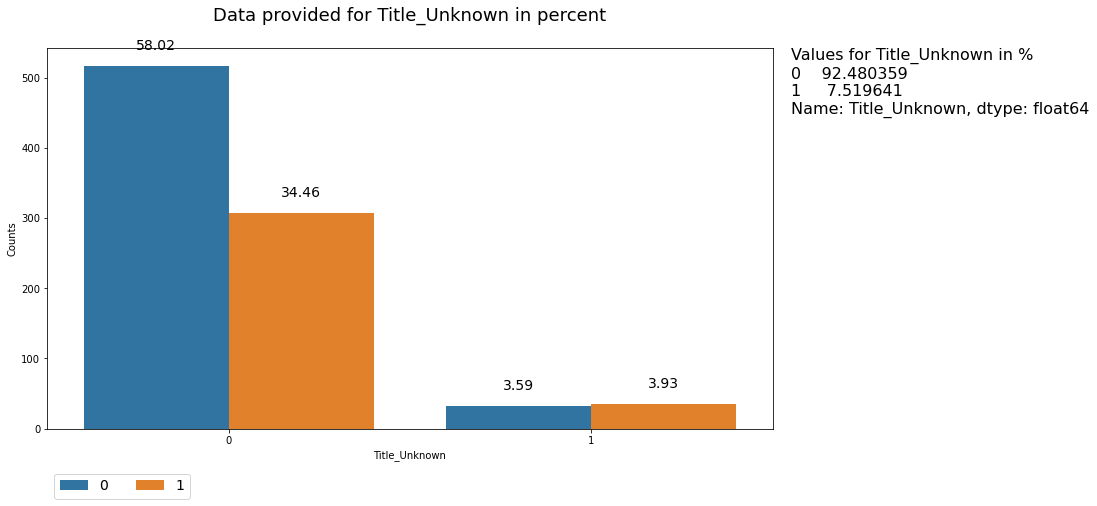

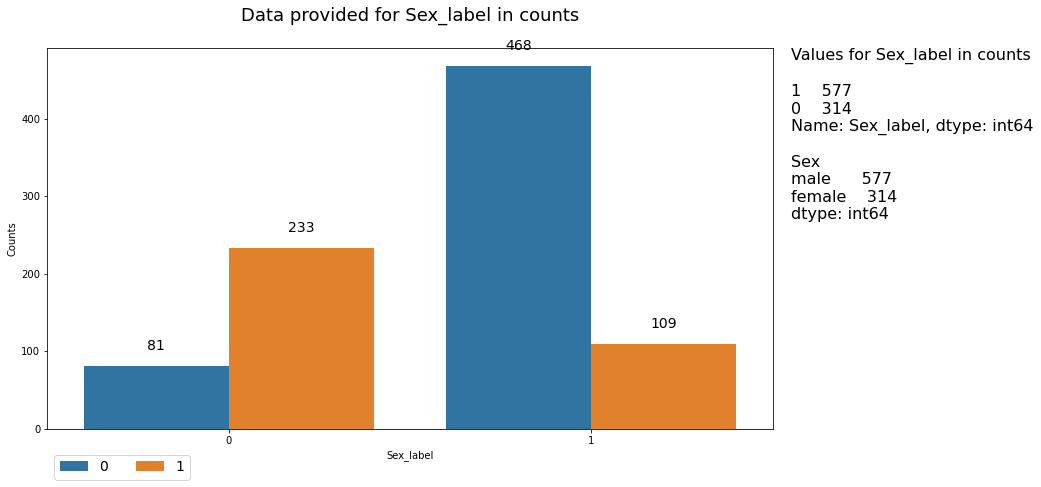

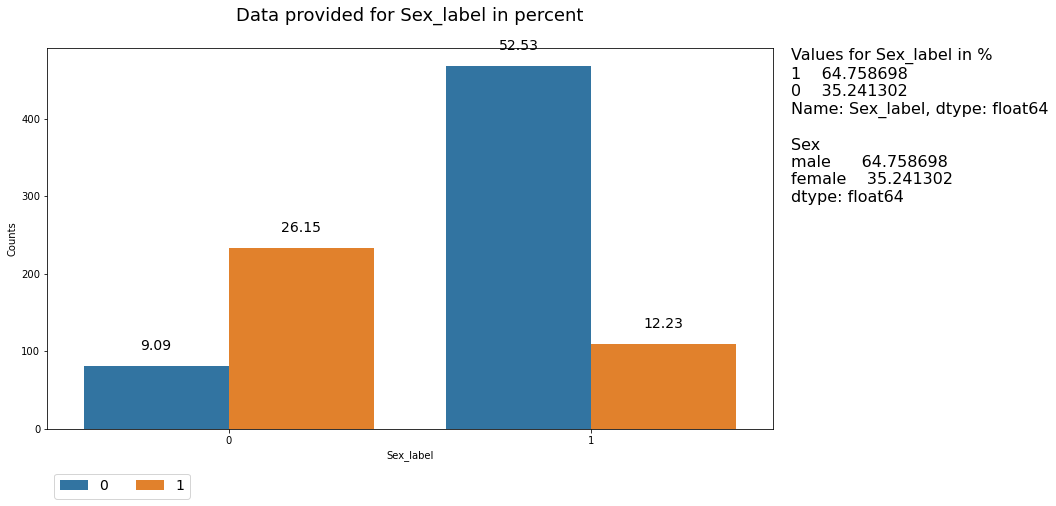

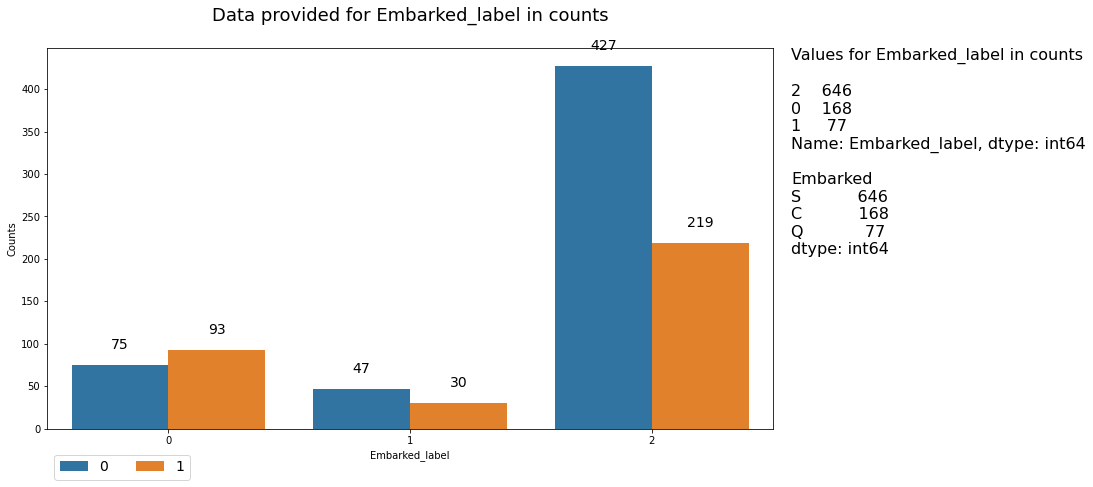

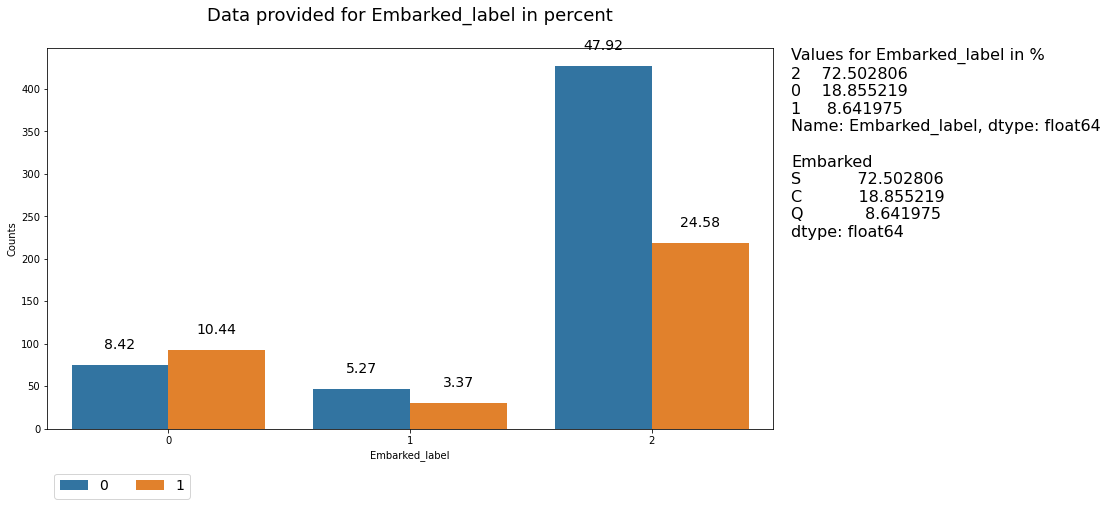

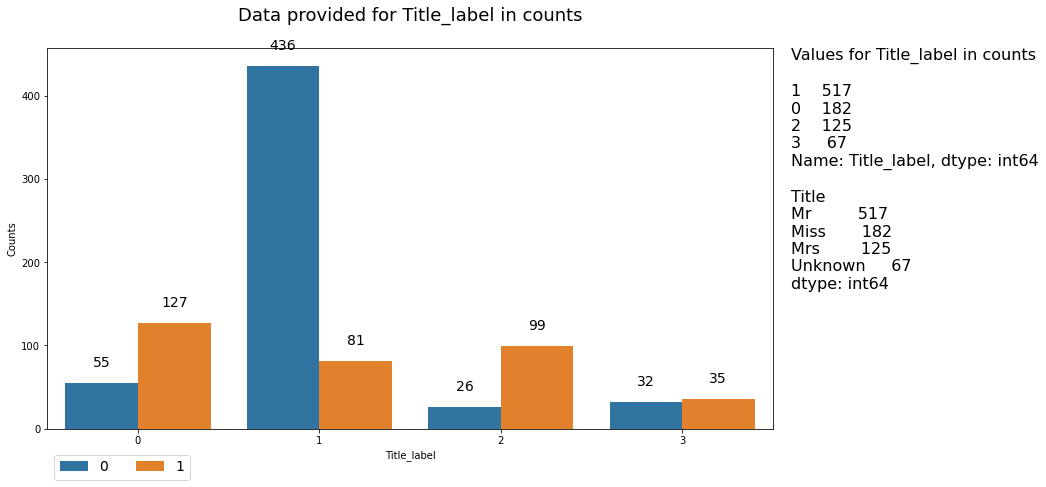

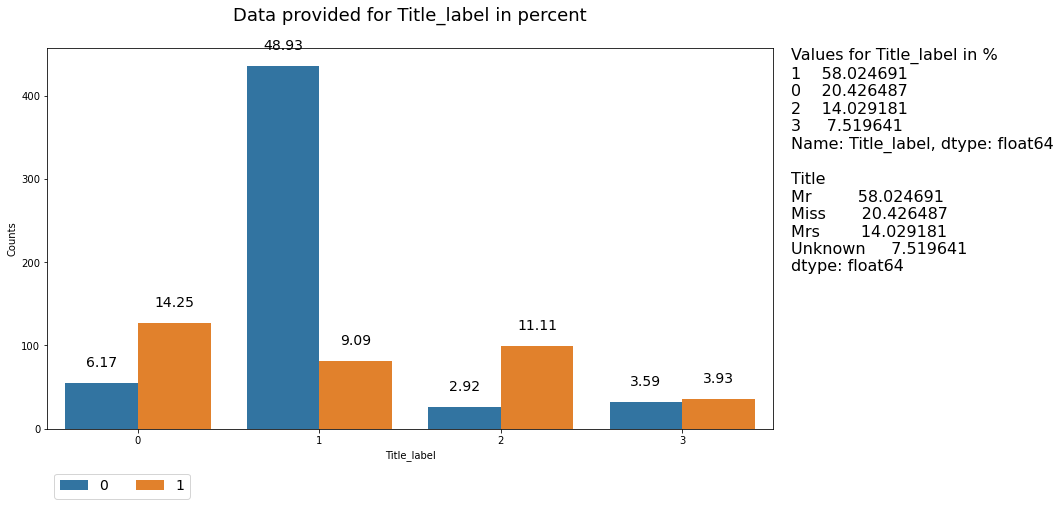

In [50]:
cat(tn, 10, tar='Survived')

### Analysis Observations :

1. Passenger traveling in lower class have lowest surviving probablity (73%)
2. Passenger traveling upper class have highest surviving probablity (76%)
3. Female passenger has higher surviving rate
4. Male passenger has lower surviving rate
5. Passenger traveling alone most likely didn't survived
6. Passenger having small family (2-4) likely suvived
7. Passenger embarked at Southampton has lowest surviving probablity
8. Passenger embarked at Cherbourg has highest surviving probablity
9. Title column showing same data as sex i.e female has high probablity of surviving

## Conclusion
#### Female passenger traveling in first class with small family are mostly survived.
#### Male passenger traveling alone in third class are mostly didn't survived.

In [51]:
tn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_size', 'Alone',
       'Age', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unknown',
       'Sex_label', 'Embarked_label', 'Title_label'],
      dtype='object')

In [52]:
tn['SibSp_new'] = tn['SibSp'].apply(lambda x : x if x < 2 else 2)

In [53]:
tn['Parch_new'] = tn['Parch'].apply(lambda x : x if x < 2 else 2)

In [54]:
tn['Family_new'] = tn['SibSp_new'] + tn['Parch_new'] + 1
tn['Family_new'] = tn['Family_new'].apply(lambda x : x if x<4 else 4)

In [55]:
ts['SibSp_new'] = ts['SibSp'].apply(lambda x : x if x < 2 else 2)
ts['Parch_new'] = ts['Parch'].apply(lambda x : x if x < 2 else 2)
ts['Family_new'] = ts['SibSp_new'] + ts['Parch_new'] + 1
ts['Family_new'] = ts['Family_new'].apply(lambda x : x if x<4 else 4)

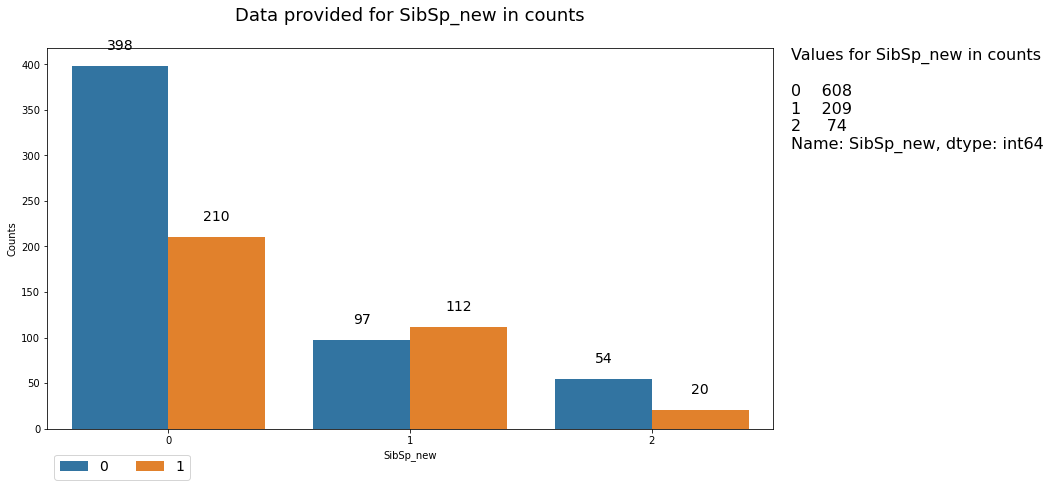

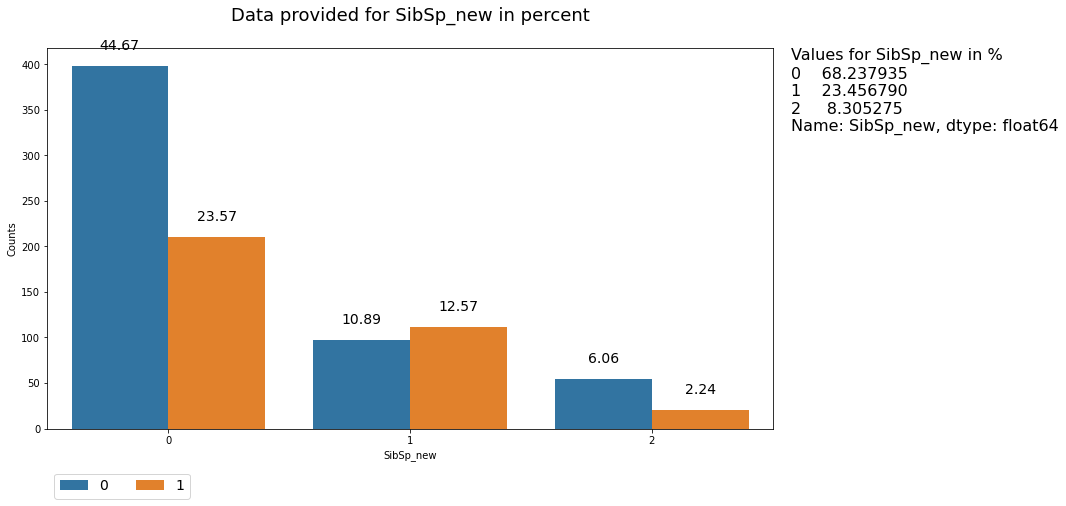

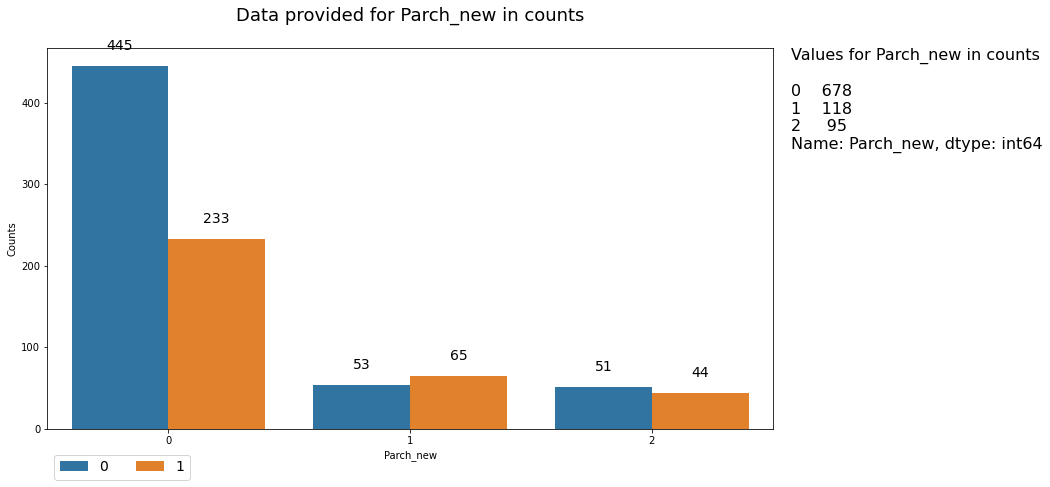

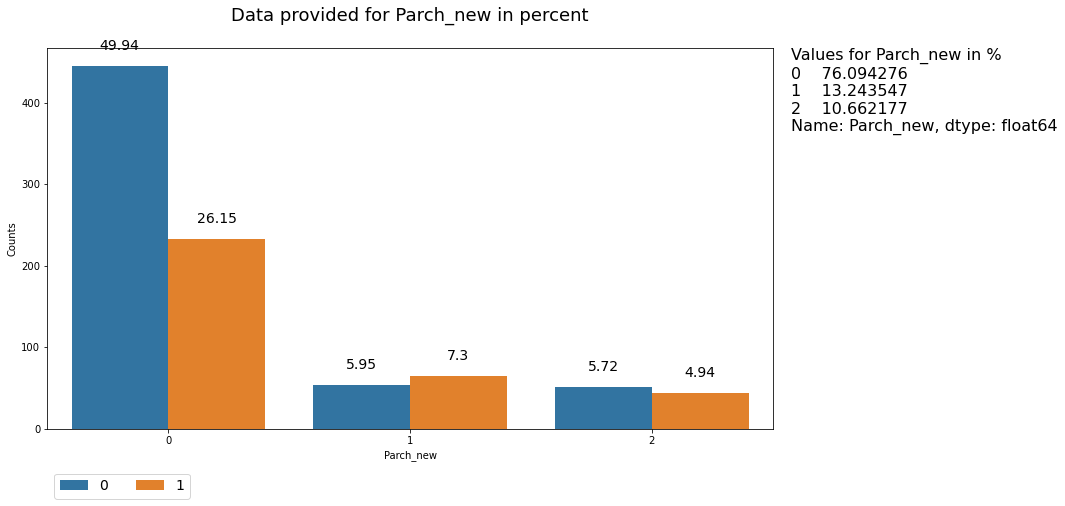

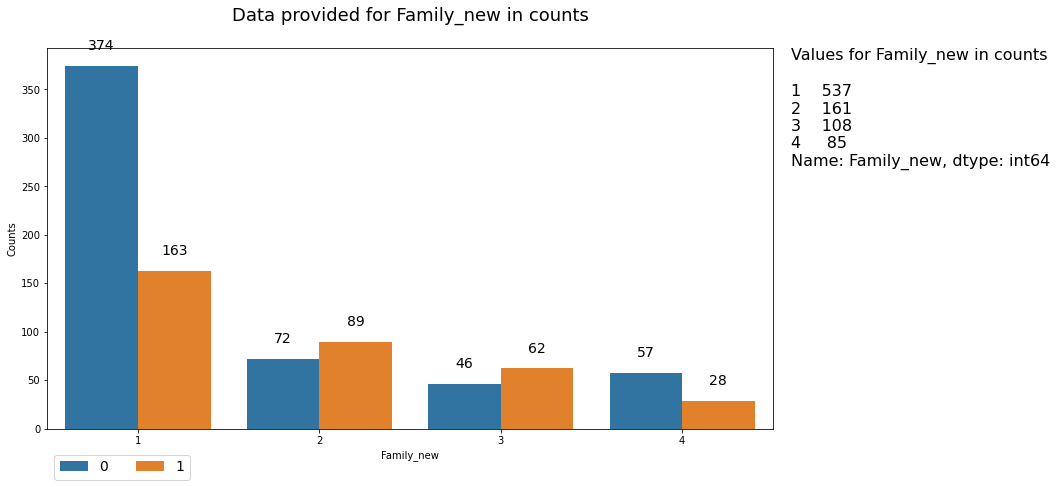

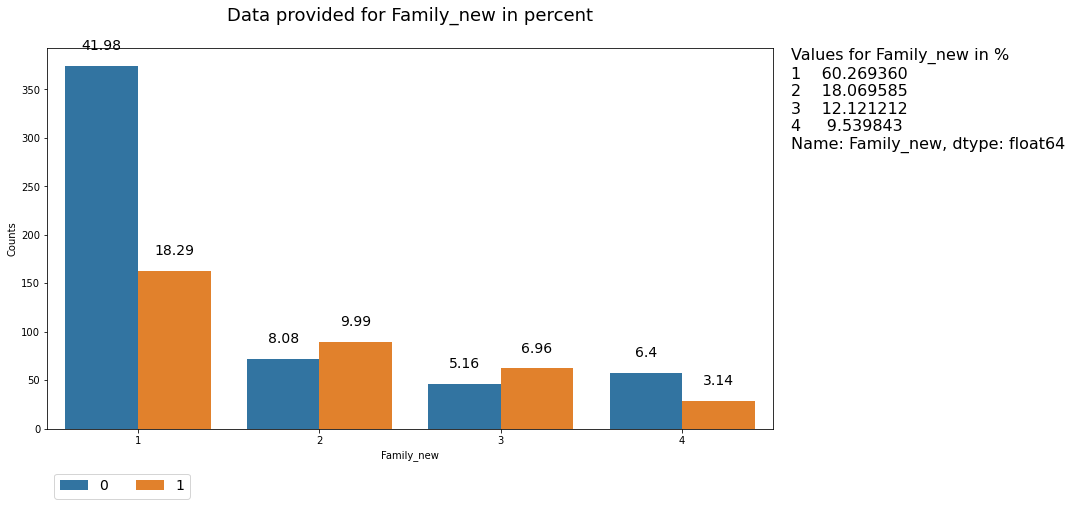

In [56]:
cat(tn[['SibSp_new', 'Parch_new', 'Family_new','Survived']], 10, tar='Survived')

#### Now there's minimum 7-8% data of all categories

### Numerical variable

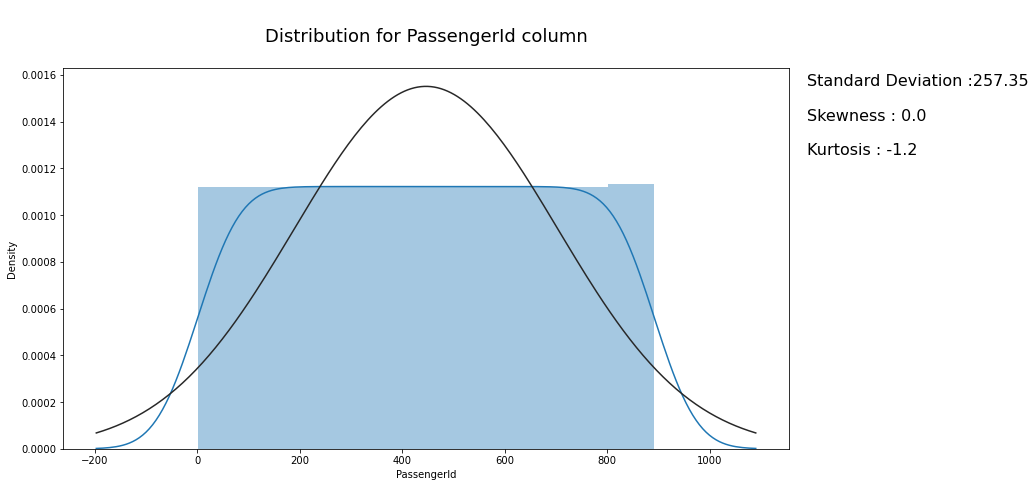

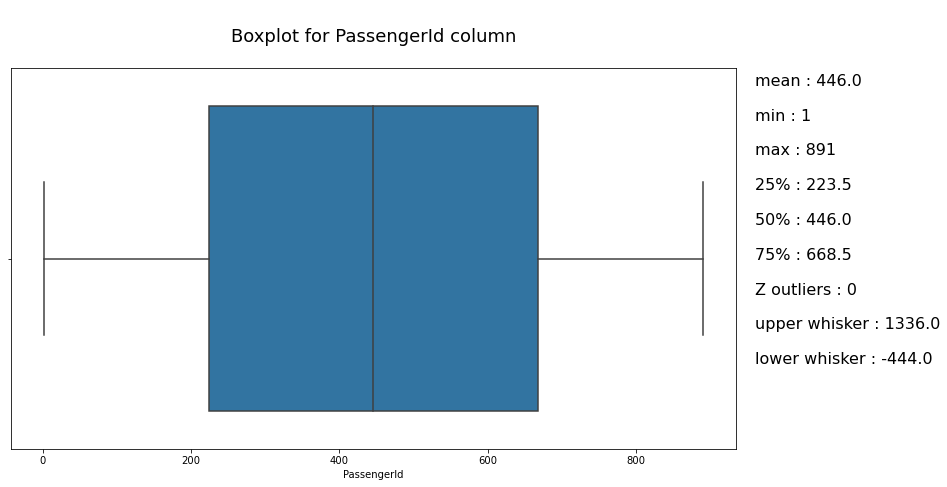

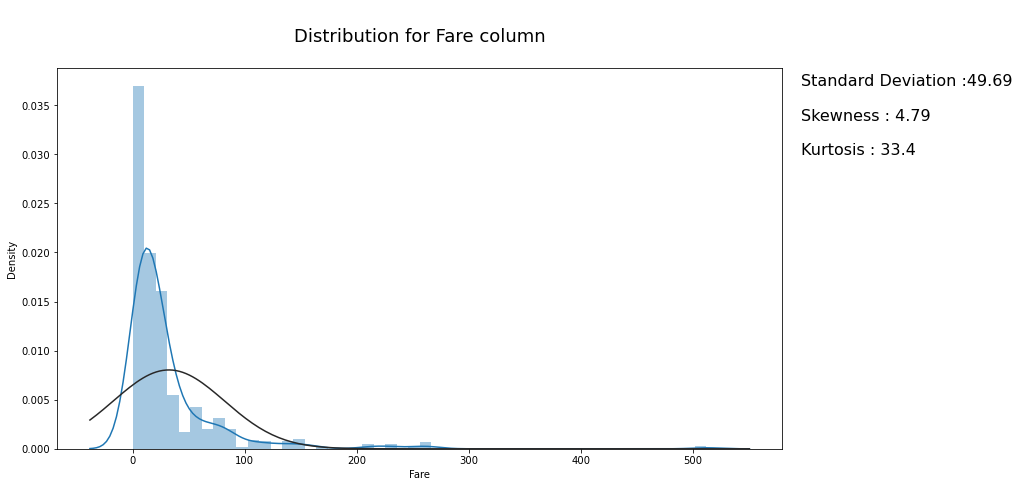

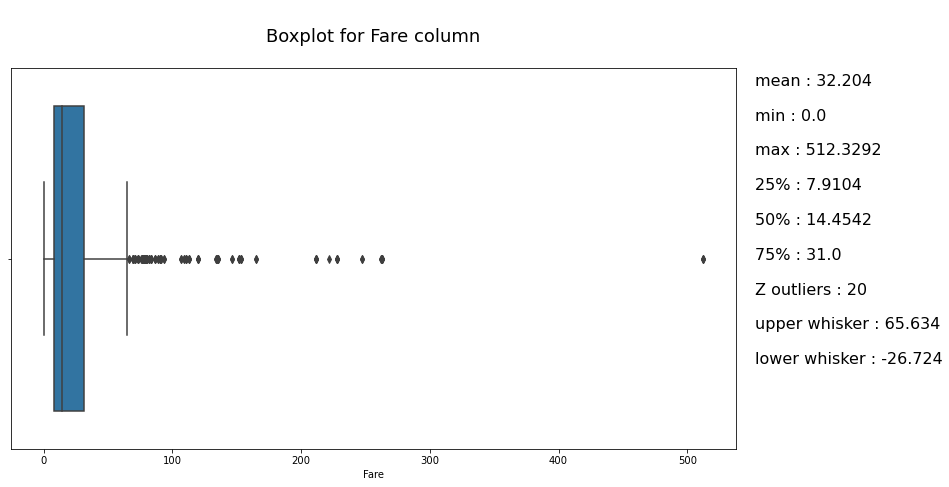

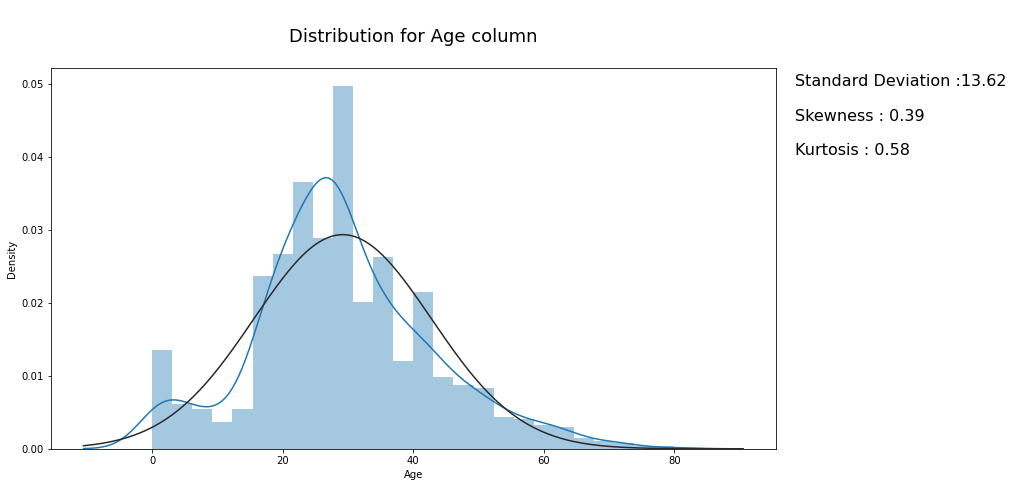

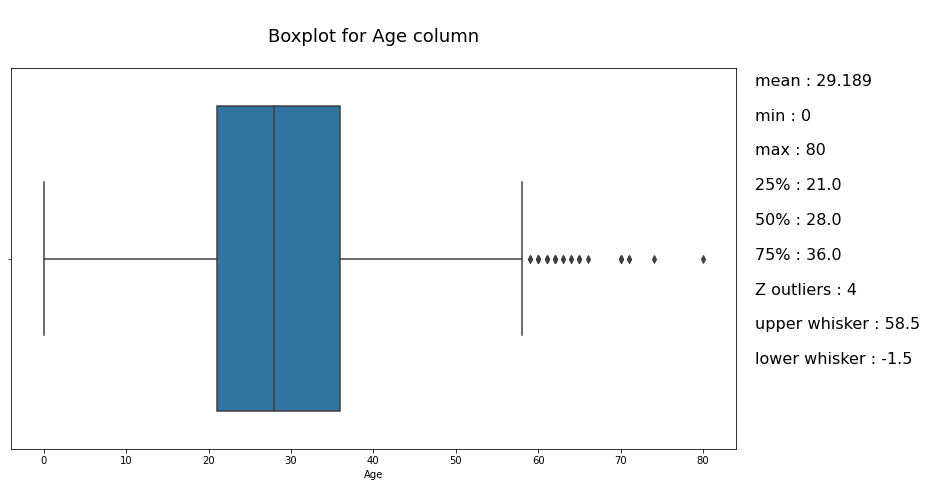

In [57]:
from My_functions import num
num(tn, 10)

#### Age data is in good distribution but fare data has high skewness as well as kurtosis issue, also it has extreme values that can be consider as outliers.
#### Minimum value of fare is 0, therefore using squre root transformation (for testing and training data)

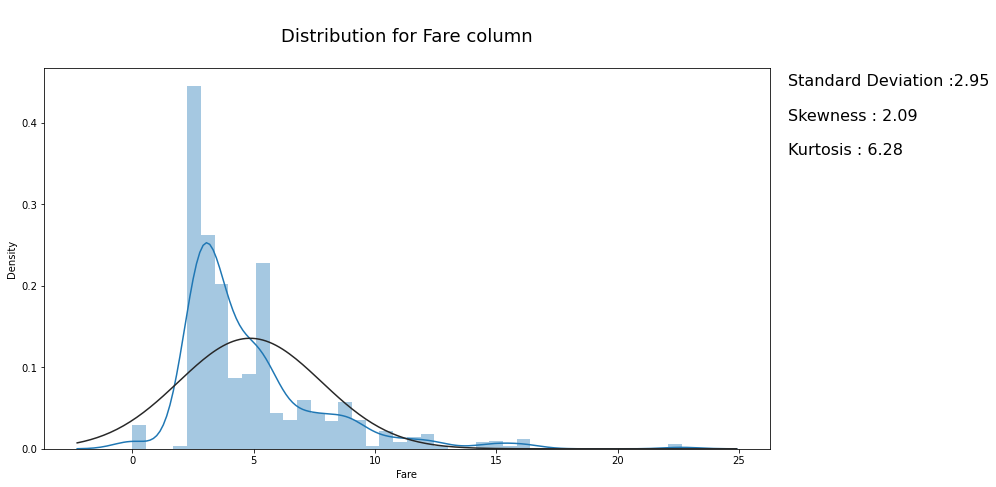

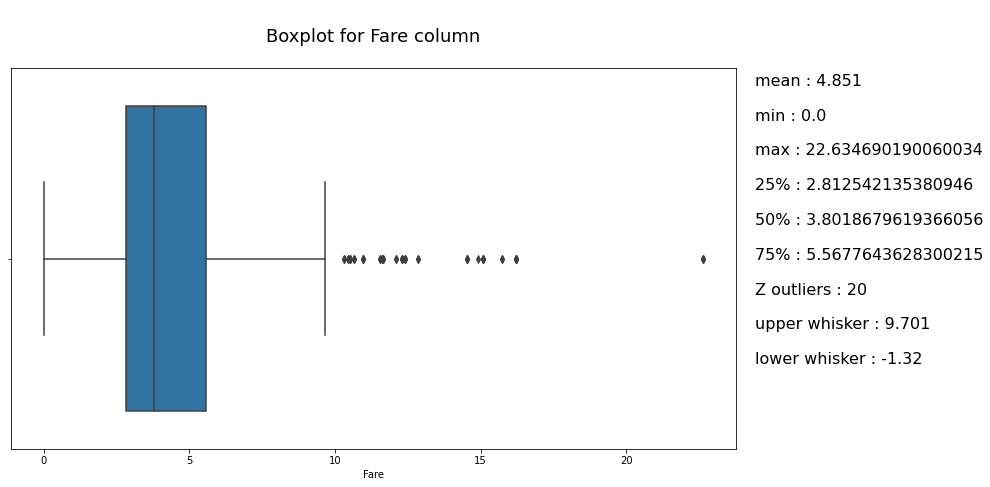

In [58]:
tn['Fare'] = np.sqrt(tn['Fare'])

num(tn[['Fare']], 10)

#### Skewmess and kurtosis is reduced but there's still outliers

In [59]:
ot = []
for x in tn['Fare']:
    z = ((x-tn['Fare'].mean())/tn['Fare'].std())
    if np.abs(z) > 3:
        ot.append(x)
        
print(f'Minimum value : {min(ot)}\nMaximum value : {max(ot)}\nNo .of outliers : {len(ot)}')

Minimum value : 14.537451633625475
Maximum value : 22.634690190060034
No .of outliers : 20


In [60]:
uw_ot = []
uw = (tn['Fare'].quantile(0.75)) + (1.5* (tn['Fare'].quantile(0.75)-tn['Fare'].quantile(0.25)))
for x in tn['Fare']:
    if x > uw:
        uw_ot.append(x)
    else:
        continue
print(f'Minimum value : {min(uw_ot)}\nMaximum value : {max(uw_ot)}\nNo. of outliers : {len(uw_ot)}')

Minimum value : 10.316249318429639
Maximum value : 22.634690190060034
No. of outliers : 53


#### Using Zscore value for treating outliers

In [61]:
ot = []
for x in tn['Fare']:
    z = ((x-tn['Fare'].mean())/tn['Fare'].std())
    if np.abs(z) < 3:
        ot.append(x)
        
print(f'Minimum value : {min(ot)}\nMaximum value : {max(ot)}\nNo .of outliers : {len(ot)}')

Minimum value : 0.0
Maximum value : 12.840042834819517
No .of outliers : 871


In [62]:
z = ((13-tn['Fare'].mean())/tn['Fare'].std())
z

2.765937090673167

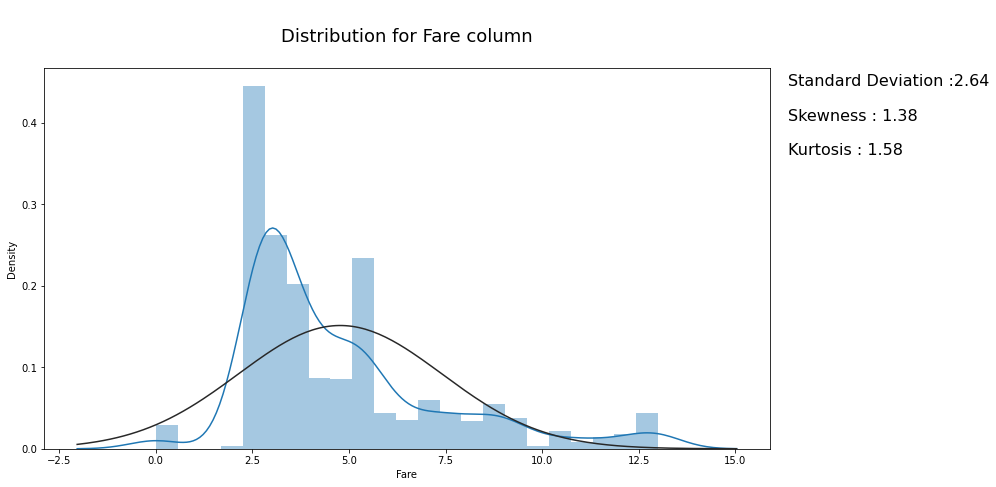

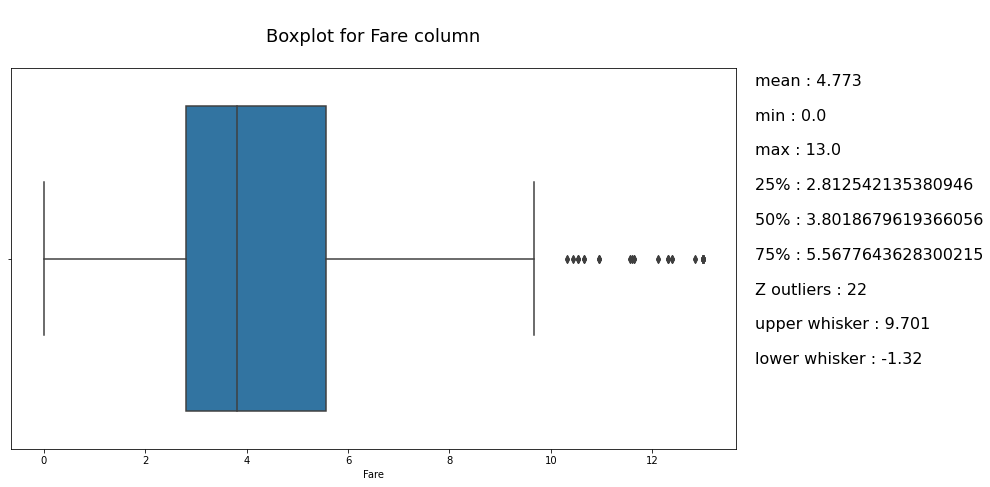

In [63]:
tn['Fare'] = tn['Fare'].apply(lambda x : 13 if x > 13 else x)

num(tn[['Fare']], 10)

In [64]:
ts['Fare'] = np.sqrt(ts['Fare'])
ts['Fare'] = ts['Fare'].apply(lambda x : 13 if x > 13 else x)
ts['Fare'].describe()

count    418.000000
mean       4.916541
std        2.805521
min        0.000000
25%        2.809947
50%        3.801868
75%        5.612486
max       13.000000
Name: Fare, dtype: float64

### At beginng skewness is 4.79 & kurtosis is 33.4, now skewness is 1.38 & kurtosis is 1.58

## Bivariate analysis

### T-test (Numerical - Categorical)

#### Using T test as label has two unique values

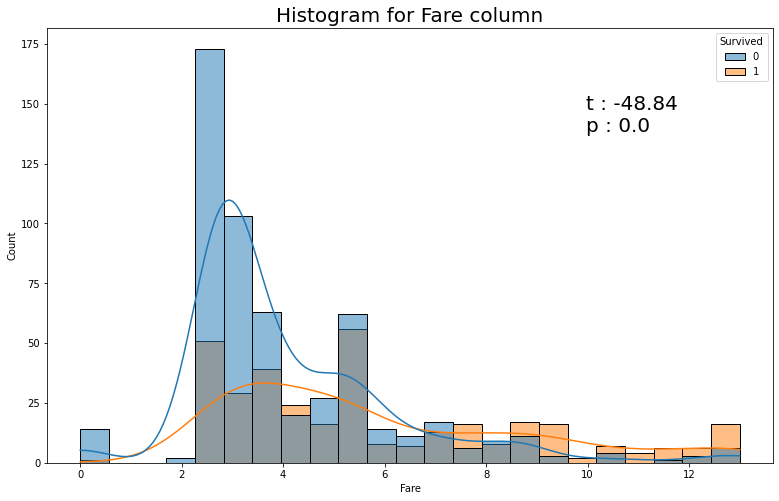

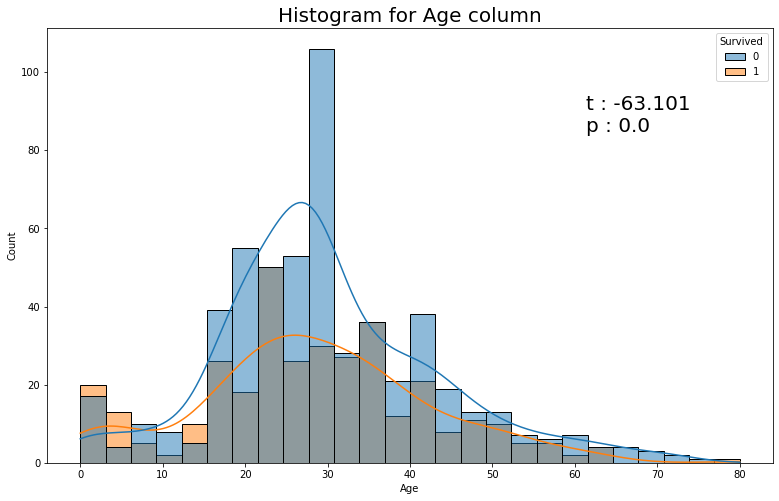

In [65]:
from scipy import stats

for c in tn.drop('PassengerId', axis=1).columns:
    if pd.api.types.is_numeric_dtype(tn[c]) and tn[c].nunique() > 10:
        plt.figure(figsize=(13,8))
        ax = sns.histplot(x=c, hue='Survived', data=tn, kde=True)
        plt.title(f'Histogram for {c} column', fontsize=20)
        t, p = stats.ttest_ind(tn['Survived'], tn[c])
        txt = 't : ' + str(round(t,3)) + '\n' + 'p : ' + str(round(p,3))
        ax.figure.text(0.7,0.7, txt, fontsize=20, transform=plt.gcf().transFigure)
        plt.show()

### Chi square test (Categorical - Categorical)

In [66]:
from scipy import stats

ch = pd.DataFrame(columns=('CHI', 'P', 'DOF', 'EXP'))
col = []

for i in tn.columns:
    col.append(i)
    for c in tn.drop(col, axis=1).columns:
        if tn[i].nunique() < 10 and tn[c].nunique() < 10:
            ct = pd.crosstab(index=tn[i], columns=tn[c])
            val = ct.values
            chi, p, dof, exp = stats.chi2_contingency(val)
            ch.loc[i+' & '+ c] = (chi, p, dof, exp)
    

pd.set_option('display.max_rows', None)
ch

CHI              P DOF  \
Survived & Pclass                102.888989   4.549252e-23   2   
Survived & Sex                   260.717020   1.197357e-58   1   
Survived & SibSp                  37.271793   1.558581e-06   6   
Survived & Parch                  27.925784   9.703526e-05   6   
Survived & Embarked               25.964453   2.300863e-06   2   
Survived & Title                 282.149802   7.255378e-61   3   
Survived & Family_size            80.672313   3.579669e-14   8   
Survived & Alone                  36.000514   1.972654e-09   1   
Survived & Sex_female            260.717020   1.197357e-58   1   
Survived & Sex_male              260.717020   1.197357e-58   1   
Survived & Embarked_C             24.342940   8.062167e-07   1   
Survived & Embarked_Q              0.000186   9.891329e-01   1   
Survived & Embarked_S             19.279400   1.129181e-05   1   
Survived & Title_Miss             93.666699   3.733906e-22   1   
Survived & Title_Mr              266.459805   6.706529e-60   1   
Survived & Title_Mrs             100.421346   1.231933e-23   1   
Survived & Title_Unknown           5.263825   2.177312e-02   1   
Survived & Sex_label             260.717020   1.197357e-58   1   
Survived & Embarked_label         25.964453   2.300863e-06   2   
Survived & Title_label           282.149802   7.255378e-61   3   
Survived & SibSp_new              28.264391   7.285602e-07   2   
Survived & Parch_new              21.071627   2.656773e-05   2   
Survived & Family_new             51.664018   3.531911e-11   3   
Pclass & Sex                      16.971499   2.063886e-04   2   
Pclass & SibSp                    50.861892   9.852350e-07  12   
Pclass & Parch                    12.870292   3.785386e-01  12   
Pclass & Embarked                122.641164   1.456938e-25   4   
Pclass & Title                    38.285154   9.879924e-07   6   
Pclass & Family_size              89.215057   3.489273e-12  16   
Pclass & Alone                    16.459030   2.666656e-04   2   
Pclass & Sex_female               16.971499   2.063886e-04   2   
Pclass & Sex_male                 16.971499   2.063886e-04   2   
Pclass & Embarked_C               79.834171   4.615620e-18   2   
Pclass & Embarked_Q               50.298746   1.196096e-11   2   
Pclass & Embarked_S               43.306089   3.946410e-10   2   
Pclass & Title_Miss                0.566675   7.532653e-01   2   
Pclass & Title_Mr                 21.657688   1.981950e-05   2   
Pclass & Title_Mrs                27.847840   8.972603e-07   2   
Pclass & Title_Unknown             5.192814   7.454092e-02   2   
Pclass & Sex_label                16.971499   2.063886e-04   2   
Pclass & Embarked_label          122.641164   1.456938e-25   4   
Pclass & Title_label              38.285154   9.879924e-07   6   
Pclass & SibSp_new                36.675135   2.101345e-07   4   
Pclass & Parch_new                 4.865234   3.014070e-01   4   
Pclass & Family_new               54.004173   7.362870e-10   6   
Sex & SibSp                       43.743505   8.310305e-08   6   
Sex & Parch                       60.352847   3.816058e-11   6   
Sex & Embarked                    12.917024   1.567126e-03   2   
Sex & Title                      863.532165  7.193733e-187   3   
Sex & Family_size                 95.090085   4.288386e-17   8   
Sex & Alone                       80.857313   2.426184e-19   1   
Sex & Sex_female                 886.623613  7.937990e-195   1   
Sex & Sex_male                   886.623613  7.937990e-195   1   
Sex & Embarked_C                   5.681087   1.714874e-02   1   
Sex & Embarked_Q                   4.357738   3.684120e-02   1   
Sex & Embarked_S                  12.112169   5.009383e-04   1   
Sex & Title_Miss                 416.731545   1.255656e-92   1   
Sex & Title_Mr                   666.597310  5.490255e-147   1   
Sex & Title_Mrs                  263.890280   2.435295e-59   1   
Sex & Title_Unknown               18.357218   1.831239e-05   1   
Sex & Sex_labe

In [67]:
tn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family_size', 'Alone',
       'Age', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unknown',
       'Sex_label', 'Embarked_label', 'Title_label', 'SibSp_new', 'Parch_new',
       'Family_new'],
      dtype='object')

In [68]:
for c in tn.columns:
    if pd.api.types.is_numeric_dtype(tn[c]):
        continue
    else:
        tn = tn.drop(c, axis=1)
        
tn.head(20)

PassengerId  Survived  Pclass  SibSp  Parch      Fare  Family_size  Alone  \
0             1         0       3      1      0  2.692582            2      0   
1             2         1       1      1      0  8.442944            2      0   
2             3         1       3      0      0  2.815138            1      1   
3             4         1       1      1      0  7.286975            2      0   
4             5         0       3      0      0  2.837252            1      1   
5             6         0       3      0      0  2.908316            1      1   
6             7         0       1      0      0  7.201562            1      1   
7             8         0       3      3      1  4.590752            5      0   
8             9         1       3      0      2  3.336660            3      0   
9            10         1       2      1      0  5.483685            2      0   
10           11         1       3      1      1  4.086563            3      0   
11           12         1       1      0      0  5.152669            1      1   
12           13         0       3      0      0  2.837252            1      1   
13           14         0       3      1      5  5.592406            7      0   
14           15         0       3      0      0  2.802535            1      1   
15           16         1       2      0      0  4.000000            1      1   
16           17         0       3      4      1  5.396758            6      0   
17           18         1       2      0      0  3.605551            1      1   
18           19         0       3      1      0  4.242641            2      0   
19           20         1       3      0      0  2.687936            1      1   

    Age  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Title_Miss  \
0    22           0         1           0           0           1           0   
1    38           1         0           1           0           0           0   
2    26           1         0           0           0           1           1   
3    35           1         0           0           0           1           0   
4    35           0         1           0           0           1           0   
5    28           0         1           0           1           0           0   
6    54           0         1           0           0           1           0   
7     2           0         1           0           0           1           0   
8    27           1         0           0           0           1           0   
9    14           1         0           1           0           0           0   
10    4           1         0           0           0           1           1   
11   58           1         0           0           0           1           1   
12   20           0         1           0           0           1           0   
13   39           0         1           0           0           1           0   
14   14           1         0           0           0           1           1   
15   55           1         0           0           0           1           0   
16    2           0         1           0           1           0           0   
17   35           0         1           0           0           1           0   
18   31           1         0           0           0           1           0   
19   27           1         0           1           0           0           0   

    Title_Mr  Title_Mrs  Title_Unknown  Sex_label  Embarked_label  \
0          1          0              0          1               2   
1          0          1              0          0               0   
2          0          0              0          0               2   
3          0          1              0          0               2   
4          1          0              0          1               2   
5          1          0              0          1               1   
6          1          0              0          1               2   
7          0          0              1          

In [69]:
for c in ts.columns:
    if pd.api.types.is_numeric_dtype(ts[c]):
        continue
    else:
        ts = ts.drop(c,axis=1)
        
ts.head(20)

PassengerId  Pclass  SibSp  Parch      Fare  Family_size  Alone  Age  \
0           892       3      0      0  2.798071            1      1   34   
1           893       3      1      0  2.645751            2      0   47   
2           894       2      0      0  3.112475            1      1   62   
3           895       3      0      0  2.943213            1      1   27   
4           896       3      1      1  3.505353            3      0   22   
5           897       3      0      0  3.037269            1      1   14   
6           898       3      0      0  2.762101            1      1   30   
7           899       2      1      1  5.385165            3      0   26   
8           900       3      0      0  2.688717            1      1   18   
9           901       3      2      0  4.914265            3      0   21   
10          902       3      0      0  2.809947            1      1   28   
11          903       1      0      0  5.099020            1      1   46   
12          904       1      1      0  9.070099            2      0   23   
13          905       2      1      0  5.099020            2      0   63   
14          906       1      1      0  7.821445            2      0   47   
15          907       2      1      0  5.265055            2      0   24   
16          908       2      0      0  3.514257            1      1   35   
17          909       3      0      0  2.687936            1      1   21   
18          910       3      1      0  2.815138            2      0   27   
19          911       3      0      0  2.687936            1      1   45   

    Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Title_Miss  \
0            0         1           0           1           0           0   
1            1         0           0           0           1           0   
2            0         1           0           1           0           0   
3            0         1           0           0           1           0   
4            1         0           0           0           1           0   
5            0         1           0           0           1           0   
6            1         0           0           1           0           1   
7            0         1           0           0           1           0   
8            1         0           1           0           0           0   
9            0         1           0           0           1           0   
10           0         1           0           0           1           0   
11           0         1           0           0           1           0   
12           1         0           0           0           1           0   
13           0         1           0           0           1           0   
14           1         0           0           0           1           0   
15           1         0           1           0           0           0   
16           0         1           0           1           0           0   
17           0         1           1           0           0           0   
18           1         0           0           0           1           1   
19           1         0           1           0           0           0   

    Title_Mr  Title_Mrs  Title_Unknown  Sex_label  Embarked_label  \
0          1          0              0          1               1   
1          0          1              0          0               2   
2          1          0              0          1               1   
3          1          0              0          1               2   
4          0          1              0          0               2   
5          1          0              0          1               2   
6          0          0              0          0               1   
7          1          0              0          1               2   
8          0          1              0          0               0   
9          1          0              0          1               2   
10         1          0              0          1  

In [70]:
x = tn.drop('Survived', axis=1)

y = tn['Survived']

In [71]:
x

PassengerId  Pclass  SibSp  Parch       Fare  Family_size  Alone  Age  \
0              1       3      1      0   2.692582            2      0   22   
1              2       1      1      0   8.442944            2      0   38   
2              3       3      0      0   2.815138            1      1   26   
3              4       1      1      0   7.286975            2      0   35   
4              5       3      0      0   2.837252            1      1   35   
5              6       3      0      0   2.908316            1      1   28   
6              7       1      0      0   7.201562            1      1   54   
7              8       3      3      1   4.590752            5      0    2   
8              9       3      0      2   3.336660            3      0   27   
9             10       2      1      0   5.483685            2      0   14   
10            11       3      1      1   4.086563            3      0    4   
11            12       1      0      0   5.152669            1      1   58   
12            13       3      0      0   2.837252            1      1   20   
13            14       3      1      5   5.592406            7      0   39   
14            15       3      0      0   2.802535            1      1   14   
15            16       2      0      0   4.000000            1      1   55   
16            17       3      4      1   5.396758            6      0    2   
17            18       2      0      0   3.605551            1      1   35   
18            19       3      1      0   4.242641            2      0   31   
19            20       3      0      0   2.687936            1      1   27   
20            21       2      0      0   5.099020            1      1   35   
21            22       2      0      0   3.605551            1      1   34   
22            23       3      0      0   2.833584            1      1   15   
23            24       1      0      0   5.958188            1      1   28   
24            25       3      3      1   4.590752            5      0    8   
25            26       3      1      5   5.602455            7      0   38   
26            27       3      0      0   2.687936            1      1   27   
27            28       1      3      2  13.000000            6      0   19   
28            29       3      0      0   2.806991            1      1   24   
29            30       3      0      0   2.809947            1      1   28   
30            31       1      0      0   5.265055            1      1   40   
31            32       1      1      0  12.104578            2      0   33   
32            33       3      0      0   2.783882            1      1   24   
33            34       2      0      0   3.240370            1      1   66   
34            35       1      1      0   9.064811            2      0   28   
35            36       1      1      0   7.211103            2      0   42   
36            37       3      0      0   2.688717            1      1   27   
37            38       3      0      0   2.837252            1      1   21   
38            39       3      2      0   4.242641            3      0   18   
39            40       3      1      0   3.352864            2      0   14   
40            41       3      1      0   3.078149            2      0   40   
41            42       2      1      0   4.582576            2      0   27   
42            43       3      0      0   2.809947            1      1   27   
43            44       2      1      2   6.448194            4      0    3   
44            45       3      0      0   2.806991            1      1   19   
45            46       3      0      0   2.837252            1      1   28   
46            47       3      1      0   3.937004            2      0   21   
47            48       3      0      0   2.783882            1      1   24   
48            49       3      2      0   4.656093            3      0   17   
49            50       3      1      0   4.219005            2      0   18   
50            51       3   

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_auc_score


gra = GradientBoostingClassifier(random_state=8)
ran = RandomForestClassifier(random_state=8)
log = LogisticRegression(random_state=8)
des = DecisionTreeClassifier(random_state=8)
svc = SVC(random_state=8)

mod = [gra, ran, log, des, svc]

for m in mod:
    scr = cross_val_score(m, x.drop(['PassengerId'], axis=1), y, cv=7, scoring='accuracy', n_jobs=-1)
    print(m)
    print(scr.mean()*100)
    print('-'*30)

GradientBoostingClassifier(random_state=8)
83.17017013498315
------------------------------
RandomForestClassifier(random_state=8)
79.91159308211473
------------------------------
LogisticRegression(random_state=8)
81.82121766029248
------------------------------
DecisionTreeClassifier(random_state=8)
78.78937007874016
------------------------------
SVC(random_state=8)
75.88055399325084
------------------------------


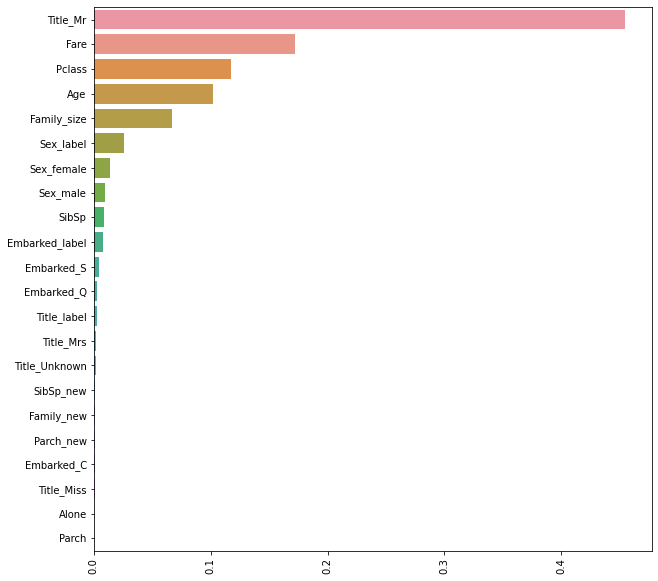

In [73]:
gra = GradientBoostingClassifier(random_state=8)
gra.fit(x.drop('PassengerId', axis=1), y)
features = pd.Series(gra.feature_importances_, index=x.drop('PassengerId', axis=1).columns)
features = features.sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
p = sns.barplot(features, features.index)

## Feature Selection

### In bivariate analysis considering with label in chi square test only Embarked_Q column has p value greater than 0.05 therefore using above barplot for feature selection

In [74]:
tn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Family_size', 'Alone', 'Age', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Unknown', 'Sex_label', 'Embarked_label', 'Title_label',
       'SibSp_new', 'Parch_new', 'Family_new'],
      dtype='object')

In [75]:
tn.head()

PassengerId  Survived  Pclass  SibSp  Parch      Fare  Family_size  Alone  \
0            1         0       3      1      0  2.692582            2      0   
1            2         1       1      1      0  8.442944            2      0   
2            3         1       3      0      0  2.815138            1      1   
3            4         1       1      1      0  7.286975            2      0   
4            5         0       3      0      0  2.837252            1      1   

   Age  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Title_Miss  \
0   22           0         1           0           0           1           0   
1   38           1         0           1           0           0           0   
2   26           1         0           0           0           1           1   
3   35           1         0           0           0           1           0   
4   35           0         1           0           0           1           0   

   Title_Mr  Title_Mrs  Title_Unknown  Sex_label  Embarked_label  Title_label  \
0         1          0              0          1               2            1   
1         0          1              0          0               0            2   
2         0          0              0          0               2            0   
3         0          1              0          0               2            2   
4         1          0              0          1               2            1   

   SibSp_new  Parch_new  Family_new  
0          1          0           2  
1          1          0           2  
2          0          0           1  
3          1          0           2  
4          0          0           1

In [76]:
x = tn[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unknown', 'Fare', 'Pclass', 'Age', 'Family_size','Sex_label', 'SibSp', 'Alone', 'Parch','Embarked_label']]

y = tn['Survived']

In [77]:
x

Title_Miss  Title_Mr  Title_Mrs  Title_Unknown       Fare  Pclass  Age  \
0             0         1          0              0   2.692582       3   22   
1             0         0          1              0   8.442944       1   38   
2             1         0          0              0   2.815138       3   26   
3             0         0          1              0   7.286975       1   35   
4             0         1          0              0   2.837252       3   35   
5             0         1          0              0   2.908316       3   28   
6             0         1          0              0   7.201562       1   54   
7             0         0          0              1   4.590752       3    2   
8             0         0          1              0   3.336660       3   27   
9             0         0          1              0   5.483685       2   14   
10            1         0          0              0   4.086563       3    4   
11            1         0          0              0   5.152669       1   58   
12            0         1          0              0   2.837252       3   20   
13            0         1          0              0   5.592406       3   39   
14            1         0          0              0   2.802535       3   14   
15            0         0          1              0   4.000000       2   55   
16            0         0          0              1   5.396758       3    2   
17            0         1          0              0   3.605551       2   35   
18            0         0          1              0   4.242641       3   31   
19            0         0          1              0   2.687936       3   27   
20            0         1          0              0   5.099020       2   35   
21            0         1          0              0   3.605551       2   34   
22            1         0          0              0   2.833584       3   15   
23            0         1          0              0   5.958188       1   28   
24            1         0          0              0   4.590752       3    8   
25            0         0          1              0   5.602455       3   38   
26            0         1          0              0   2.687936       3   27   
27            0         1          0              0  13.000000       1   19   
28            1         0          0              0   2.806991       3   24   
29            0         1          0              0   2.809947       3   28   
30            0         0          0              1   5.265055       1   40   
31            0         0          1              0  12.104578       1   33   
32            1         0          0              0   2.783882       3   24   
33            0         1          0              0   3.240370       2   66   
34            0         1          0              0   9.064811       1   28   
35            0         1          0              0   7.211103       1   42   
36            0         1          0              0   2.688717       3   27   
37            0         1          0              0   2.837252       3   21   
38            1         0          0              0   4.242641       3   18   
39            1         0          0              0   3.352864       3   14   
40            0         0          1              0   3.078149       3   40   
41            0         0          1              0   4.582576       2   27   
42            0         1          0              0   2.809947       3   27   
43            1         0          0              0   6.448194       2    3   
44            1         0          0              0   2.806991       3   19   
45            0         1          0              0   2.837252       3   28   
46            0         1          0              0   3.937004       3   21   
47            1         0          0              0   2.783882       3   24   
48            0         1          0              0   4.656093       3   17   
49            0         0          1              0   4

In [78]:
gra = GradientBoostingClassifier(random_state=8)
scr = cross_val_score(gra, x, y, cv=7, scoring='accuracy', n_jobs=-1)
print(scr.mean()*100)

83.61747750281214


### Using feature selection model accuracy is slightly increased

In [79]:
gra.fit(x,y)

GradientBoostingClassifier(random_state=8)

In [80]:
import pickle

with open ('Titanic_model', 'wb') as f:
    pickle.dump(gra,f)

with open ('Titanic_model', 'rb') as f:
    mod = pickle.load(f)

In [81]:
x.head()

Title_Miss  Title_Mr  Title_Mrs  Title_Unknown      Fare  Pclass  Age  \
0           0         1          0              0  2.692582       3   22   
1           0         0          1              0  8.442944       1   38   
2           1         0          0              0  2.815138       3   26   
3           0         0          1              0  7.286975       1   35   
4           0         1          0              0  2.837252       3   35   

   Family_size  Sex_label  SibSp  Alone  Parch  Embarked_label  
0            2          1      1      0      0               2  
1            2          0      1      0      0               0  
2            1          0      0      1      0               2  
3            2          0      1      0      0               2  
4            1          1      0      1      0               2

In [82]:
ts.head()

PassengerId  Pclass  SibSp  Parch      Fare  Family_size  Alone  Age  \
0          892       3      0      0  2.798071            1      1   34   
1          893       3      1      0  2.645751            2      0   47   
2          894       2      0      0  3.112475            1      1   62   
3          895       3      0      0  2.943213            1      1   27   
4          896       3      1      1  3.505353            3      0   22   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Title_Miss  \
0           0         1           0           1           0           0   
1           1         0           0           0           1           0   
2           0         1           0           1           0           0   
3           0         1           0           0           1           0   
4           1         0           0           0           1           0   

   Title_Mr  Title_Mrs  Title_Unknown  Sex_label  Embarked_label  Title_label  \
0         1          0              0          1               1            1   
1         0          1              0          0               2            2   
2         1          0              0          1               1            1   
3         1          0              0          1               2            1   
4         0          1              0          0               2            2   

   SibSp_new  Parch_new  Family_new  
0          0          0           1  
1          1          0           2  
2          0          0           1  
3          0          0           1  
4          1          1           3

In [83]:
mod.predict([[0,1,0,0,2.692582,3,22,2,1,1,0,0,2]])

array([0], dtype=int64)

In [84]:
ts['Survived'] = mod.predict(ts[['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unknown', 'Fare', 'Pclass', 'Age', 'Family_size','Sex_label', 'SibSp', 'Alone', 'Parch','Embarked_label']])

In [85]:
ts[['PassengerId', 'Survived']].to_csv('prediction.csv', index=False)